# Import Packages and read files

In [2282]:
#%load_ext nb_black

# Library to suppress warnings or deprecation notes
!pip install scikit-learn

import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np
import os

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.manifold import TSNE

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
import datetime
from sklearn.impute import KNNImputer 
import plotly.express as px
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy import stats
import matplotlib.cm as cm
from sklearn import metrics
from sklearn.metrics import make_scorer, silhouette_score, silhouette_samples, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram
from sklearn.model_selection import GridSearchCV

In [2283]:
FlightsDB = pd.read_csv('data/DM_AIAI_FlightsDB.csv', sep = ',')
CustomerDB = pd.read_csv('data/DM_AIAI_CustomerDB.csv', sep = ',')

# Initial Expectation

In [2284]:
CustomerDB.head()

Unnamed: 0  Loyalty# First Name    Last Name        Customer Name Country  \
0           0    480934    Cecilia  Householder  Cecilia Householder  Canada   
1           1    549612      Dayle        Menez          Dayle Menez  Canada   
2           2    429460     Necole       Hannon        Necole Hannon  Canada   
3           3    608370      Queen        Hagee          Queen Hagee  Canada   
4           4    530508     Claire      Latting       Claire Latting  Canada   

  Province or State       City   Latitude   Longitude Postal code  Gender  \
0           Ontario    Toronto  43.653225  -79.383186     M2Z 4K1  female   
1           Alberta   Edmonton  53.544388 -113.490930     T3G 6Y6    male   
2  British Columbia  Vancouver  49.282730 -123.120740     V6E 3D9    male   
3           Ontario    Toronto  43.653225  -79.383186     P1W 1K4    male   
4            Quebec       Hull  45.428730  -75.713364     J8Y 3Z5    male   

  Education Location Code   Income Marital Status LoyaltyStatus  \
0  Bachelor         Urban  70146.0        Married          Star   
1   College         Rural      0.0       Divorced          Star   
2   College         Urban      0.0         Single          Star   
3   College      Suburban      0.0         Single          Star   
4  Bachelor      Suburban  97832.0        Married          Star   

  EnrollmentDateOpening CancellationDate  Customer Lifetime Value  \
0             2/15/2019              NaN                  3839.14   
1              3/9/2019              NaN                  3839.61   
2             7/14/2017         1/8/2021                  3839.75   
3             2/17/2016              NaN                  3839.75   
4            10/25/2017              NaN                  3842.79   

   EnrollmentType  
0        Standard  
1        Standard  
2        Standard  
3        Standard  
4  2021 Promotion

In [2285]:
FlightsDB.head()

Loyalty#  Year  Month YearMonthDate  NumFlights  NumFlightsWithCompanions  \
0    413052  2021     12     12/1/2021         2.0                       2.0   
1    464105  2021     12     12/1/2021         0.0                       0.0   
2    681785  2021     12     12/1/2021        10.0                       3.0   
3    185013  2021     12     12/1/2021        16.0                       4.0   
4    216596  2021     12     12/1/2021         9.0                       0.0   

   DistanceKM  PointsAccumulated  PointsRedeemed  DollarCostPointsRedeemed  
0      9384.0              938.0             0.0                       0.0  
1         0.0                0.0             0.0                       0.0  
2     14745.0             1474.0             0.0                       0.0  
3     26311.0             2631.0          3213.0                      32.0  
4     19275.0             1927.0             0.0                       0.0

In [2286]:
CustomerDB = CustomerDB.copy()
CustomerDB = CustomerDB.drop(columns=['Unnamed: 0'])
CustomerDB.tail()

Loyalty# First Name Last Name    Customer Name Country  \
16916    100012      Ethan  Thompson   Ethan Thompson  Canada   
16917    100013      Layla     Young      Layla Young  Canada   
16918    100014     Amelia   Bennett   Amelia Bennett  Canada   
16919    100015   Benjamin    Wilson  Benjamin Wilson  Canada   
16920    100016       Emma    Martin      Emma Martin  Canada   

      Province or State          City   Latitude   Longitude Postal code  \
16916            Quebec   Quebec City  46.759733  -71.141009     Y0C 7D6   
16917           Alberta      Edmonton  53.524829 -113.546357     L3S 9Y3   
16918     New Brunswick       Moncton  46.051866  -64.825428     G2S 2B6   
16919            Quebec   Quebec City  46.862970  -71.133444     B1Z 8T3   
16920  British Columbia  Dawson Creek  55.720562 -120.160090     M4A 1E4   

       Gender Education Location Code  Income Marital Status LoyaltyStatus  \
16916    male  Bachelor      Suburban     NaN         Single          Star   
16917  female  Bachelor         Rural     NaN        Married          Star   
16918    male  Bachelor         Rural     NaN        Married          Star   
16919  female   College         Urban     NaN        Married          Star   
16920  female    Master      Suburban     NaN         Single          Star   

      EnrollmentDateOpening CancellationDate  Customer Lifetime Value  \
16916             2/27/2019        2/27/2019                      NaN   
16917             9/20/2017        9/20/2017                      NaN   
16918            11/28/2020       11/28/2020                      NaN   
16919              4/9/2020         4/9/2020                      NaN   
16920             7/21/2020        7/21/2020                      NaN   

      EnrollmentType  
16916       Standard  
16917       Standard  
16918       Standard  
16919       Standard  
16920       Standard

In [2287]:
FlightsDB.tail()

Loyalty#  Year  Month YearMonthDate  NumFlights  \
608431    999902  2019     12     12/1/2019         7.2   
608432    999911  2019     12     12/1/2019         0.0   
608433    999940  2019     12     12/1/2019        14.4   
608434    999982  2019     12     12/1/2019         0.0   
608435    999986  2019     12     12/1/2019         0.0   

        NumFlightsWithCompanions  DistanceKM  PointsAccumulated  \
608431                       0.0     30766.5            3076.65   
608432                       0.0         0.0               0.00   
608433                       0.9     18261.0            1826.10   
608434                       0.0         0.0               0.00   
608435                       0.0         0.0               0.00   

        PointsRedeemed  DollarCostPointsRedeemed  
608431             0.0                       0.0  
608432             0.0                       0.0  
608433             0.0                       0.0  
608434             0.0                       0.0  
608435             0.0                       0.0

In [2288]:
print(CustomerDB.columns)

print(CustomerDB.shape)

Index(['Loyalty#', 'First Name', 'Last Name', 'Customer Name', 'Country',
       'Province or State', 'City', 'Latitude', 'Longitude', 'Postal code',
       'Gender', 'Education', 'Location Code', 'Income', 'Marital Status',
       'LoyaltyStatus', 'EnrollmentDateOpening', 'CancellationDate',
       'Customer Lifetime Value', 'EnrollmentType'],
      dtype='object')
(16921, 20)


In [2289]:
print(FlightsDB.columns)

print(FlightsDB.shape)

Index(['Loyalty#', 'Year', 'Month', 'YearMonthDate', 'NumFlights',
       'NumFlightsWithCompanions', 'DistanceKM', 'PointsAccumulated',
       'PointsRedeemed', 'DollarCostPointsRedeemed'],
      dtype='object')
(608436, 10)


In [2290]:
CustomerDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loyalty#                 16921 non-null  int64  
 1   First Name               16921 non-null  object 
 2   Last Name                16921 non-null  object 
 3   Customer Name            16921 non-null  object 
 4   Country                  16921 non-null  object 
 5   Province or State        16921 non-null  object 
 6   City                     16921 non-null  object 
 7   Latitude                 16921 non-null  float64
 8   Longitude                16921 non-null  float64
 9   Postal code              16921 non-null  object 
 10  Gender                   16921 non-null  object 
 11  Education                16921 non-null  object 
 12  Location Code            16921 non-null  object 
 13  Income                   16901 non-null  float64
 14  Marital Status        

From the dataset, we can conclude the following:
- **'Income'** and **'Customer Lifetime Value'** have exactly the same missing values, suggesting that these two variables are likely related.
- **CancellationDate** has a large number of missing values, indicating that the majority of customers are likely still active.
- **EnrollmentDateOpening** and **CancellationDate** should be convert to DateTime

In [2291]:
FlightsDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608436 entries, 0 to 608435
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Loyalty#                  608436 non-null  int64  
 1   Year                      608436 non-null  int64  
 2   Month                     608436 non-null  int64  
 3   YearMonthDate             608436 non-null  object 
 4   NumFlights                608436 non-null  float64
 5   NumFlightsWithCompanions  608436 non-null  float64
 6   DistanceKM                608436 non-null  float64
 7   PointsAccumulated         608436 non-null  float64
 8   PointsRedeemed            608436 non-null  float64
 9   DollarCostPointsRedeemed  608436 non-null  float64
dtypes: float64(6), int64(3), object(1)
memory usage: 46.4+ MB


From the dataset, we can conclude the following:

- No missing values 

- **YearMonthDate** should be converted to datetime

- **NumFlights**, **NumFlightsWithCompanions**, **PointsAccumulated** and **PointsRedeemed** should be converted to integer

In [2292]:
CustomerDB.dtypes

Loyalty#                     int64
First Name                  object
Last Name                   object
Customer Name               object
Country                     object
Province or State           object
City                        object
Latitude                   float64
Longitude                  float64
Postal code                 object
Gender                      object
Education                   object
Location Code               object
Income                     float64
Marital Status              object
LoyaltyStatus               object
EnrollmentDateOpening       object
CancellationDate            object
Customer Lifetime Value    float64
EnrollmentType              object
dtype: object

The types of the following features in CustomerDB should be:
- **'EnrollmentDateOpening'**: datetime64
- **'CancellationDate'**: datetime64

This will be addressed in the Data Types section to ensure proper handling for filtering, comparison, and time-based analysis.


In [2293]:
FlightsDB.dtypes

Loyalty#                      int64
Year                          int64
Month                         int64
YearMonthDate                object
NumFlights                  float64
NumFlightsWithCompanions    float64
DistanceKM                  float64
PointsAccumulated           float64
PointsRedeemed              float64
DollarCostPointsRedeemed    float64
dtype: object

The types of the following features in FlightsDB should be:
- **'NumFlights'**: int64
- **'NumFlightswithCompanions'**: int64
- **'PointsAccumulated'**: int64
- **'PointsRedeemed'**: int64

In [2294]:
CustomerDB.nunique()

Loyalty#                   16757
First Name                  4941
Last Name                  15404
Customer Name              16921
Country                        1
Province or State             11
City                          29
Latitude                      49
Longitude                     49
Postal code                   75
Gender                         2
Education                      5
Location Code                  3
Income                      5694
Marital Status                 3
LoyaltyStatus                  3
EnrollmentDateOpening       2449
CancellationDate            1260
Customer Lifetime Value     7996
EnrollmentType                 2
dtype: int64

The feature **Country** contains only a single unique value, meaning it provides no meaningful information for analysis. Therefore, it is recommended to drop this feature.

The features **EnrollmentType** and **Gender** each have only two unique categories. Since they are binary, we can transform them into boolean variables for easier analysis and modeling.

In [2295]:
FlightsDB.nunique()

Loyalty#                    16737
Year                            3
Month                          12
YearMonthDate                  36
NumFlights                     41
NumFlightsWithCompanions       22
DistanceKM                  66762
PointsAccumulated           37064
PointsRedeemed               8146
DollarCostPointsRedeemed      104
dtype: int64

# Descriptive Statistics

## CustomerDB

In [2296]:
CustomerDB.describe(include='all').T

count unique          top   freq           mean  \
Loyalty#                 16921.0    NaN          NaN    NaN  550197.393771   
First Name                 16921   4941         Deon     13            NaN   
Last Name                  16921  15404      Salberg      4            NaN   
Customer Name              16921  16921  Emma Martin      1            NaN   
Country                    16921      1       Canada  16921            NaN   
Province or State          16921     11      Ontario   5468            NaN   
City                       16921     29      Toronto   3390            NaN   
Latitude                 16921.0    NaN          NaN    NaN        47.1745   
Longitude                16921.0    NaN          NaN    NaN     -91.814768   
Postal code                16921     75      V6E 3D9    917            NaN   
Gender                     16921      2       female   8497            NaN   
Education                  16921      5     Bachelor  10586            NaN   
Location Code              16921      3     Suburban   5716            NaN   
Income                   16901.0    NaN          NaN    NaN     37758.0384   
Marital Status             16921      3      Married   9842            NaN   
LoyaltyStatus              16921      3         Star   7761            NaN   
EnrollmentDateOpening      16921   2449     4/3/2015     34            NaN   
CancellationDate            2310   1260     7/7/2020      8            NaN   
Customer Lifetime Value  16901.0    NaN          NaN    NaN    7990.460188   
EnrollmentType             16921      2     Standard  15773            NaN   

                                   std        min        25%        50%  \
Loyalty#                 259251.503597   100011.0   326823.0   550896.0   
First Name                         NaN        NaN        NaN        NaN   
Last Name                          NaN        NaN        NaN        NaN   
Customer Name                      NaN        NaN        NaN        NaN   
Country                            NaN        NaN        NaN        NaN   
Province or State                  NaN        NaN        NaN        NaN   
City                               NaN        NaN        NaN        NaN   
Latitude                      3.307971  42.984924  44.231171  46.087818   
Longitude                    22.242429 -135.05684 -120.23766 -79.383186   
Postal code                        NaN        NaN        NaN        NaN   
Gender                             NaN        NaN        NaN        NaN   
Education                          NaN        NaN        NaN        NaN   
Location Code                      NaN        NaN        NaN        NaN   
Income                    30368.992499        0.0        0.0    34161.0   
Marital Status                     NaN        NaN        NaN        NaN   
LoyaltyStatus                      NaN        NaN        NaN        NaN   
EnrollmentDateOpening              NaN        NaN        NaN        NaN   
CancellationDate                   NaN        NaN        NaN        NaN   
Customer Lifetime Value    6863.173093    1898.01    3979.72    5780.18   
EnrollmentType                     NaN        NaN        NaN        NaN   

                               75%        max  
Loyalty#                  772438.0   999999.0  
First Name                     NaN        NaN  
Last Name                      NaN        NaN  
Customer Name                  NaN        NaN  
Country                        NaN        NaN  
Province or State              NaN        NaN  
City                           NaN        NaN  
Latitude                  49.28273  60.721188  
Longitude               -74.596184 -52.712578  
Postal code                    NaN        NaN  
Gender                         NaN        NaN  
Education                      NaN        NaN  
Location Code                  NaN        NaN  
Income                     62396.0    99981.0  
Marital Status                 NaN        NaN  
LoyaltyStatus                  NaN        Na

All customers are located in Canada; the most common province is Ontario and the most common city is Toronto. The Province or State we could encode as one-hot for modeling.

The **"Income"** field has a mean of about 37,758, with a wide range (0 to 99,981), so it means that each customer, in average receives a income of 37k per year.

**Customer Lifetime Value** also shows significant variability, highlighting a broad spectrum of customer worth.

**Loyalty Status** has three categories, with "Star" being the most common.

Most accounts were opened with the "Standard" enrollment type. We see that we clearly don't have a fairly balanced category, so we may drop it. Let's see if this category has a significant relationship with the other features.

There are many more enrollments than cancellations, suggesting most customers remain active.

**First Name**, **Last Name** and **Customer Name** does not seems to have significant relevance, so we will drop them.

Encode **Province**, **City**, **Education**, **LoyaltyStatus** with one-hot or ordinal encoding.


## FlightsDB

In [2297]:
agg_by_customer = FlightsDB.groupby('Loyalty#')[['NumFlights', 'NumFlightsWithCompanions',
                                                 'DistanceKM', 'PointsAccumulated', 'PointsRedeemed']].mean().reset_index()
agg_by_customer.describe().T

count           mean            std       min  \
Loyalty#                  16737.0  549735.880445  258912.132453  100018.0   
NumFlights                16737.0       3.917364       2.240442       0.0   
NumFlightsWithCompanions  16737.0       0.986079       0.650682       0.0   
DistanceKM                16737.0    7956.482846    4546.290236       0.0   
PointsAccumulated         16737.0     795.491577     454.552857       0.0   
PointsRedeemed            16737.0     235.857617     241.082095       0.0   

                                    25%            50%            75%  \
Loyalty#                  326603.000000  550434.000000  772019.000000   
NumFlights                     1.944444       4.516667       5.636111   
NumFlightsWithCompanions       0.436111       1.019444       1.461111   
DistanceKM                  3970.388889    9196.005556   11469.319444   
PointsAccumulated            396.944444     919.370000    1146.718056   
PointsRedeemed                 0.000000     179.972222     375.386111   

                                    max  
Loyalty#                  999986.000000  
NumFlights                     9.677778  
NumFlightsWithCompanions       3.444444  
DistanceKM                 19798.044444  
PointsAccumulated           1979.568333  
PointsRedeemed              1597.994444

# Missing Values

## CustomerDB

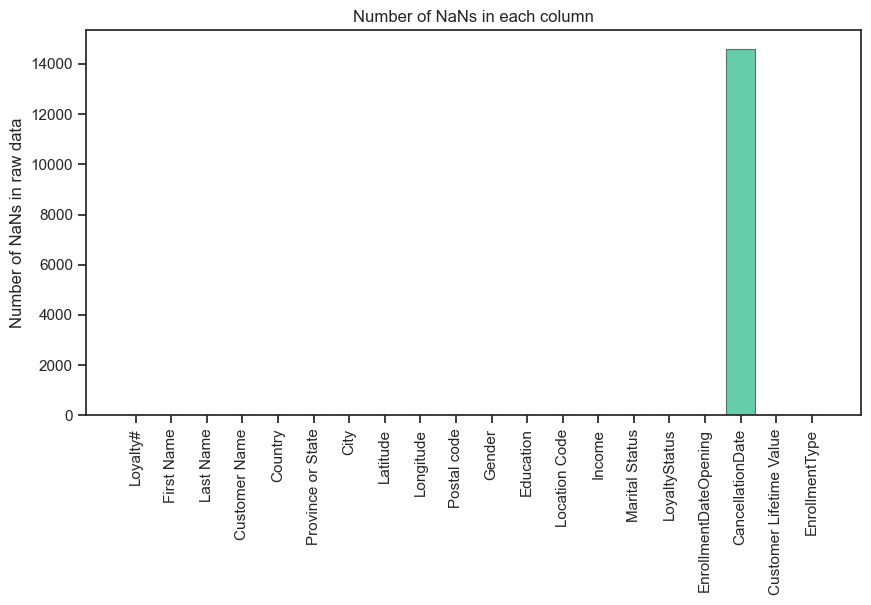

In [2298]:
number_of_nans = CustomerDB.isnull().sum()
x_xis = number_of_nans.index.tolist()
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.ylabel('Number of NaNs in raw data')
plt.title('Number of NaNs in each column')
plt.bar(x=x_xis, height=number_of_nans, color='mediumaquamarine', edgecolor='dimgray', linewidth=0.8)

plt.show()

In [2299]:
# Total rows
total_rows = CustomerDB.shape[0]

# Count of NaNs per column
nan_count = CustomerDB.isna().sum()

# Percentage of NaNs per column
nan_percentage = (nan_count / total_rows) * 100

# Display
nan_percentage


Loyalty#                    0.000000
First Name                  0.000000
Last Name                   0.000000
Customer Name               0.000000
Country                     0.000000
Province or State           0.000000
City                        0.000000
Latitude                    0.000000
Longitude                   0.000000
Postal code                 0.000000
Gender                      0.000000
Education                   0.000000
Location Code               0.000000
Income                      0.118196
Marital Status              0.000000
LoyaltyStatus               0.000000
EnrollmentDateOpening       0.000000
CancellationDate           86.348325
Customer Lifetime Value     0.118196
EnrollmentType              0.000000
dtype: float64

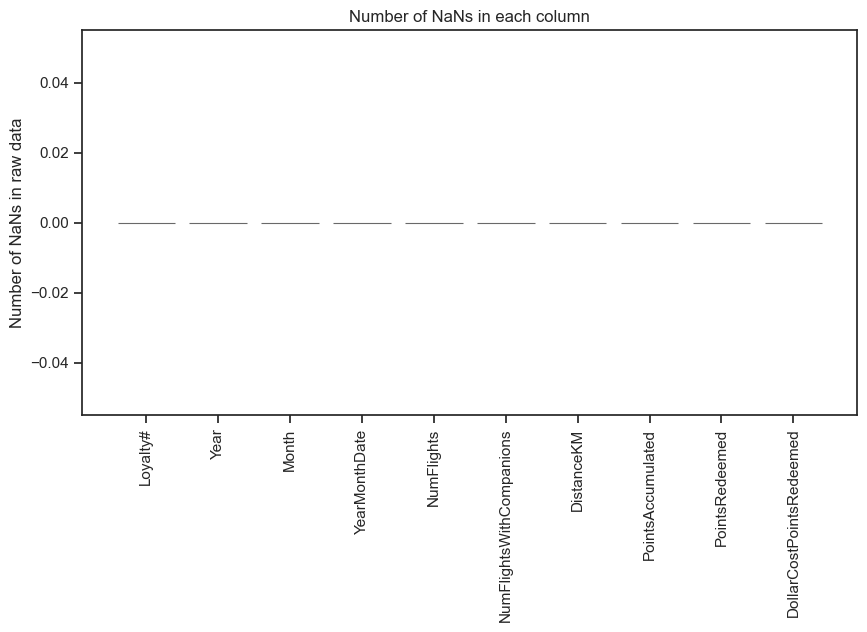

In [2300]:
number_of_nans = FlightsDB.isnull().sum()
x_xis = number_of_nans.index.tolist()
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.ylabel('Number of NaNs in raw data')
plt.title('Number of NaNs in each column')
plt.bar(x=x_xis, height=number_of_nans, color='mediumaquamarine', edgecolor='dimgray', linewidth=0.8)

plt.show()

### Missing Values in CustomerDB

#### Cancellation Date

To address missing values in the CancellationDate column, we will create a new binary feature named 'Is Active.' This feature will indicate whether a customer is active or cancelled. Specifically, for all rows where the CancellationDate is missing (NaN), assign 'Is Active' a value of 1, meaning the customer is active. For rows where CancellationDate is present, assign 'Is Active' a value of 0, indicating cancellation occurred.

In [2301]:
#CustomerDB['CancellationDate'] = CustomerDB['CancellationDate'].fillna('Active')

#### Income

In [2302]:
# Filter rows where Income is missing
income_nan_df = CustomerDB[CustomerDB['Income'].isna()]

# Show how many customers have missing income
print(f"Total customers with missing Income: {income_nan_df.shape[0]}")

income_nan_df.head(20)

Total customers with missing Income: 20


Loyalty# First Name Last Name    Customer Name Country  \
16901    999987      Layla    Murphy     Layla Murphy  Canada   
16902    999988       Jana    Parker      Jana Parker  Canada   
16903    999989      Ethan    Parker     Ethan Parker  Canada   
16904    999990       Ryan  Anderson    Ryan Anderson  Canada   
16905    999991     Olivia      Cote      Olivia Cote  Canada   
16906    999992       Ella       Roy         Ella Roy  Canada   
16907    999993     Elijah      Cook      Elijah Cook  Canada   
16908    999994      Ethan      Chan       Ethan Chan  Canada   
16909    999995       Liam      Wong        Liam Wong  Canada   
16910    999996   Isabella      Ross    Isabella Ross  Canada   
16911    999997      Grace    Miller     Grace Miller  Canada   
16912    999998       Noah  Thompson    Noah Thompson  Canada   
16913    999999       Noah    Walker      Noah Walker  Canada   
16914    100017      Grace    Fortin     Grace Fortin  Canada   
16915    100011     Amelia      Ross      Amelia Ross  Canada   
16916    100012      Ethan  Thompson   Ethan Thompson  Canada   
16917    100013      Layla     Young      Layla Young  Canada   
16918    100014     Amelia   Bennett   Amelia Bennett  Canada   
16919    100015   Benjamin    Wilson  Benjamin Wilson  Canada   
16920    100016       Emma    Martin      Emma Martin  Canada   

      Province or State          City   Latitude   Longitude Postal code  \
16901     New Brunswick   Fredericton  46.029263  -66.565150     R4H 2Y2   
16902            Quebec      Montreal  45.573672  -73.523012     N6B 1N3   
16903           Ontario       Trenton  44.075379  -77.550375     P8F 5C8   
16904     New Brunswick       Moncton  46.106617  -64.714267     B6P 6D0   
16905     New Brunswick   Fredericton  45.950000  -66.652437     X3W 5N2   
16906           Ontario       Toronto  43.706878  -79.437412     P6D 6N2   
16907  British Columbia  Dawson Creek  55.701475 -120.181716     W6H 0Z7   
16908           Ontario        Ottawa  45.365906  -75.723181     B2F 3E1   
16909           Ontario        Ottawa  45.471557  -75.704868     B3A 2R0   
16910           Ontario       Toronto  43.690489  -79.436758     B4W 4M6   
16911     New Brunswick       Moncton  46.067243  -64.729480     S5R 0X5   
16912            Quebec   Quebec City  46.749897  -71.238050     K7T 9I9   
16913           Alberta      Edmonton  53.549353 -113.509109     S7D 0V1   
16914  British Columbia  Dawson Creek  55.751178 -120.264920     E0K 5I2   
16915           Ontario       Toronto  43.593187  -79.444335     W9D 4Q9   
16916            Quebec   Quebec City  46.759733  -71.141009     Y0C 7D6   
16917           Alberta      Edmonton  53.524829 -113.546357     L3S 9Y3   
16918     New Brunswick       Moncton  46.051866  -64.825428     G2S 2B6   
16919            Quebec   Quebec City  46.862970  -71.133444     B1Z 8T3   
16920  British Columbia  Dawson Creek  55.720562 -120.160090     M4A 1E4   

       Gender Education Location Code  Income Marital Status LoyaltyStatus  \
16901  female  Bachelor         Urban     NaN         Single          Star   
16902    male   College         Rural     NaN         Single          Star   
16903    male   College         Rural     NaN        Married          Star   
16904  female   College         Rural     NaN        Married          Star   
16905  female   College      Suburban     NaN        Married          Star   
16906    male   College      Suburban     NaN         Single          Star   
16907  female   College      Suburban     NaN        Married          Star   
16908  female   College         Rural     NaN        Married          Star   
16909  female   College      Suburban     NaN        Married          Star   
16910  female  Bachelor      Suburban     NaN         Single          Star   
16911    male   College         Urban     NaN        Married          Star   
16912    male  Bachelor         Urban     NaN         Single          Star   
16913    male  Bachelor       

All of the 20 customers with Income equals to nan have the same date for Cancellation and Enrollment, which suggers that the customer signed up and canceled on the same day.

The **Income** is missing, so the system likely never collected profile data for these customers because they did not complete or activate their account.

The same for **Customer Lifetime Value**, since the customers never activate their accounts, the CLV will be equal to missing value.

For FlightsDB, these customers may not appear, so we can just drop them.

#### CLV

In [2303]:
# Filter rows where CLV is missing
clv_missing_df = CustomerDB[CustomerDB['Customer Lifetime Value'].isna()]

# Count how many
total_clv_missing = clv_missing_df.shape[0]
print(f"Total customers with missing CLV: {total_clv_missing}")


Total customers with missing CLV: 20


In [2304]:
customers_na = CustomerDB[(CustomerDB['Income'].isna()) & (CustomerDB['Customer Lifetime Value'].isna())]

# Passo 2: pegar lista de IDs
ids_na = customers_na['Loyalty#'].tolist()

# Passo 3: filtrar flights DB por esses IDs
flights_match = FlightsDB[FlightsDB['Loyalty#'].isin(ids_na)]

print(flights_match)

Empty DataFrame
Columns: [Loyalty#, Year, Month, YearMonthDate, NumFlights, NumFlightsWithCompanions, DistanceKM, PointsAccumulated, PointsRedeemed, DollarCostPointsRedeemed]
Index: []


This means we do not have recorded in FlightsDB, so we will remove this 20 rows where both CLV and Income are NaN.

# Data Types
## CustomerDB
We should change the data types of the following features to datetime:

- **EnrollmentDateOpening**

- **CancellationDate**


Discuss if we change now or after

In [2305]:
CustomerDB['EnrollmentDateOpening']= pd.to_datetime(CustomerDB['EnrollmentDateOpening'], errors='coerce')
CustomerDB['CancellationDate']= pd.to_datetime(CustomerDB['CancellationDate'], errors='coerce')
                                               

## FlightsDB

We should change the data types of the following features:
- **NumFlights**: to int
- **NumFlightsWithCompanions**: to int
- **PointsAccumulated**: to int 
- **PointsRedeemed**: to int

In [2306]:
# List of columns to convert
int_columns = ['NumFlights', 'NumFlightsWithCompanions', 'PointsAccumulated', 'PointsRedeemed']

# Convert each column to integer, using 'Int64' for nullable integers
for col in int_columns:
    FlightsDB[col] = pd.to_numeric(FlightsDB[col], errors='coerce').astype('int64')

# Convert both columns to datetime
FlightsDB['YearMonthDate'] = pd.to_datetime(
    FlightsDB['YearMonthDate'], errors='coerce'
)


# Duplicated values in the Primary Key
## CustomerDB
By the shape of the dataset the primary key should be Loyalty#, as such every value in this column should be unique


In [2307]:
primary_key = 'Loyalty#'
unique_values = CustomerDB[primary_key].unique().shape
n_rows = CustomerDB[primary_key].shape [0]
if unique_values != n_rows:
    print('oh no! there are repetitions!')
else:
    print("all good! no repetitions!")

oh no! there are repetitions!


In [2308]:
# Select all rows with duplicated Loyalty#
duplicated_loyalty = CustomerDB[CustomerDB['Loyalty#'].duplicated(keep=False)]

# Sort by Loyalty# and EnrollmentDateOpening
duplicated_loyalty_sorted = duplicated_loyalty.sort_values(by=['Loyalty#', 'EnrollmentDateOpening'])

# Display the result
duplicated_loyalty_sorted

Loyalty#  First Name     Last Name         Customer Name Country  \
1646     101902        Hans   Schlottmann      Hans Schlottmann  Canada   
2668     101902          Yi         Nesti              Yi Nesti  Canada   
15988    106001      Maudie        Hyland         Maudie Hyland  Canada   
700      106001      Ivette        Peifer         Ivette Peifer  Canada   
9413     106509     Ardelia    Whitehorse    Ardelia Whitehorse  Canada   
13053    106509       Stacy      Schwebke        Stacy Schwebke  Canada   
3678     112142      Arnold      Cantoran       Arnold Cantoran  Canada   
9604     112142       Marty         Kijak           Marty Kijak  Canada   
5253     114414        Kala        Bachor           Kala Bachor  Canada   
11411    114414      Temple        Resper         Temple Resper  Canada   
9459     126100     Francie         Tappe         Francie Tappe  Canada   
13207    126100      Pattie      Sweigart       Pattie Sweigart  Canada   
13287    126490       Vesta       Lanfair         Vesta Lanfair  Canada   
10781    126490      Gennie       Mangone        Gennie Mangone  Canada   
4453     130331      Cammie        Pangan         Cammie Pangan  Canada   
8947     130331    Lucienne        Flythe       Lucienne Flythe  Canada   
13656    135421     Beverly    Deoliveira    Beverly Deoliveira  Canada   
3735     135421   Salvatore         Ayyad       Salvatore Ayyad  Canada   
243      156031      Carter       Balette        Carter Balette  Canada   
2416     156031        Onie         Grech            Onie Grech  Canada   
5141     181082      Anissa       Grigsby        Anissa Grigsby  Canada   
6436     181082     Toshiko  Puffenbarger  Toshiko Puffenbarger  Canada   
5        193662    Leatrice        Hanlin       Leatrice Hanlin  Canada   
11170    193662      Selena         Marye          Selena Marye  Canada   
9859     198499      Terrie       Celedon        Terrie Celedon  Canada   
8419     198499      Salome       Kapsner        Salome Kapsner  Canada   
4305     200519       Betty     Hauptmann       Betty Hauptmann  Canada   
3475     200519        Lana       Hineman          Lana Hineman  Canada   
8745     206050      Lonnie        Lovero         Lonnie Lovero  Canada   
4018     206050      Santos       Gigstad        Santos Gigstad  Canada   
5757     208241       Velda         Shank           Velda Shank  Canada   
5238     208241      Glinda         Pavey          Glinda Pavey  Canada   
12587    208485     Charise        Winson        Charise Winson  Canada   
11224    208485        Mila          Hust             Mila Hust  Canada   
9475     215508     Margart          Rigg          Margart Rigg  Canada   
6154     215508      Terrie       Killmon        Terrie Killmon  Canada   
1388     224676    Alfredia         Minty        Alfredia Minty  Canada   
10041    224676   Alexander       Mizelle     Alexander Mizelle  Canada   
7276     237094        Jean      Colleran         Jean Colleran  Canada   
6349     237094       Betty     Lattanzio       Betty Lattanzio  Canada   
14706    243741      Denese        Kinser         Denese Kinser  Canada   
15022    243741     Ulysses        Tatsch        Ulysses Tatsch  Canada   
12855    255475     Florida      Corvelli      Florida Corvelli  Canada   
5322     255475        Onie         Muell            Onie Muell  Canada   
14115    255836      Cristy      Ossowski       Cristy Ossowski  Canada   
13346    255836      Claude          Hoff           Claude Hoff  Canada   
9177     263267     Clifton        Cillis        Clifton Cillis  Canada   
8944     263267      Desire        Leitem         Desire Leitem  Canada   
16766    278854     Marylee     Villicana     Marylee Villicana  Canada   
11139    278854        Evie       Burnias          Evie Burnias  Canada   
141      279419       Reyes       Sobczak         Reyes Sobczak  Canada   
16270    279419     Whitley       Keebler       Whitley Keebler  Canada   
3524     286636       Elvin     

In [2309]:
# Find duplicated combinations
duplicates = CustomerDB.groupby(['Loyalty#', 'EnrollmentDateOpening']).size().reset_index(name='count')
duplicates = duplicates[duplicates['count'] > 1]

print("Duplicated combinations:")
print(duplicates)

Duplicated combinations:
Empty DataFrame
Columns: [Loyalty#, EnrollmentDateOpening, count]
Index: []


In [2310]:
# Count occurrences of each Loyalty#
loyalty_counts = CustomerDB['Loyalty#'].value_counts()

# Filter Loyalty# that appear more than 3 times
loyalty_repeated = loyalty_counts[loyalty_counts > 3]

print("Loyalty# appearing more than 3 times:")
print(loyalty_repeated)

Loyalty# appearing more than 3 times:
Series([], Name: count, dtype: int64)


Currently, we do not have any fully duplicated rows in the dataset, so there is no need to remove anything at this stage.

Although some Loyalty# IDs appear more than once, the rows themselves are different. These cases will be handled later, because even though the ID is the same, the customer names are different. 

We do not have more than 3 different customers for the same ID.

We should delete this duplicated rows since we think it is an error from the dataset. How to do it? We can do it keeping the first row. 

We can do it comparing the enrollment date and the num of flights each customer has. If a customer has numflights>0 and the enrollment date is after, so we can drop this column.

# Comparing Loyalty# in FlightsDB and CustomerDB

In [2311]:
enrollment_date = duplicated_loyalty_sorted[["Loyalty#", "EnrollmentDateOpening", "CancellationDate", "Customer Name"]]

unique_loyalty = enrollment_date["Loyalty#"].unique().tolist()

flight_filtered = FlightsDB[FlightsDB['NumFlights'] > 0]

flight_filtered = flight_filtered[flight_filtered['Loyalty#'].isin(unique_loyalty)]

flight_filtered = flight_filtered[['YearMonthDate', 'Loyalty#', 'NumFlights']]

one_per_id = flight_filtered.groupby('Loyalty#').first().reset_index()

one_per_id.head(100)


Loyalty# YearMonthDate  NumFlights
0     101902    2020-06-01           9
1     106001    2021-12-01           7
2     106509    2021-10-01           1
3     112142    2020-05-01          15
4     114414    2020-05-01           5
5     126490    2020-05-01           5
6     130331    2021-11-01           3
7     135421    2020-05-01           5
8     181082    2020-05-01           2
9     193662    2020-06-01          18
10    198499    2020-04-01          10
11    200519    2020-05-01           6
12    206050    2020-03-01          11
13    208241    2021-11-01          11
14    208485    2020-05-01          13
15    215508    2020-05-01           3
16    237094    2020-06-01          15
17    243741    2020-06-01           7
18    255475    2020-04-01           1
19    255836    2020-06-01          15
20    278854    2020-04-01           4
21    279419    2021-12-01          12
22    286636    2020-05-01          10
23    295906    2020-06-01          13
24    304600    2021-11-01           3
25    308480    2021-12-01           8
26    309230    2020-05-01           7
27    322169    2021-12-01           2
28    323821    2020-05-01           7
29    328623    2020-06-01           2
30    336882    2020-05-01          14
31    342945    2020-06-01           8
32    351615    2020-04-01          12
33    351937    2021-11-01           5
34    354438    2021-10-01           5
35    357901    2021-12-01          10
36    361237    2020-05-01           5
37    368073    2020-05-01           2
38    373638    2021-11-01           9
39    402697    2021-12-01          12
40    411030    2021-11-01           3
41    411523    2020-06-01           6
42    411734    2020-05-01           3
43    417240    2020-06-01          10
44    434807    2020-05-01          13
45    444092    2020-06-01           7
46    455758    2021-04-01           8
47    460272    2021-11-01          12
48    464187    2020-05-01          16
49    464256    2021-12-01           7
50    465260    2020-05-01          15
51    470998    2021-12-01           3
52    474305    2021-10-01           2
53    486860    2021-11-01          13
54    490439    2020-06-01           7
55    499874    2020-04-01           4
56    510182    2020-05-01          14
57    511862    2020-05-01           4
58    512296    2020-05-01           6
59    528447    2020-06-01           5
60    536021    2021-11-01           8
61    547522    2021-06-01           1
62    573446    2020-05-01           6
63    582493    2020-05-01           7
64    584782    2021-10-01           2
65    584833    2021-12-01           3
66    585756    2020-05-01           3
67    593252    2021-10-01           9
68    601131    2020-05-01           7
69    604274    2020-04-01           3
70    604870    2020-06-01          17
71    615439    2020-05-01           3
72    615561    2020-06-01          12
73    617489    2020-05-01          13
74    622975    2021-05-01           1
75    642020    2020-05-01           3
76    650466    2020-05-01           8
77    653081    2021-11-01           4
78    654433    2021-04-01           3
79    678205    2021-11-01           8
80    682979    2020-05-01          11
81    684123    2020-06-01          19
82    684881    2020-05-01          11
83    684889    2020-06-01          17
84    687951    2021-10-01           2
85    700650    2020-03-01           5
86    702482    2021-12-01          15
87    713132    2020-05-01          11
88    727091    2021-10-01           3
89    727507    2021-11-01           7
90    732304    2021-10-01           4
91    736504    2020-05-01           8
92    738567    2020-04-01           6
93    746226    2021-12-01          11
94    750578    2021-12-01           4
95    750665    2020-05-01           7
96    774168    2021-11-01           9
97    775768    2020-05-01          11
98    776466    2021-11-01           8
99    819842    2021-12-01           6

We can check that if in some cases we have YearMonthDate smaller than EnrollmentDateOpening, which makes no sense. We can delete this rows to resolve duplicates.

In [2312]:

merged_ = pd.merge(enrollment_date, one_per_id, how='inner', on='Loyalty#')
merged_

cond1 = merged_['CancellationDate'].isna() & (merged_['YearMonthDate'] < merged_['EnrollmentDateOpening'])

cond2 = (~merged_['CancellationDate'].isna()) & (merged_['EnrollmentDateOpening'] < merged_['CancellationDate']) & \
        ((merged_['YearMonthDate'] < merged_['EnrollmentDateOpening']) | (merged_['YearMonthDate'] > merged_['CancellationDate']))

cond3 = (~merged_['CancellationDate'].isna()) & (merged_['EnrollmentDateOpening'] > merged_['CancellationDate']) & \
        ((merged_['YearMonthDate'] > merged_['CancellationDate']) & (merged_['YearMonthDate'] < merged_['EnrollmentDateOpening']))

filtered_df = merged_[cond1 | cond2 | cond3]

filtered_df.head(10)


Loyalty# EnrollmentDateOpening CancellationDate      Customer Name  \
147    617489            2021-05-12              NaT  Mercedez Glockner   
151    642020            2021-05-17              NaT       Chang Zebell   
185    738567            2021-04-20              NaT   Vernon Prosperie   
186    738567            2021-10-01              NaT   Terica Langeland   
229    899760            2021-04-01              NaT  Marylin Ordeneaux   
230    899760            2021-09-30              NaT       Kiley Carcia   

    YearMonthDate  NumFlights  
147    2020-05-01          13  
151    2020-05-01           3  
185    2020-04-01           6  
186    2020-04-01           6  
229    2020-05-01          14  
230    2020-05-01          14

**Scenario 1**: CancellationDate is NaN

Keep rows where YearMonthDate is earlier than EnrollmentDateOpening.

**Scenario 2**: CancellationDate exists and EnrollmentDateOpening < CancellationDate

Action: Keep rows where YearMonthDate is either:

Earlier than the enrollment date, or Later than the cancellation date

**Scenario 3**: CancellationDate exists and EnrollmentDateOpening > CancellationDate

Action: Keep rows where YearMonthDate is between the cancellation and enrollment dates.

# Consistency Between Features
## CustomerDB

#### EnrollmentDateOpening and CancellationDate

In [2313]:
# Rows where CancellationDate is before EnrollmentDateOpening
invalid_dates = CustomerDB[
    (CustomerDB['CancellationDate'].notna()) & 
    (CustomerDB['CancellationDate'] < CustomerDB['EnrollmentDateOpening'])
]

print("Rows with CancellationDate before EnrollmentDate:")
display(invalid_dates)

# Rows where CancellationDate exists but LoyaltyStatus is still active
invalid_status = CustomerDB[
    (CustomerDB['CancellationDate'].notna()) & 
    (CustomerDB['LoyaltyStatus'].notna())
]

print("Rows with CancellationDate but still active LoyaltyStatus:")
display(invalid_status)


Rows with CancellationDate before EnrollmentDate:


Loyalty#  First Name      Last Name           Customer Name Country  \
72       357549      Elisha          Furna            Elisha Furna  Canada   
77       265297      Ebonie          Radde            Ebonie Radde  Canada   
176      845613      Jerald        Shiring          Jerald Shiring  Canada   
210      830547      Dortha          Detar            Dortha Detar  Canada   
304      514900       Edith        Forslin           Edith Forslin  Canada   
556      381786      Carmen         Cagnon           Carmen Cagnon  Canada   
645      273353        Ruby      Stanuszek          Ruby Stanuszek  Canada   
678      698180       Elmer         Monath            Elmer Monath  Canada   
802      455287       Donny         Parvin            Donny Parvin  Canada   
881      456752        Bula        Genther            Bula Genther  Canada   
925      217616        Pura       Salvitti           Pura Salvitti  Canada   
1030     221014     Demetra       Riquelme        Demetra Riquelme  Canada   
1124     258141        Fern          Nabor              Fern Nabor  Canada   
1133     344749     Melanie           Heal            Melanie Heal  Canada   
1134     495632    Marisela        Golabek        Marisela Golabek  Canada   
1254     154194     Caridad         Vigilo          Caridad Vigilo  Canada   
1264     962472       Jesus       Knighter          Jesus Knighter  Canada   
1422     162472      Piedad        Weppler          Piedad Weppler  Canada   
1539     376367      Jessie       Granholm         Jessie Granholm  Canada   
1857     950896     Lanelle         Vicini          Lanelle Vicini  Canada   
1916     384818     Bronwyn         Lorden          Bronwyn Lorden  Canada   
1919     861480        Hans         Shopen             Hans Shopen  Canada   
2010     180024        Lane          Benac              Lane Benac  Canada   
2052     252135      Miguel        Vanella          Miguel Vanella  Canada   
2189     102615      Erline        Fellers          Erline Fellers  Canada   
2210     718199       Shela         Devaul            Shela Devaul  Canada   
2289     551313     Johnnie    Bartholomew     Johnnie Bartholomew  Canada   
2309     891516  Kristopher        Pavelko      Kristopher Pavelko  Canada   
2517     393130      Ariane    Lachappelle      Ariane Lachappelle  Canada   
2600     362823        Sage          Tiano              Sage Tiano  Canada   
2621     541410      Alfred         Wiford           Alfred Wiford  Canada   
2679     153439       Phebe      Mellecker         Phebe Mellecker  Canada   
2816     847283       Zella          Khoun             Zella Khoun  Canada   
2920     550575     Rolande     Skarzynski      Rolande Skarzynski  Canada   
2925     936010     Yulanda           Lile            Yulanda Lile  Canada   
2935     579438      Jimmie        Schmoll          Jimmie Schmoll  Canada   
3126     725962       Deann         Lindzy            Deann Lindzy  Canada   
3147     331094     Leandra        Salinas         Leandra Salinas  Canada   
3183     222644      Lonnie       Naysmith         Lonnie Naysmith  Canada   
3296     241468      Darron        Crellin          Darron Crellin  Canada   
3343     878518        Omer    Poniatowski        Omer Poniatowski  Canada   
3372     932244     Shawana           Samu            Shawana Samu  Canada   
3474     172491       Mayme         Mouzas            Mayme Mouzas  Canada   
3599     228557    Gricelda          Walks          Gricelda Walks  Canada   
3609     221709       Fanny        Larimer           Fanny Larimer  Canada   
3814     961264      Norman      Hildinger        Norman Hildinger  Canada   
4098     867561          Wm      Rotchford            Wm Rotchford  Canada   
4139     353369       Titus         Kidane            Titus Kidane  Canada   
4157     228030       Elana        Depaoli           Elana Depaoli  Canada   
4228     103985       Grant        Perloff           Grant Perloff  Canada   
4284     623946       Kandi  

Rows with CancellationDate but still active LoyaltyStatus:


Loyalty#   First Name      Last Name            Customer Name Country  \
2        429460       Necole         Hannon            Necole Hannon  Canada   
19       354730      Herbert     Cantabrana       Herbert Cantabrana  Canada   
31       201574        Trudy         Roscoe             Trudy Roscoe  Canada   
39       834891      Wendell         Besley           Wendell Besley  Canada   
45       733338      Raphael        Muskrat          Raphael Muskrat  Canada   
51       869743         Sima         Parton              Sima Parton  Canada   
72       357549       Elisha          Furna             Elisha Furna  Canada   
77       265297       Ebonie          Radde             Ebonie Radde  Canada   
83       283314           Vi      Scialdone             Vi Scialdone  Canada   
84       322102   Hermelinda          Hilst         Hermelinda Hilst  Canada   
86       654748         Lona           Hyer                Lona Hyer  Canada   
95       566033         Cruz           Arlt                Cruz Arlt  Canada   
98       174896      Freeman   Decristoforo     Freeman Decristoforo  Canada   
109      881142       Luanna         Hatlee            Luanna Hatlee  Canada   
113      711363     Mariella        Corkron         Mariella Corkron  Canada   
122      539673         Song         Wiesen              Song Wiesen  Canada   
125      528492         Lynn       Chestnut            Lynn Chestnut  Canada   
128      912220       Jammie           Hyon              Jammie Hyon  Canada   
129      382197     Marianne        Kirtley         Marianne Kirtley  Canada   
140      520321      Rachele        Mazingo          Rachele Mazingo  Canada   
155      603248      Lynwood       Overmyer         Lynwood Overmyer  Canada   
156      467182       Hubert         Rattay            Hubert Rattay  Canada   
169      553936       Tianna    Kozakiewicz       Tianna Kozakiewicz  Canada   
176      845613       Jerald        Shiring           Jerald Shiring  Canada   
183      914255        Somer      Dibartolo          Somer Dibartolo  Canada   
186      260106     Apolonia        Leicher         Apolonia Leicher  Canada   
189      397518       Karima      Santeramo         Karima Santeramo  Canada   
190      645742       Billie       Gunzalez          Billie Gunzalez  Canada   
197      530105     Delphine           Bohm            Delphine Bohm  Canada   
201      398535          Val        Coryell              Val Coryell  Canada   
210      830547       Dortha          Detar             Dortha Detar  Canada   
212      436498       Helene          Jacks             Helene Jacks  Canada   
243      156031       Carter        Balette           Carter Balette  Canada   
245      602176         Jude          Dugas               Jude Dugas  Canada   
267      176885        Gregg        Willies            Gregg Willies  Canada   
275      258358        Eddie         Cuzman             Eddie Cuzman  Canada   
277      474174    Augustine          Mcfee          Augustine Mcfee  Canada   
278      474172      Pearlie        Laprise          Pearlie Laprise  Canada   
281      971902      Rosette       Veenstra         Rosette Veenstra  Canada   
283      474757         Dana       Vanvliet            Dana Vanvliet  Canada   
292      236300     Clarence         Forman          Clarence Forman  Canada   
304      514900        Edith        Forslin            Edith Forslin  Canada   
311      274698         Lula        Jonason             Lula Jonason  Canada   
352      471018       Jarred     Lovinggood        Jarred Lovinggood  Canada   
374      296412          Ray        Nucklos              Ray Nucklos  Canada   
382      566343       Breann       Bashford          Breann Bashford  Canada   
383      263729      Earnest       Stronach         Earnest Stronach  Canada   
384      326561       Brande         Brinks            Brande Brinks  Canada   
386      313837         Rudy         Hoblit              Rudy Hoblit  Canada   
391    

### CLV and Cancellation Date

In [2314]:
# Filter only customers who have a cancellation date (i.e., actually canceled)
canceled_df = CustomerDB[CustomerDB['CancellationDate'].notna()].copy()

# Create a boolean column to check if the cancellation happened before enrollment
canceled_df['CancelBeforeEnrollment'] = canceled_df['CancellationDate'] < canceled_df['EnrollmentDateOpening']

# Calculate the mean CLV for each group (True = canceled before enrollment, False = after)
mean_clv = canceled_df.groupby('CancelBeforeEnrollment')['Customer Lifetime Value'].mean()

# Display results
print("Average Customer Lifetime Value by cancellation timing:")
print(mean_clv)


Average Customer Lifetime Value by cancellation timing:
CancelBeforeEnrollment
False    8142.431606
True     8323.915000
Name: Customer Lifetime Value, dtype: float64


### Customer Name

In [2315]:
# Create a full name from first and last name
CustomerDB['FullName'] = CustomerDB['First Name'].str.strip() + ' ' + CustomerDB['Last Name'].str.strip()

# Compare with Customer Name
name_inconsistencies = CustomerDB[CustomerDB['FullName'] != CustomerDB['Customer Name'].str.strip()]

# Display inconsistent rows
name_inconsistencies[['Loyalty#','First Name','Last Name','Customer Name','FullName']]

if name_inconsistencies.empty:
    print("All names are correct")
else:
    print("Please review this columns")


All names are correct


In [2316]:
# Create full name
CustomerDB['FullName'] = CustomerDB['First Name'].str.strip() + ' ' + CustomerDB['Last Name'].str.strip()

# Find duplicated names
duplicates_names = CustomerDB[CustomerDB.duplicated(subset='FullName', keep=False)]

# Sort for easier inspection
duplicates_names = duplicates_names.sort_values(by='FullName')

duplicates_names[['Loyalty#','First Name','Last Name','Customer Name','EnrollmentDateOpening']]


Empty DataFrame
Columns: [Loyalty#, First Name, Last Name, Customer Name, EnrollmentDateOpening]
Index: []

### Latitude and Longitude

In [ ]:
CustomerDB.columns

## FlightsDB

### Points Accumulated and Points Redeemed

In [2317]:
# Group by Loyalty# and sum the relevant numeric columns
loyalty_summary = FlightsDB.groupby('Loyalty#').agg({
    'PointsAccumulated': 'sum',
    'PointsRedeemed': 'sum',
    'NumFlights': 'sum',
    'NumFlightsWithCompanions': 'sum',
    'DistanceKM': 'sum'
}).reset_index()

# Check points consistency: PointsAccumulated >= PointsRedeemed
loyalty_summary['points_consistent'] = loyalty_summary['PointsAccumulated'] >= loyalty_summary['PointsRedeemed']

# Check flights consistency: NumFlights >= NumFlightsWithCompanions
loyalty_summary['flights_consistent'] = loyalty_summary['NumFlights'] >= loyalty_summary['NumFlightsWithCompanions']

# Identify rows where consistency fails
points_issues = loyalty_summary[loyalty_summary['points_consistent'] == False]
flights_issues = loyalty_summary[loyalty_summary['flights_consistent'] == False]

print("Loyalty# with Points Issues (Accumulated < Redeemed):")
print(points_issues)

print("\nLoyalty# with Flights Issues (NumFlights < NumFlightsWithCompanions):")
print(flights_issues)




Loyalty# with Points Issues (Accumulated < Redeemed):
       Loyalty#  PointsAccumulated  PointsRedeemed  NumFlights  \
81       103975               5457            9014          50   
120      106444              12108           12947          47   
170      108857               8036           10549          44   
174      109023              21902           25590         165   
299      116238               6771            6798          48   
308      116897               2664           10266          35   
389      121236              10478           15830          45   
396      121751               2828            3049          29   
403      122020              42690           48553         250   
409      122283              21991           24037         145   
443      123830               4675           13789          16   
528      128749                884            3700          18   
628      134180              24207           25626         113   
663      136049       

In [2318]:
points_issues_head = loyalty_summary[loyalty_summary['PointsAccumulated'] < loyalty_summary['PointsRedeemed']].head()

points_issues_head.head()

Loyalty#  PointsAccumulated  PointsRedeemed  NumFlights  \
81     103975               5457            9014          50   
120    106444              12108           12947          47   
170    108857               8036           10549          44   
174    109023              21902           25590         165   
299    116238               6771            6798          48   

     NumFlightsWithCompanions  DistanceKM  points_consistent  \
81                         11     54588.0              False   
120                        10    121106.0              False   
170                        10     80398.9              False   
174                        41    219114.3              False   
299                        14     67729.0              False   

     flights_consistent  
81                 True  
120                True  
170                True  
174                True  
299                True

### Distance KM and Points Accumulated

In [2319]:
# Filter rows where DistanceKM > 0 but PointsAccumulated is 0 or missing
distance_no_points = FlightsDB[
    (FlightsDB['DistanceKM'] > 0) & 
    ((FlightsDB['PointsAccumulated'] == 0) | (FlightsDB['PointsAccumulated'].isna()))
]

# Show first few problematic rows
print("Sample rows where DistanceKM > 0 but PointsAccumulated is missing or zero:")
print(distance_no_points.head())

# Count total number of such rows
num_distance_no_points = distance_no_points.shape[0]
print(f"\nTotal rows with DistanceKM > 0 but PointsAccumulated = 0 or NaN: {num_distance_no_points}")


Sample rows where DistanceKM > 0 but PointsAccumulated is missing or zero:
Empty DataFrame
Columns: [Loyalty#, Year, Month, YearMonthDate, NumFlights, NumFlightsWithCompanions, DistanceKM, PointsAccumulated, PointsRedeemed, DollarCostPointsRedeemed]
Index: []

Total rows with DistanceKM > 0 but PointsAccumulated = 0 or NaN: 0


In [2320]:
# Filter rows where PointsAccumulated > 0 but DistanceKM is 0 or missing
points_no_distance = FlightsDB[
    (FlightsDB['PointsAccumulated'] > 0) &
    ((FlightsDB['DistanceKM'] == 0) | (FlightsDB['DistanceKM'].isna()))
]

# Show first few problematic rows
print("Sample rows where PointsAccumulated > 0 but DistanceKM = 0 or NaN:")
print(points_no_distance.head())

# Count total number of such rows
num_points_no_distance = points_no_distance.shape[0]
print(f"\nTotal rows with PointsAccumulated > 0 but DistanceKM = 0 or NaN: {num_points_no_distance}")


Sample rows where PointsAccumulated > 0 but DistanceKM = 0 or NaN:
Empty DataFrame
Columns: [Loyalty#, Year, Month, YearMonthDate, NumFlights, NumFlightsWithCompanions, DistanceKM, PointsAccumulated, PointsRedeemed, DollarCostPointsRedeemed]
Index: []

Total rows with PointsAccumulated > 0 but DistanceKM = 0 or NaN: 0


# EDA

# Univariate Analysis

## Categorical Features

## CustomerDB

In [2321]:
non_numerical_columns = CustomerDB.select_dtypes(include=['object']).columns.tolist()

In [2322]:
for col in non_numerical_columns:
    print(f'{col}: {CustomerDB[col].unique()}')

First Name: ['Cecilia' 'Dayle' 'Necole' ... 'Juliann' 'Olivia' 'Liam']
Last Name: ['Householder' 'Menez' 'Hannon' ... 'Bennett' 'Wilson' 'Martin']
Customer Name: ['Cecilia Householder' 'Dayle Menez' 'Necole Hannon' ... 'Amelia Bennett'
 'Benjamin Wilson' 'Emma Martin']
Country: ['Canada']
Province or State: ['Ontario' 'Alberta' 'British Columbia' 'Quebec' 'Yukon' 'New Brunswick'
 'Manitoba' 'Nova Scotia' 'Saskatchewan' 'Newfoundland'
 'Prince Edward Island']
City: ['Toronto' 'Edmonton' 'Vancouver' 'Hull' 'Whitehorse' 'Trenton' 'Montreal'
 'Dawson Creek' 'Quebec City' 'Moncton' 'Fredericton' 'Ottawa' 'Tremblant'
 'Calgary' 'Whistler' 'Thunder Bay' 'Peace River' 'Winnipeg' 'Sudbury'
 'West Vancouver' 'Halifax' 'London' 'Victoria' 'Regina' 'Kelowna'
 "St. John's" 'Kingston' 'Banff' 'Charlottetown']
Postal code: ['M2Z 4K1' 'T3G 6Y6' 'V6E 3D9' 'P1W 1K4' 'J8Y 3Z5' 'Y2K 6R0' 'P5S 6R4'
 'K8V 4B2' 'H2Y 2W2' 'M8Y 4K8' 'U5I 4F1' 'G1B 3L5' 'H4G 3T4' 'M2M 7K8'
 'M2M 6J7' 'E1A 2A7' 'E3B 2H2' 'M1R 4K

## Gender

In [2323]:
CustomerDB['Gender'] = CustomerDB['Gender'].str.capitalize()

## Postal Code

In [2324]:
# Canadian postal code format: A1A 1A1
pattern = r'^[A-Z]\d[A-Z] \d[A-Z]\d$'

# Check format validity
CustomerDB['ValidPostalCode'] = CustomerDB['Postal code'].str.match(pattern)

# Filter invalid postal codes
invalid_postal = CustomerDB[~CustomerDB['ValidPostalCode']]

# Show unique invalid postal codes with province/state and loyalty ID
unique_invalid = invalid_postal[['Postal code', 'Province or State']].drop_duplicates()

print(unique_invalid)



    Postal code Province or State
73      V10 6T5  British Columbia
110     V09 2E9  British Columbia


we have Postal Code wrongs, so this means we have to change it.

In [2325]:
CustomerDB = CustomerDB.drop(columns=['ValidPostalCode'])

print(CustomerDB.columns)

Index(['Loyalty#', 'First Name', 'Last Name', 'Customer Name', 'Country',
       'Province or State', 'City', 'Latitude', 'Longitude', 'Postal code',
       'Gender', 'Education', 'Location Code', 'Income', 'Marital Status',
       'LoyaltyStatus', 'EnrollmentDateOpening', 'CancellationDate',
       'Customer Lifetime Value', 'EnrollmentType', 'FullName'],
      dtype='object')


## First Name, Last Name and Customer Name

In [2326]:
# Clean spaces
CustomerDB['First Name'] = CustomerDB['First Name'].str.strip()
CustomerDB['Last Name'] = CustomerDB['Last Name'].str.strip()
CustomerDB['Customer Name'] = CustomerDB['Customer Name'].str.strip()

# Updated pattern (allows accents, hyphens, apostrophes, spaces)
pattern = r'^[A-Z][A-Za-zÀ-ÿ\' -]*$'

invalid_names = CustomerDB[
    ~CustomerDB['First Name'].fillna('').str.match(pattern) |
    ~CustomerDB['Last Name'].fillna('').str.match(pattern) |
    ~CustomerDB['Customer Name'].fillna('').str.match(pattern)
]

print(invalid_names[['Loyalty#', 'First Name', 'Last Name', 'Customer Name']].drop_duplicates())


Empty DataFrame
Columns: [Loyalty#, First Name, Last Name, Customer Name]
Index: []


#### Histograms

In [ ]:
exclude_cols = ['First Name', 'Customer Name', 'Postal code', 'Last Name', 'Loyalty#']

categorical_cols_filtered = [col for col in non_numerical_columns if col not in exclude_cols]

# Number of columns per row
cols_per_row = 3

# Calculate number of rows needed
num_rows = math.ceil(len(categorical_cols_filtered) / cols_per_row)

# Set up the figure
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(5*cols_per_row, 4*num_rows))
axes = axes.flatten()  # flatten in case we have less plots than grid

for i, col in enumerate(categorical_cols_filtered):
    sns.countplot(data=CustomerDB, x=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

# Turn off any unused subplots
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

- **Gender**: similar proportion for both men and women, indicating that it holds significance for cluster analysis
- **Location Code**: also demonstrastes a good distribution, making it useful for clustering.
- **EnrollmentType**, **Education** and **Marital Status** exhibit substantial proportional differences, which suggests they may not serve as strong indicators for defininf clusters

### Pie Chart

## Province or State and City

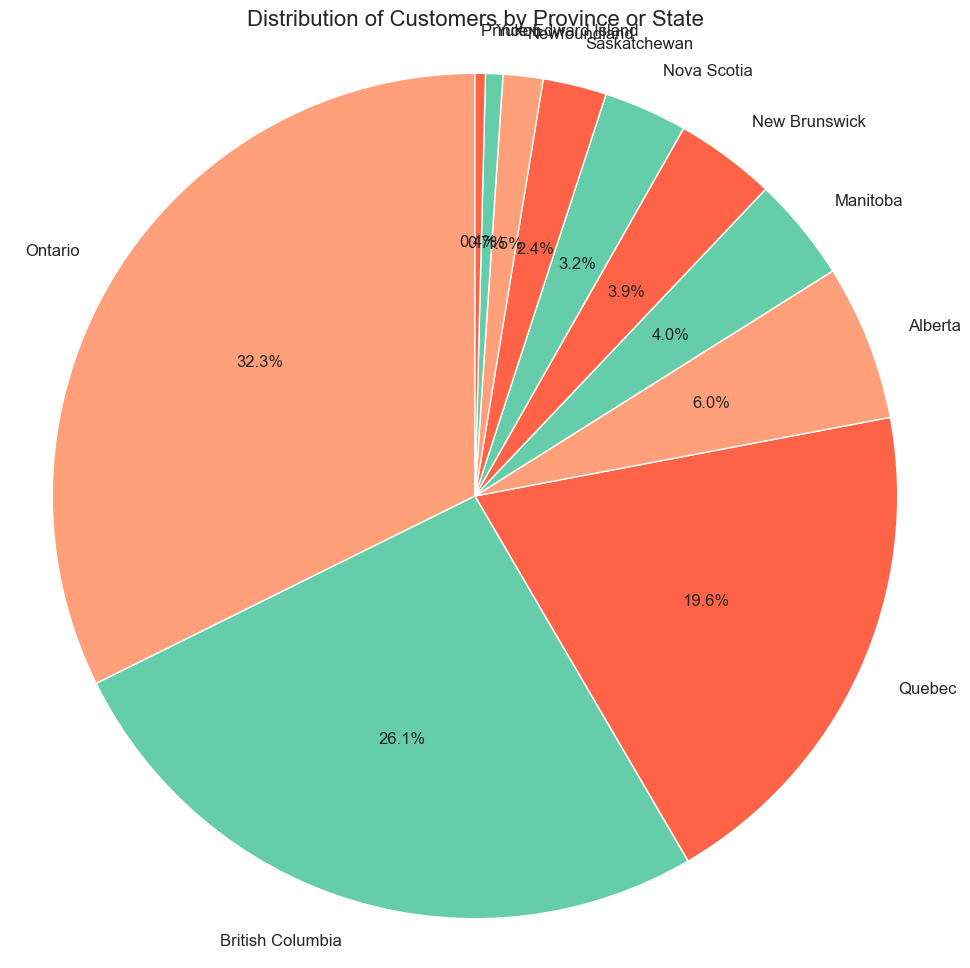

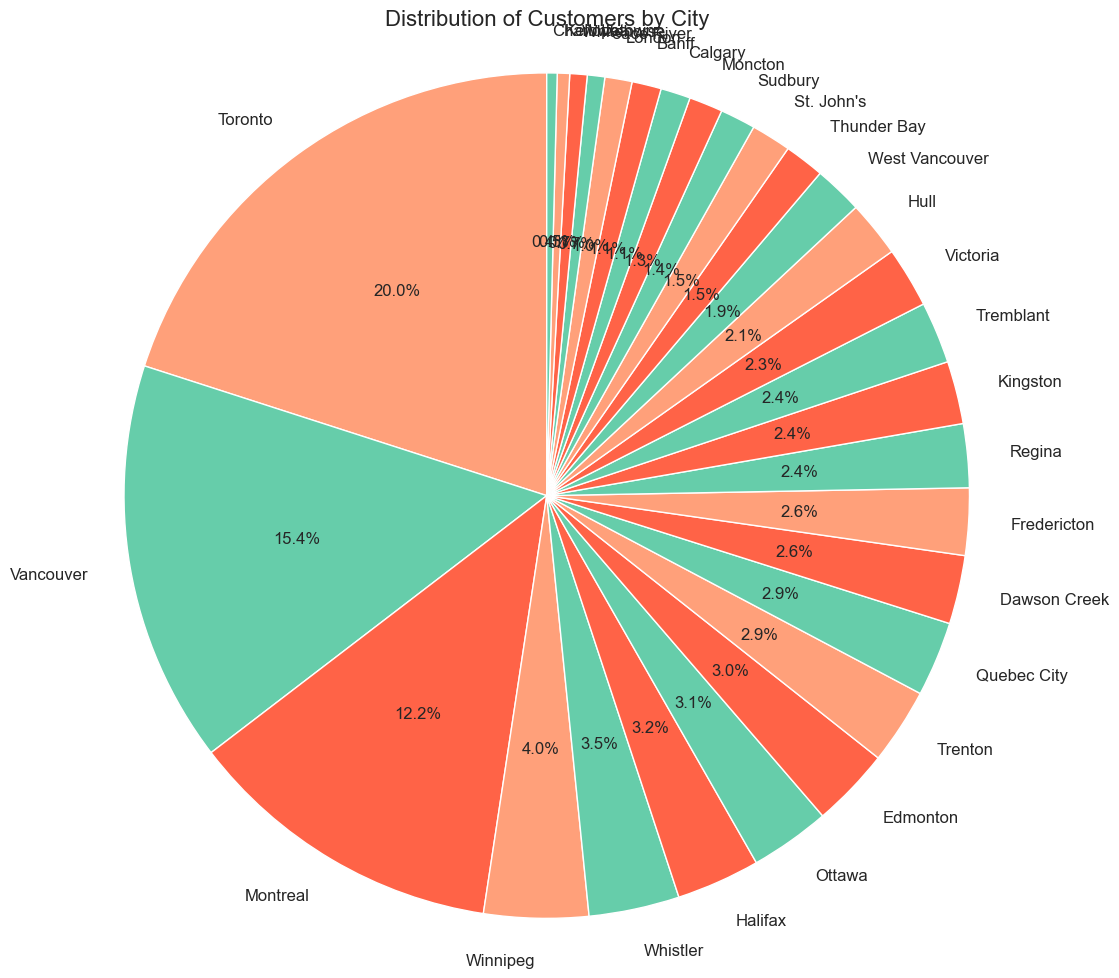

In [ ]:
columns_to_plot = ['Province or State', 'City']

colors = ['lightsalmon', 'mediumaquamarine', 'tomato','lightsalmon', 
          'mediumaquamarine','tomato', 'mediumaquamarine', 'tomato']

for col in columns_to_plot:
    counts = CustomerDB[col].value_counts()
    
    plt.figure(figsize=(12, 12))
    plt.pie(
        counts, 
        labels=counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=colors[:len(counts)],  # Use only as many colors as needed
        textprops={'fontsize': 12}
    )
    plt.title(f'Distribution of Customers by {col}', fontsize=16)
    plt.axis('equal')
    plt.show()
    

## Enrollment Type

In [ ]:
enrollment_prop = CustomerDB['EnrollmentType'].value_counts(normalize=True).round(4) * 100

print(enrollment_prop.reset_index().rename(columns={'index': 'EnrollmentType', 'EnrollmentType': 'Percentage (%)'}))

   Percentage (%)  proportion
0        Standard       93.22
1  2021 Promotion        6.78


This imbalance on **EnrollmentType** can reduce the variable’s effectiveness in distinguishing clusters because most data points have the same value. We will drop this feature since does not give us relevant information.

## Numerical Features

In [ ]:
numerical_columns = CustomerDB.select_dtypes(include=['number']).columns.tolist() 
for col in numerical_columns:
    print(f'{col}: {CustomerDB[col].unique()}')

Loyalty#: [480934 549612 429460 ... 100014 100015 100016]
Latitude: [43.653225 53.544388 49.28273  45.42873  60.721188 44.101128 45.50169
 55.759628 46.813877 46.087818 45.963589 45.421532 46.118462 51.048615
 50.116322 48.380894 56.23418  49.895138 46.522099 49.328625 44.648766
 42.984924 48.428421 50.44521  49.887951 47.561508 44.231171 51.178398
 46.238239 46.029263 45.573672 44.075379 46.106617 45.95     43.706878
 55.701475 45.365906 45.471557 43.690489 46.067243 46.749897 53.549353
 55.751178 43.593187 46.759733 53.524829 46.051866 46.86297  55.720562]
Longitude: [ -79.383186 -113.49093  -123.12074   -75.713364 -135.05684   -77.576309
  -73.567253 -120.23766   -71.207977  -64.778229  -66.643112  -75.697189
  -74.596184 -114.07085  -122.95736   -89.247681 -117.28938   -97.138374
  -80.953033 -123.16019   -63.575237  -81.245277 -123.36565  -104.6189
 -119.49601   -52.712578  -76.485954 -115.5708    -63.131069  -66.56515
  -73.523012  -77.550375  -64.714267  -66.652437  -79.437412 -

In [ ]:
# Define expected ranges for each column
rules = {
    'Loyalty#': lambda x: x >= 0,
    'Latitude': lambda x: (x >= -90) & (x <= 90),
    'Longitude': lambda x: (x >= -180) & (x <= 180),
    'Income': lambda x: x >= 0,
    'Customer Lifetime Value': lambda x: x >= 0
}

# Check each column
for col in numerical_columns:
    invalid_rows = CustomerDB[~rules[col](CustomerDB[col])]
    print(f"--- {col} ---")
    if invalid_rows.empty:
        print("All values are consistent ✅\n")
    else:
        print(f"Inconsistent values found ({len(invalid_rows)} rows):")
        print(invalid_rows[[col]])
        print("\n")


--- Loyalty# ---
All values are consistent ✅

--- Latitude ---
All values are consistent ✅

--- Longitude ---
All values are consistent ✅

--- Income ---
Inconsistent values found (20 rows):
       Income
16901     NaN
16902     NaN
16903     NaN
16904     NaN
16905     NaN
16906     NaN
16907     NaN
16908     NaN
16909     NaN
16910     NaN
16911     NaN
16912     NaN
16913     NaN
16914     NaN
16915     NaN
16916     NaN
16917     NaN
16918     NaN
16919     NaN
16920     NaN


--- Customer Lifetime Value ---
Inconsistent values found (20 rows):
       Customer Lifetime Value
16901                      NaN
16902                      NaN
16903                      NaN
16904                      NaN
16905                      NaN
16906                      NaN
16907                      NaN
16908                      NaN
16909                      NaN
16910                      NaN
16911                      NaN
16912                      NaN
16913                      NaN
16914     

### HIstograms

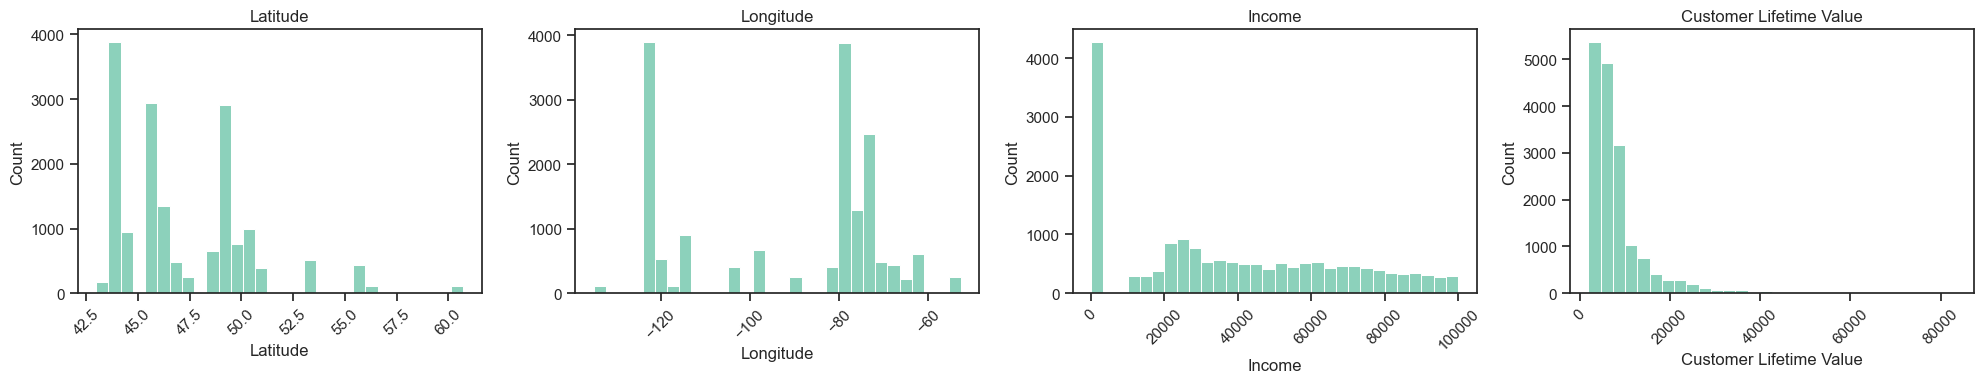

In [ ]:
exclude_numeric_cols = ['Loyalty#']

numeric_cols_filtered = [col for col in numerical_columns if col not in exclude_numeric_cols]

cols_per_row = 4

num_rows = math.ceil(len(numeric_cols_filtered) / cols_per_row)

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(5*cols_per_row, 4*num_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols_filtered):
    sns.histplot(CustomerDB[col], kde=False, ax=axes[i], bins=30)
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


- **Latitude**: Distribution is multi-modal, with several peaks. Most customers are concentrated between 42.50 degrees and a small number of customers exist at extreme latitudes, which could be outliers.
- **Income**: Highly skewed to the left (most values near 0). Many customers have very low income, with a long tail extendind up to 100.000.
- **CLV**: Roght-skewed as well, with most of customers have low CLV. A long tail indicates a few high-value customers.

## Boxplots

#### Outliers

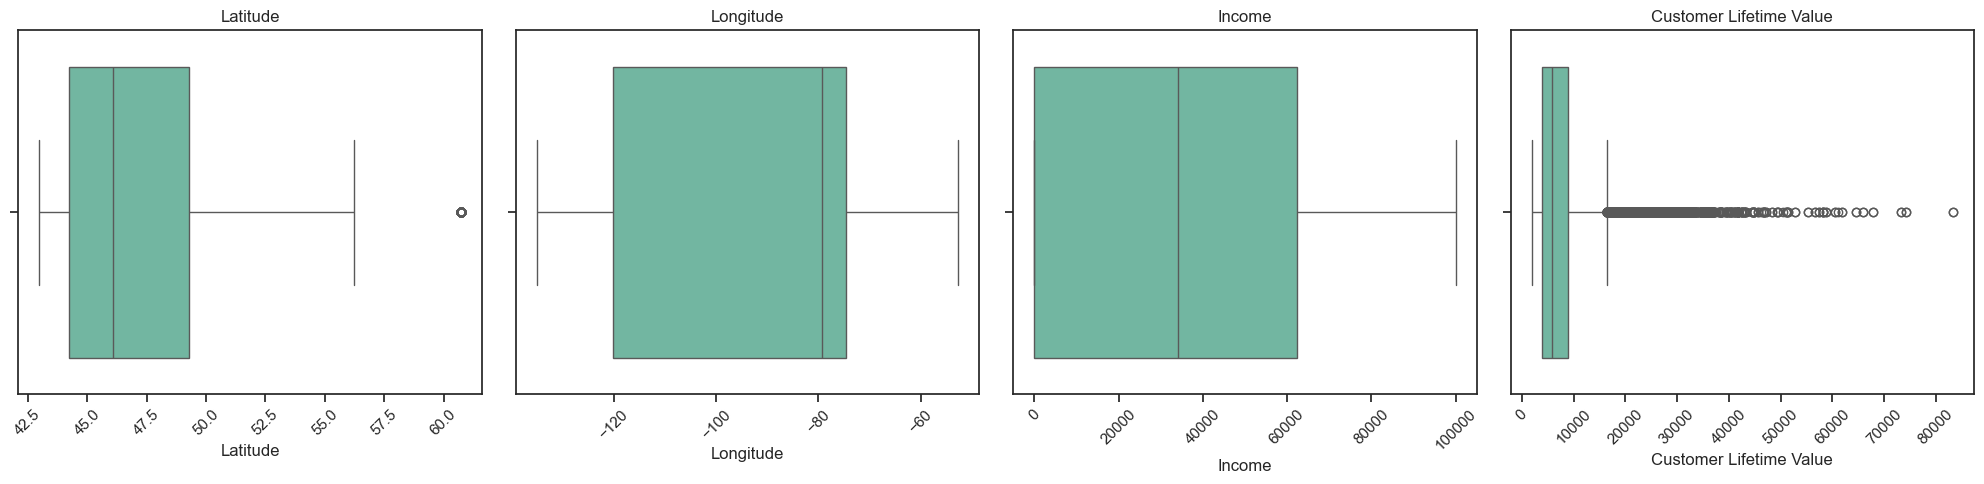

In [ ]:
cols_per_row = 4

num_rows = math.ceil(len(numeric_cols_filtered) / cols_per_row)

fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(5*cols_per_row, 5*num_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols_filtered):
    sns.boxplot(data=CustomerDB, x=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


**Latitude** – There is a single noticeable outlier at around 60°, which might represent a customer located much farther north than most (possibly from Alaska or Northern Canada if this is U.S.-based data).

**Longitude** – No major outliers are visible; values are mostly within a normal U.S. range (around -130° to -60°).

**Income** – The distribution looks relatively symmetric, and there are no strong outliers. Most incomes fall below 100,000.

**Customer Lifetime Value (CLV)** – This variable has a significant number of outliers on the higher end. Many points are scattered far beyond the upper whisker, indicating customers with exceptionally high lifetime values compared to the rest.
These may represent high-value or loyal customers, or possibly data entry errors (e.g., misplaced decimal points).

## Latitude

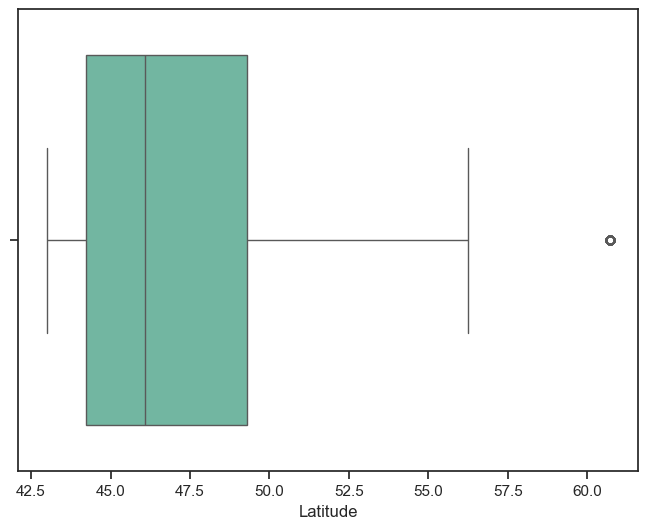

In [ ]:
sns.boxplot(x=CustomerDB['Latitude'])
plt.show()

In [ ]:
Q1 = CustomerDB['Latitude'].quantile(0.25)
Q3 = CustomerDB['Latitude'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_latitude = CustomerDB[(CustomerDB['Latitude'] < lower_bound) | (CustomerDB['Latitude'] > upper_bound)]

print("Outlier boundaries:")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

print("\nOutlier rows:")
print(outliers_latitude[['Latitude']])

count = outliers_latitude.shape[0]
print(f"\nTotal number of outliers in Latitude: {count}")


Outlier boundaries:
Lower bound: 36.65383250000001
Upper bound: 56.8600685

Outlier rows:
        Latitude
5      60.721188
394    60.721188
397    60.721188
499    60.721188
648    60.721188
...          ...
16021  60.721188
16029  60.721188
16161  60.721188
16215  60.721188
16507  60.721188

[112 rows x 1 columns]

Total number of outliers in Latitude: 112


In [ ]:
outliers_latitude.head(10).sort_values(by='Loyalty#')

Loyalty# First Name Last Name      Customer Name Country  \
648     121935      Lesia   Droesch      Lesia Droesch  Canada   
5       193662   Leatrice    Hanlin    Leatrice Hanlin  Canada   
394     211043       Ngoc  Naughton      Ngoc Naughton  Canada   
499     304944    Seymour   Sheerin    Seymour Sheerin  Canada   
809     399575        Amy  Bradigan       Amy Bradigan  Canada   
944     508115     Agatha    Gilden      Agatha Gilden  Canada   
397     517758     Golden      Maag        Golden Maag  Canada   
935     526064   Meredith  Adriance  Meredith Adriance  Canada   
1311    601131       Olga   Tamblyn       Olga Tamblyn  Canada   
1247    621750     Norris     Louro       Norris Louro  Canada   

     Province or State        City   Latitude  Longitude Postal code  Gender  \
648              Yukon  Whitehorse  60.721188 -135.05684     Y2K 6R0  Female   
5                Yukon  Whitehorse  60.721188 -135.05684     Y2K 6R0    Male   
394              Yukon  Whitehorse  60.721188 -135.05684     Y2K 6R0  Female   
499              Yukon  Whitehorse  60.721188 -135.05684     Y2K 6R0  Female   
809              Yukon  Whitehorse  60.721188 -135.05684     Y2K 6R0    Male   
944              Yukon  Whitehorse  60.721188 -135.05684     Y2K 6R0    Male   
397              Yukon  Whitehorse  60.721188 -135.05684     Y2K 6R0    Male   
935              Yukon  Whitehorse  60.721188 -135.05684     Y2K 6R0    Male   
1311             Yukon  Whitehorse  60.721188 -135.05684     Y2K 6R0  Female   
1247             Yukon  Whitehorse  60.721188 -135.05684     Y2K 6R0  Female   

     Education Location Code   Income Marital Status LoyaltyStatus  \
648     Doctor      Suburban  29950.0        Married          Star   
5     Bachelor         Rural  26262.0        Married          Star   
394    College         Urban      0.0         Single          Star   
499    College         Rural      0.0         Single          Star   
809   Bachelor         Rural  68331.0        Married        Aurora   
944   Bachelor         Rural  97131.0        Married        Aurora   
397     Doctor         Urban  27538.0       Divorced          Star   
935   Bachelor      Suburban  88081.0        Married        Aurora   
1311    Doctor      Suburban  19724.0        Married        Aurora   
1247  Bachelor         Rural  75963.0       Divorced        Aurora   

     EnrollmentDateOpening CancellationDate  Customer Lifetime Value  \
648             2018-10-19              NaT                  4878.83   
5               2015-05-07              NaT                  3844.57   
394             2015-07-09              NaT                  4566.12   
499             2017-01-04              NaT                  4703.72   
809             2019-03-23              NaT                  5033.39   
944             2020-03-04              NaT                  5181.62   
397             2015-12-07              NaT                  4570.67   
935             2021-05-22              NaT                  5174.08   
1311            2019-02-11              NaT                  5584.96   
1247            2017-07-31              NaT                  5515.25   

      EnrollmentType  
648   2021 Promotion  
5           Standard  
394         Standard  
499         Standard  
809         Standard  
944         Standard  
397         Standard  
935         Standard  
1311        Standard  
1247        Standard

The latitude outliers identified in the dataset correspond to customers located in Whitehorse, Yukon (Latitude ≈ 60.72°). While they appear as statistical outliers due to their northern position relative to most customers, they are valid and meaningful records that reflect real business presence in northern regions.

Therefore, we have decided to retain these entries in the dataset. 

## Customer Lifetime Value

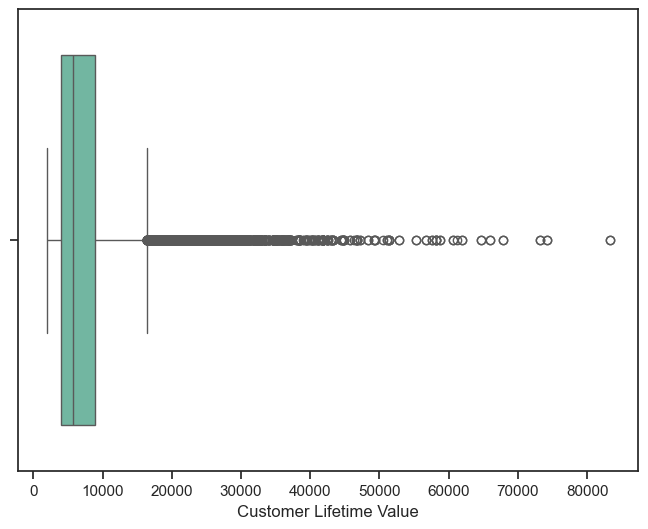

In [ ]:
sns.boxplot(x=CustomerDB['Customer Lifetime Value'])
plt.show()

In [ ]:
Q1 = CustomerDB['Customer Lifetime Value'].quantile(0.25)
Q3 = CustomerDB['Customer Lifetime Value'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_CLV = CustomerDB[(CustomerDB['Customer Lifetime Value'] < lower_bound) | (CustomerDB['Customer Lifetime Value'] > upper_bound)].sort_values(by='Customer Lifetime Value', ascending=False)

print("Outlier boundaries:")
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

print("\nOutlier rows:")
print(outliers_CLV[['Customer Lifetime Value']])

count = outliers_CLV.shape[0]
print(f"\nTotal number of outliers in CLV: {count}")


Outlier boundaries:
Lower bound: -3469.235000000002
Upper bound: 16394.645000000004

Outlier rows:
       Customer Lifetime Value
16900                 83325.38
16899                 83325.38
16898                 74228.52
9884                  74228.52
4162                  73225.96
...                        ...
3686                  16464.37
9391                  16460.08
16373                 16414.04
9390                  16407.66
3685                  16407.66

[1501 rows x 1 columns]

Total number of outliers in CLV: 1501


In [ ]:
outliers_CLV.head(10)

Loyalty# First Name  Last Name    Customer Name Country  \
16900    652627     Ariane     Peyton    Ariane Peyton  Canada   
16899    615459     Dannie     Paplow    Dannie Paplow  Canada   
16898    776187     Janina       Lumb      Janina Lumb  Canada   
9884     844145    Tabitha    Simonds  Tabitha Simonds  Canada   
4162     767366      Alana  Sullinger  Alana Sullinger  Canada   
4161     592003     Cletus      Chafe     Cletus Chafe  Canada   
16897    680886      Jamee       Ahlm       Jamee Ahlm  Canada   
4160     838263    Delaine     Sitaca   Delaine Sitaca  Canada   
9883     495253      Petra       Rieu       Petra Rieu  Canada   
4159     179870       Inge      Brunn       Inge Brunn  Canada   

      Province or State         City   Latitude   Longitude Postal code  \
16900          Manitoba     Winnipeg  49.895138  -97.138374     R2C 0M5   
16899            Quebec     Montreal  45.501690  -73.567253     H2Y 4R4   
16898  British Columbia    Vancouver  49.282730 -123.120740     V5R 1W3   
9884            Ontario      Toronto  43.653225  -79.383186     P1J 8T7   
4162             Quebec     Montreal  45.501690  -73.567253     H4G 3T4   
4161      New Brunswick  Fredericton  45.963589  -66.643112     E3B 2H2   
16897      Saskatchewan       Regina  50.445210 -104.618900     S1J 3C5   
4160        Nova Scotia      Halifax  44.648766  -63.575237     B3J 9S2   
9883   British Columbia     Whistler  50.116322 -122.957360     V6T 1Y8   
4159             Quebec     Montreal  45.501690  -73.567253     H2Y 2W2   

       Gender Education Location Code   Income Marital Status LoyaltyStatus  \
16900  Female  Bachelor      Suburban  58958.0        Married          Star   
16899    Male  Bachelor         Urban  58958.0        Married          Star   
16898    Male   College         Urban      0.0         Single          Star   
9884   Female   College         Urban      0.0         Single          Nova   
4162   Female  Bachelor         Rural  39547.0        Married        Aurora   
4161     Male  Bachelor         Urban  39547.0        Married        Aurora   
16897  Female  Bachelor         Rural  78310.0        Married          Star   
4160     Male  Bachelor         Rural  78310.0        Married        Aurora   
9883     Male  Bachelor         Rural  33481.0         Single          Nova   
4159   Female  Bachelor         Rural  33481.0         Single        Aurora   

      EnrollmentDateOpening CancellationDate  Customer Lifetime Value  \
16900            2018-12-03       2019-08-03                 83325.38   
16899            2021-04-22       2021-12-22                 83325.38   
16898            2017-03-24              NaT                 74228.52   
9884             2018-09-09       2019-04-07                 74228.52   
4162             2020-03-21       2020-11-21                 73225.96   
4161             2021-03-11              NaT                 73225.96   
16897            2017-09-06              NaT                 67907.27   
4160             2015-07-25              NaT                 67907.27   
9883             2018-04-08              NaT                 66025.75   
4159             2020-07-02              NaT                 66025.75   

       EnrollmentType  
16900        Standard  
16899  2021 Promotion  
16898        Standard  
9884         Standard  
4162         Standard  
4161   2021 Promotion  
16897        Standard  
4160         Standard  
9883         Standard  
4159         Standard

We will take a more deep look beyond of this outliers, since by this heading we cannot yet conclude anything.

For this problem we can do one of three things:
- log transformation
- standard scaling
- min max scaling

## Bivariate and Multivariate Analysis

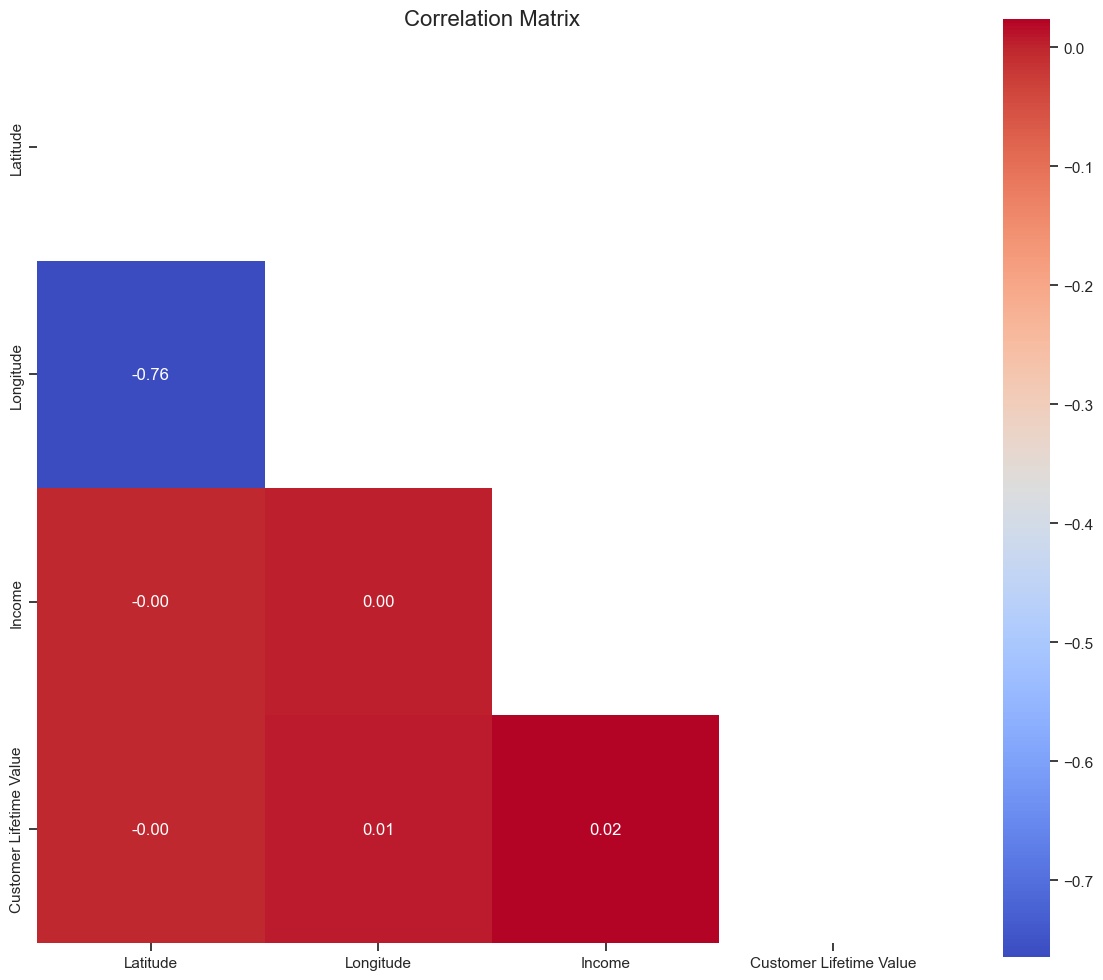

In [ ]:
corr_matrix = CustomerDB[numeric_cols_filtered].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
corr_matrix.head()

Latitude  Longitude    Income  \
Latitude                 1.000000  -0.764840 -0.002009   
Longitude               -0.764840   1.000000  0.002928   
Income                  -0.002009   0.002928  1.000000   
Customer Lifetime Value -0.002207   0.006218  0.024026   

                         Customer Lifetime Value  
Latitude                               -0.002207  
Longitude                               0.006218  
Income                                  0.024026  
Customer Lifetime Value                 1.000000

Strong negative correlation between Latitude and Longitude → as Latitude increases, Longitude tends to decrease (or vice versa)

Makes sense geographically if customers are concentrated in a specific region.

No significant linear relationship between location and income or CLV.

Suggests other factors (like number of flights, engagement, loyalty) likely drive CLV more.

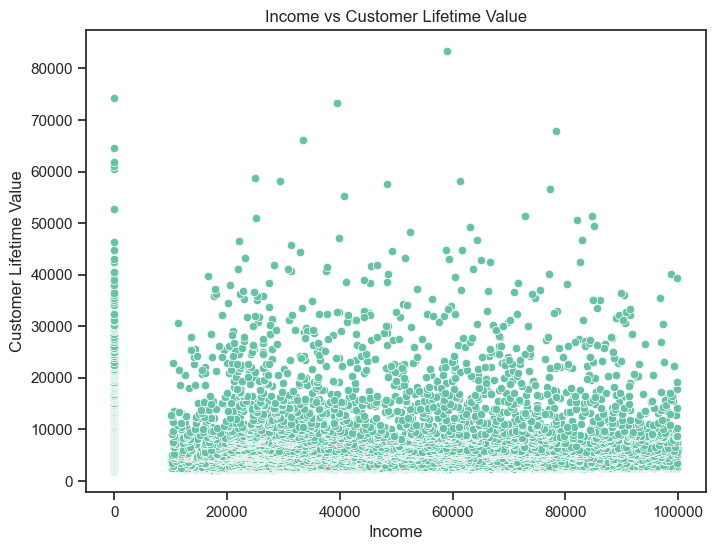

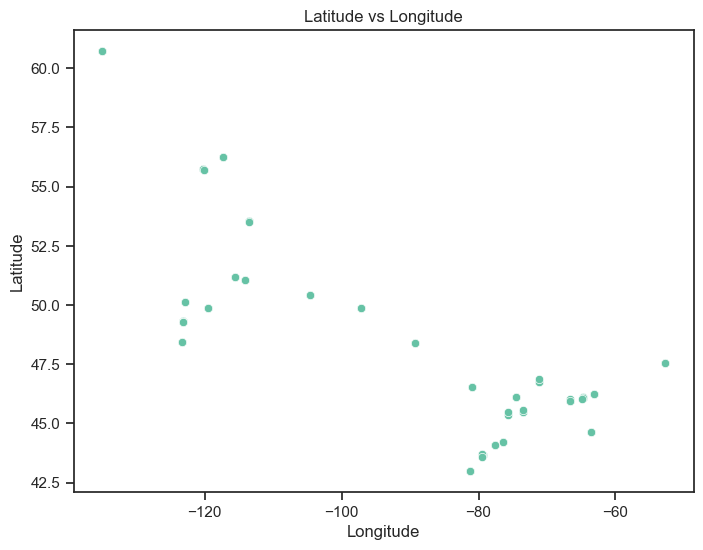

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=CustomerDB, x='Income', y='Customer Lifetime Value')
plt.title('Income vs Customer Lifetime Value')
plt.xlabel('Income')
plt.ylabel('Customer Lifetime Value')
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(data=CustomerDB, x='Longitude', y='Latitude')
plt.title('Latitude vs Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


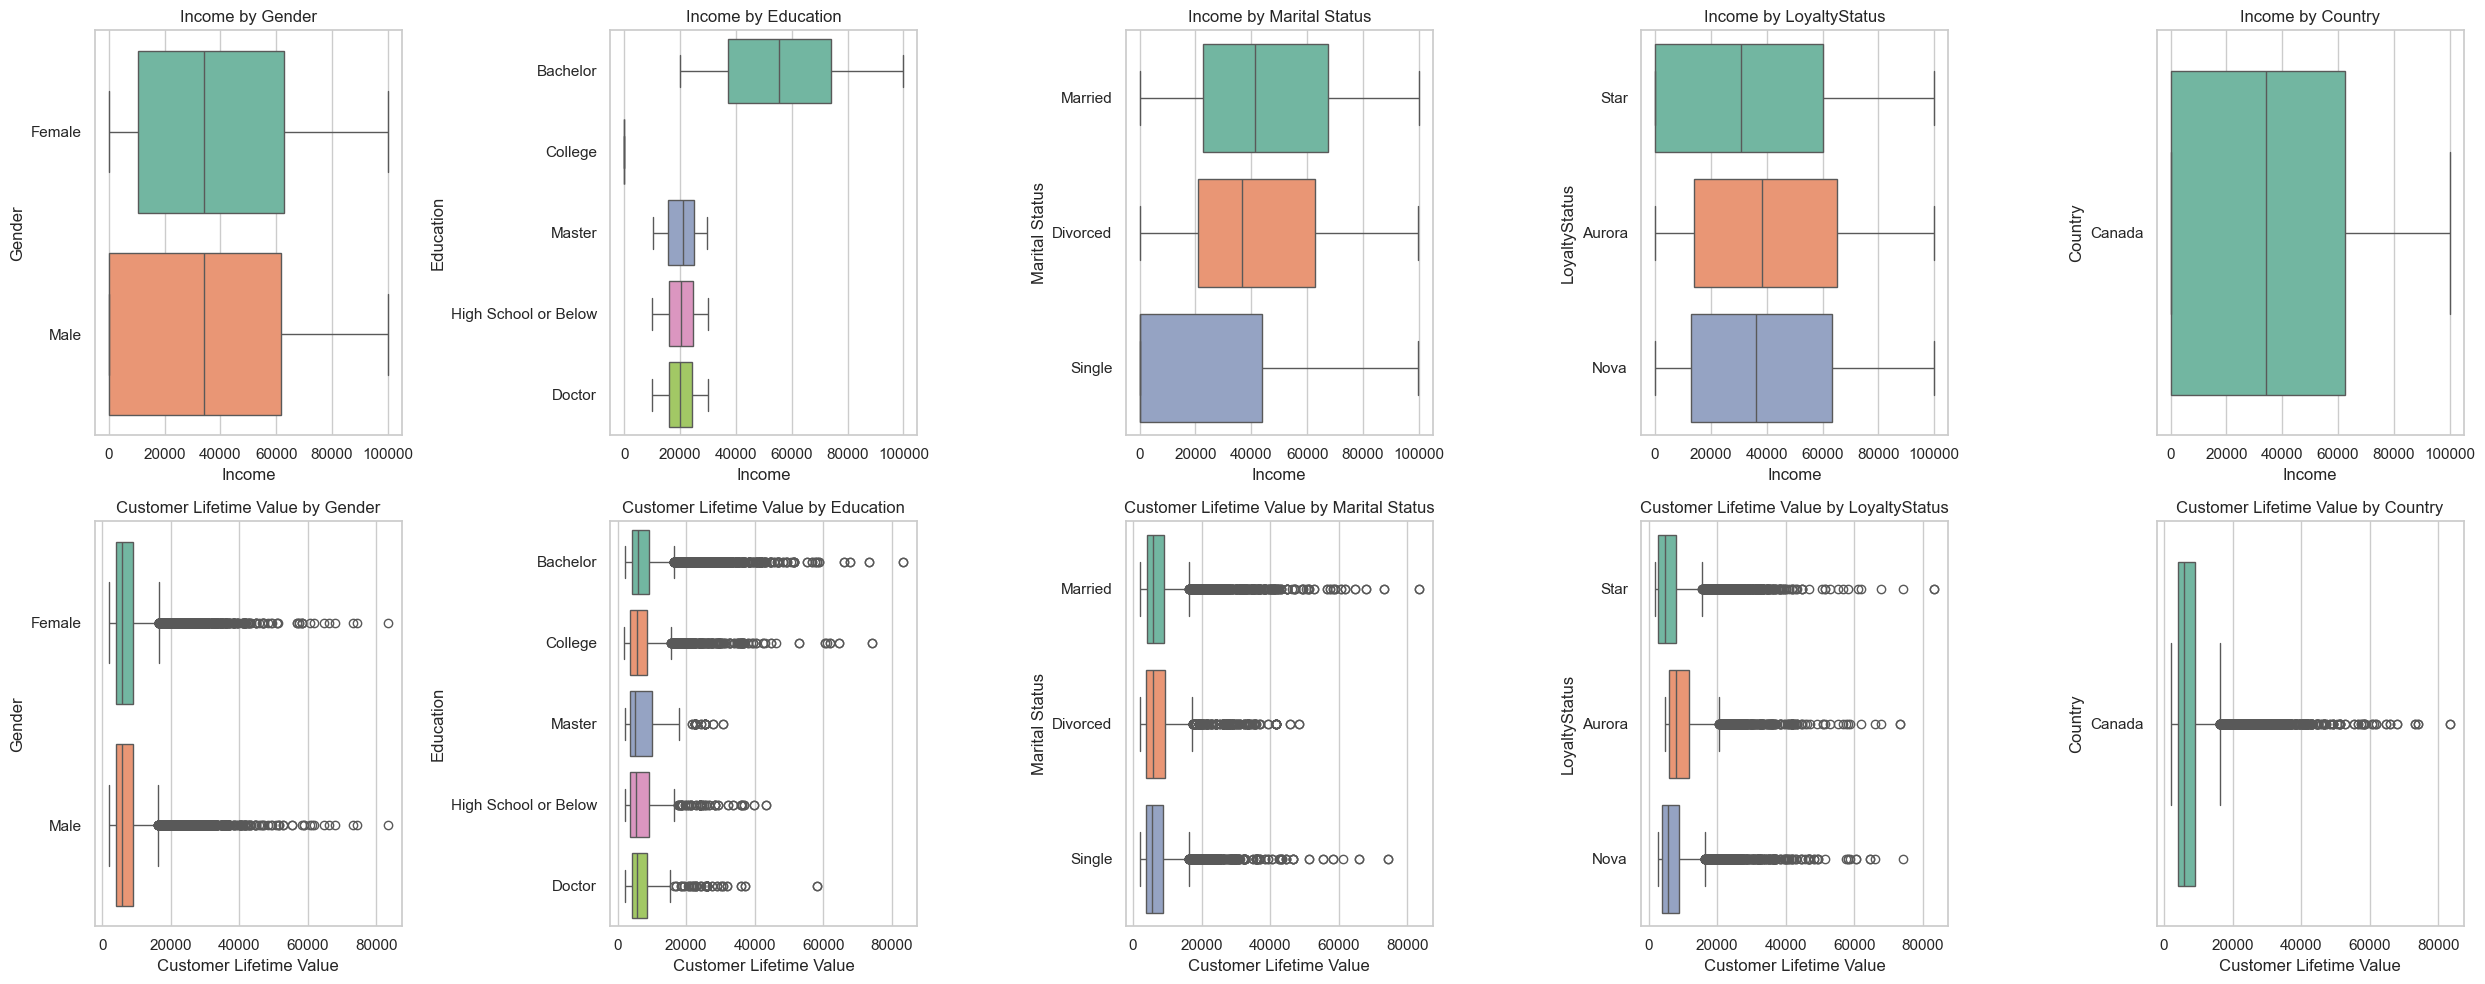

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

num_cols = ['Income', 'Customer Lifetime Value']
cat_cols = ['Gender', 'Education', 'Marital Status', 'LoyaltyStatus', 'Country']

# Determine grid size
n_rows = len(num_cols)
n_cols = len(cat_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))

for i, num in enumerate(num_cols):
    for j, cat in enumerate(cat_cols):
        ax = axes[i, j]
        sns.boxplot(
            x=num, 
            y=cat, 
            hue=cat,          # avoids palette warning
            data=CustomerDB, 
            ax=ax, 
            palette='Set2',
            orient='h',
            dodge=False
        )
        ax.set_title(f'{num} by {cat}')
        # safely remove legend if it exists
        if ax.get_legend() is not None:
            ax.get_legend().remove()
        ax.tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

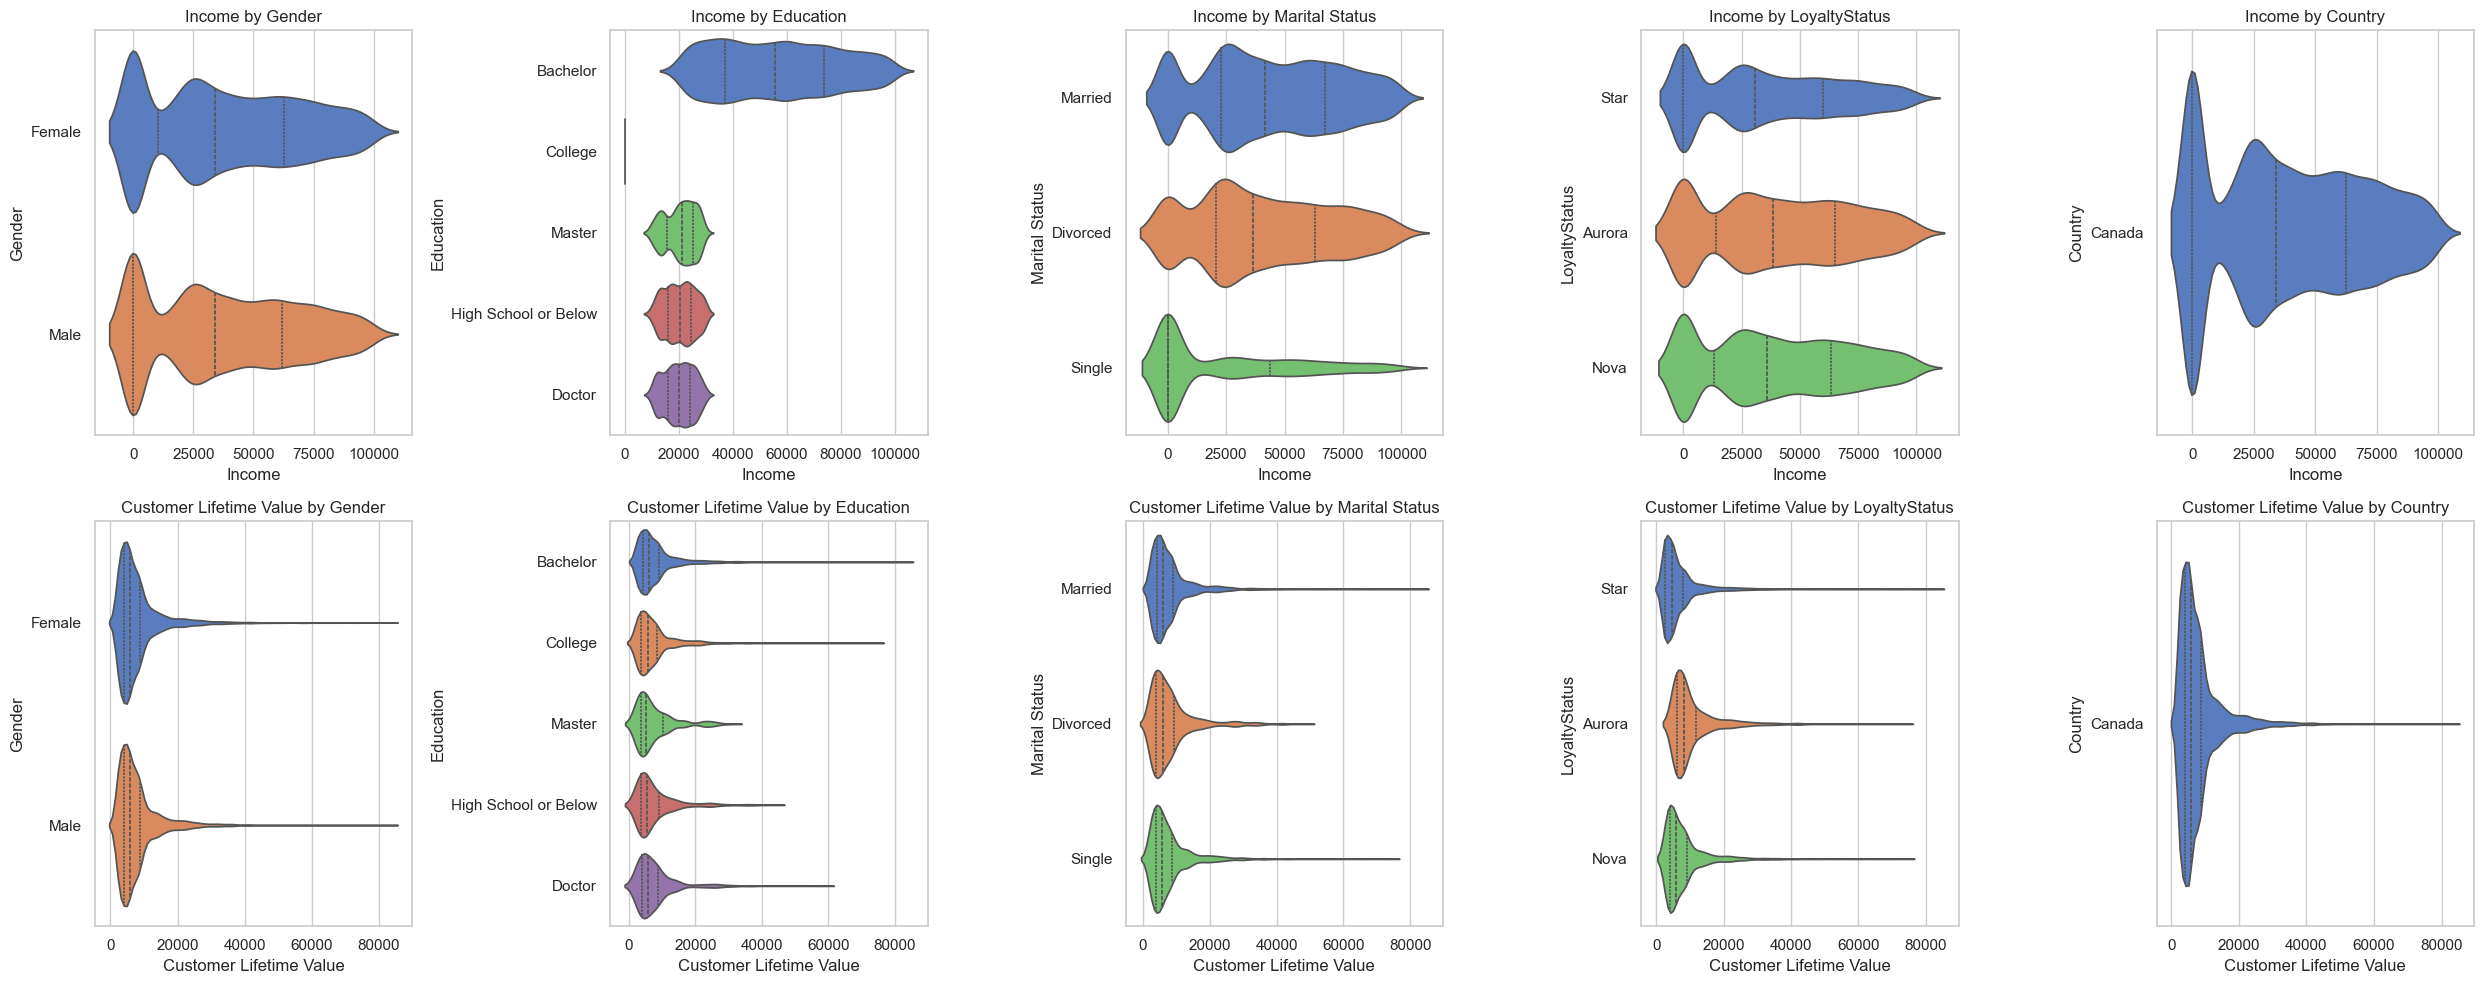

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

num_cols = ['Income', 'Customer Lifetime Value']
cat_cols = ['Gender', 'Education', 'Marital Status', 'LoyaltyStatus', 'Country']

# Determine grid size
n_rows = len(num_cols)
n_cols = len(cat_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))

for i, num in enumerate(num_cols):
    for j, cat in enumerate(cat_cols):
        ax = axes[i, j]
        sns.violinplot(
            x=num, 
            y=cat, 
            hue=cat,          # avoids palette warning
            data=CustomerDB, 
            ax=ax, 
            palette='muted', 
            orient='h',       # horizontal orientation
            dodge=False,      # avoid splitting by hue
            inner='quartile'  # show median & quartiles
        )
        ax.set_title(f'{num} by {cat}', fontsize=12)
        if ax.get_legend() is not None:
            ax.get_legend().remove()
        ax.tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

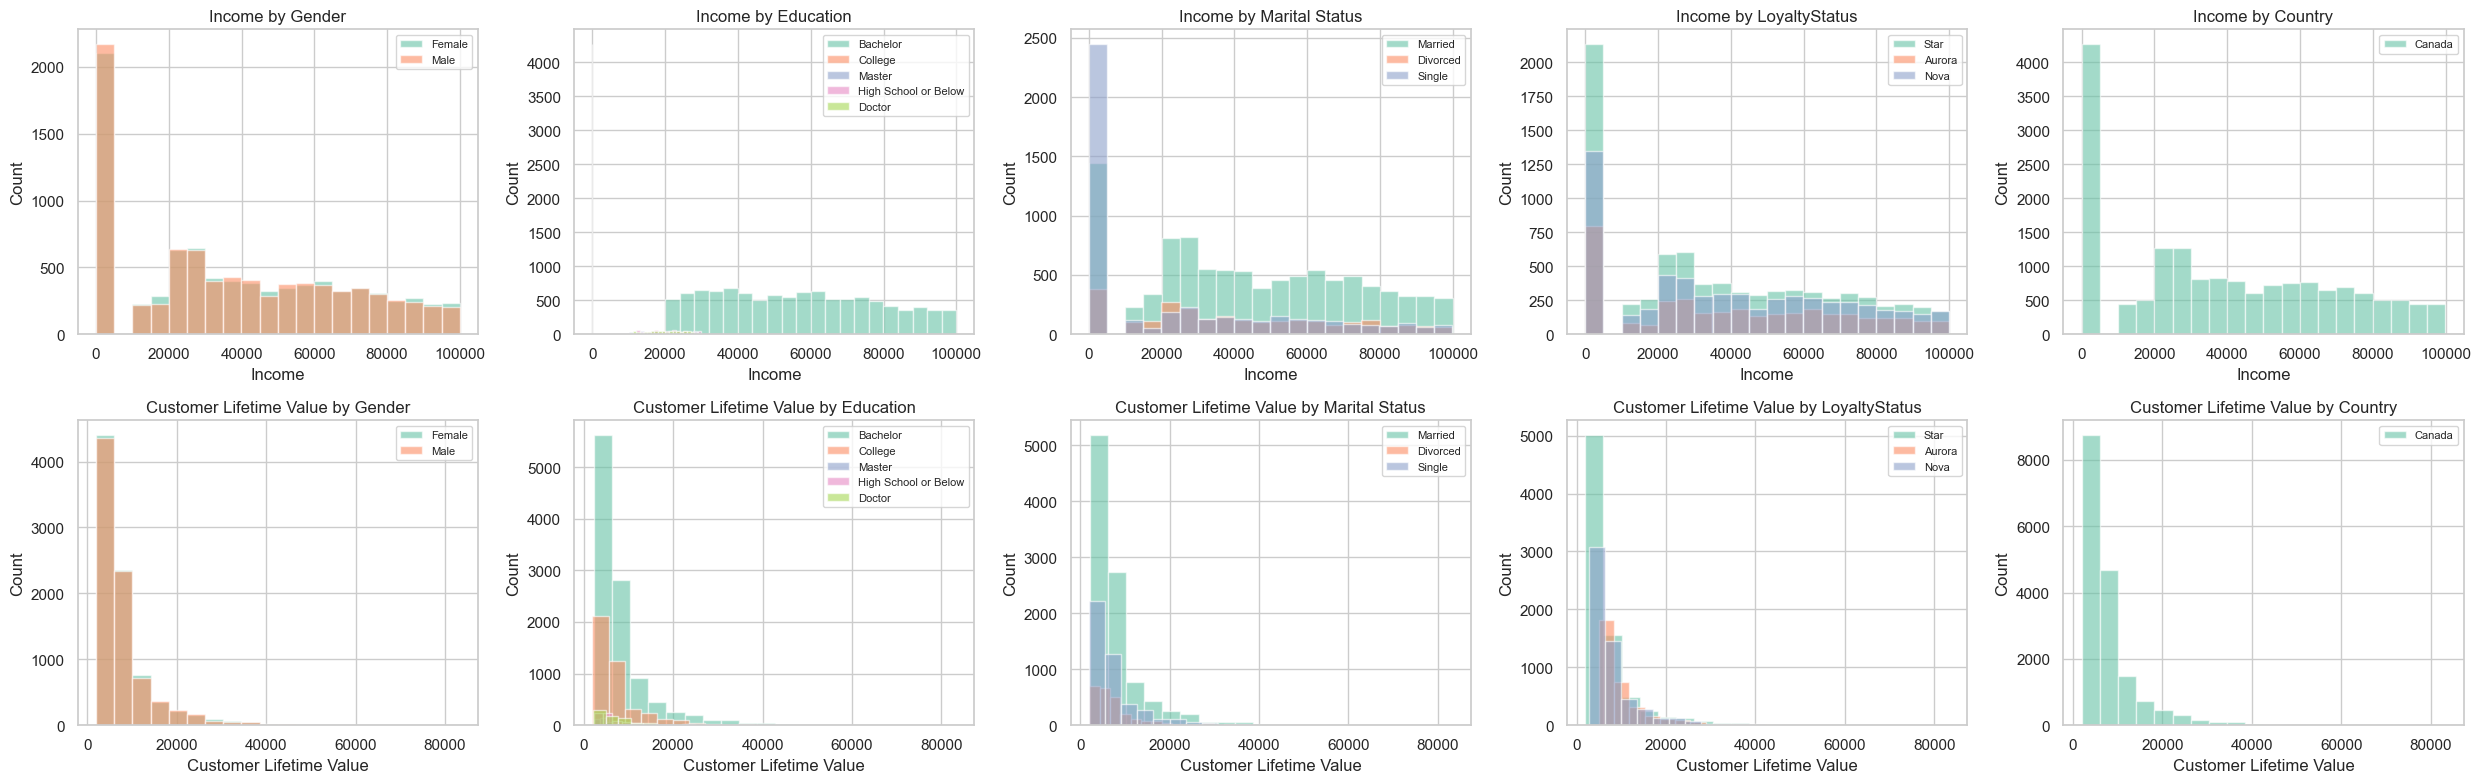

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

num_cols = ['Income', 'Customer Lifetime Value']
cat_cols = ['Gender', 'Education', 'Marital Status', 'LoyaltyStatus', 'Country']

# Grid layout
n_rows = len(num_cols)
n_cols = len(cat_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))

for i, num in enumerate(num_cols):
    for j, cat in enumerate(cat_cols):
        ax = axes[i, j]
        categories = CustomerDB[cat].dropna().unique()
        for c in categories:
            subset = CustomerDB[CustomerDB[cat] == c]
            ax.hist(subset[num], bins=20, alpha=0.6, label=str(c))
        ax.set_title(f'{num} by {cat}', fontsize=12)
        ax.set_xlabel(num)
        ax.set_ylabel('Count')
        ax.legend(fontsize=8)

plt.tight_layout()
plt.show()

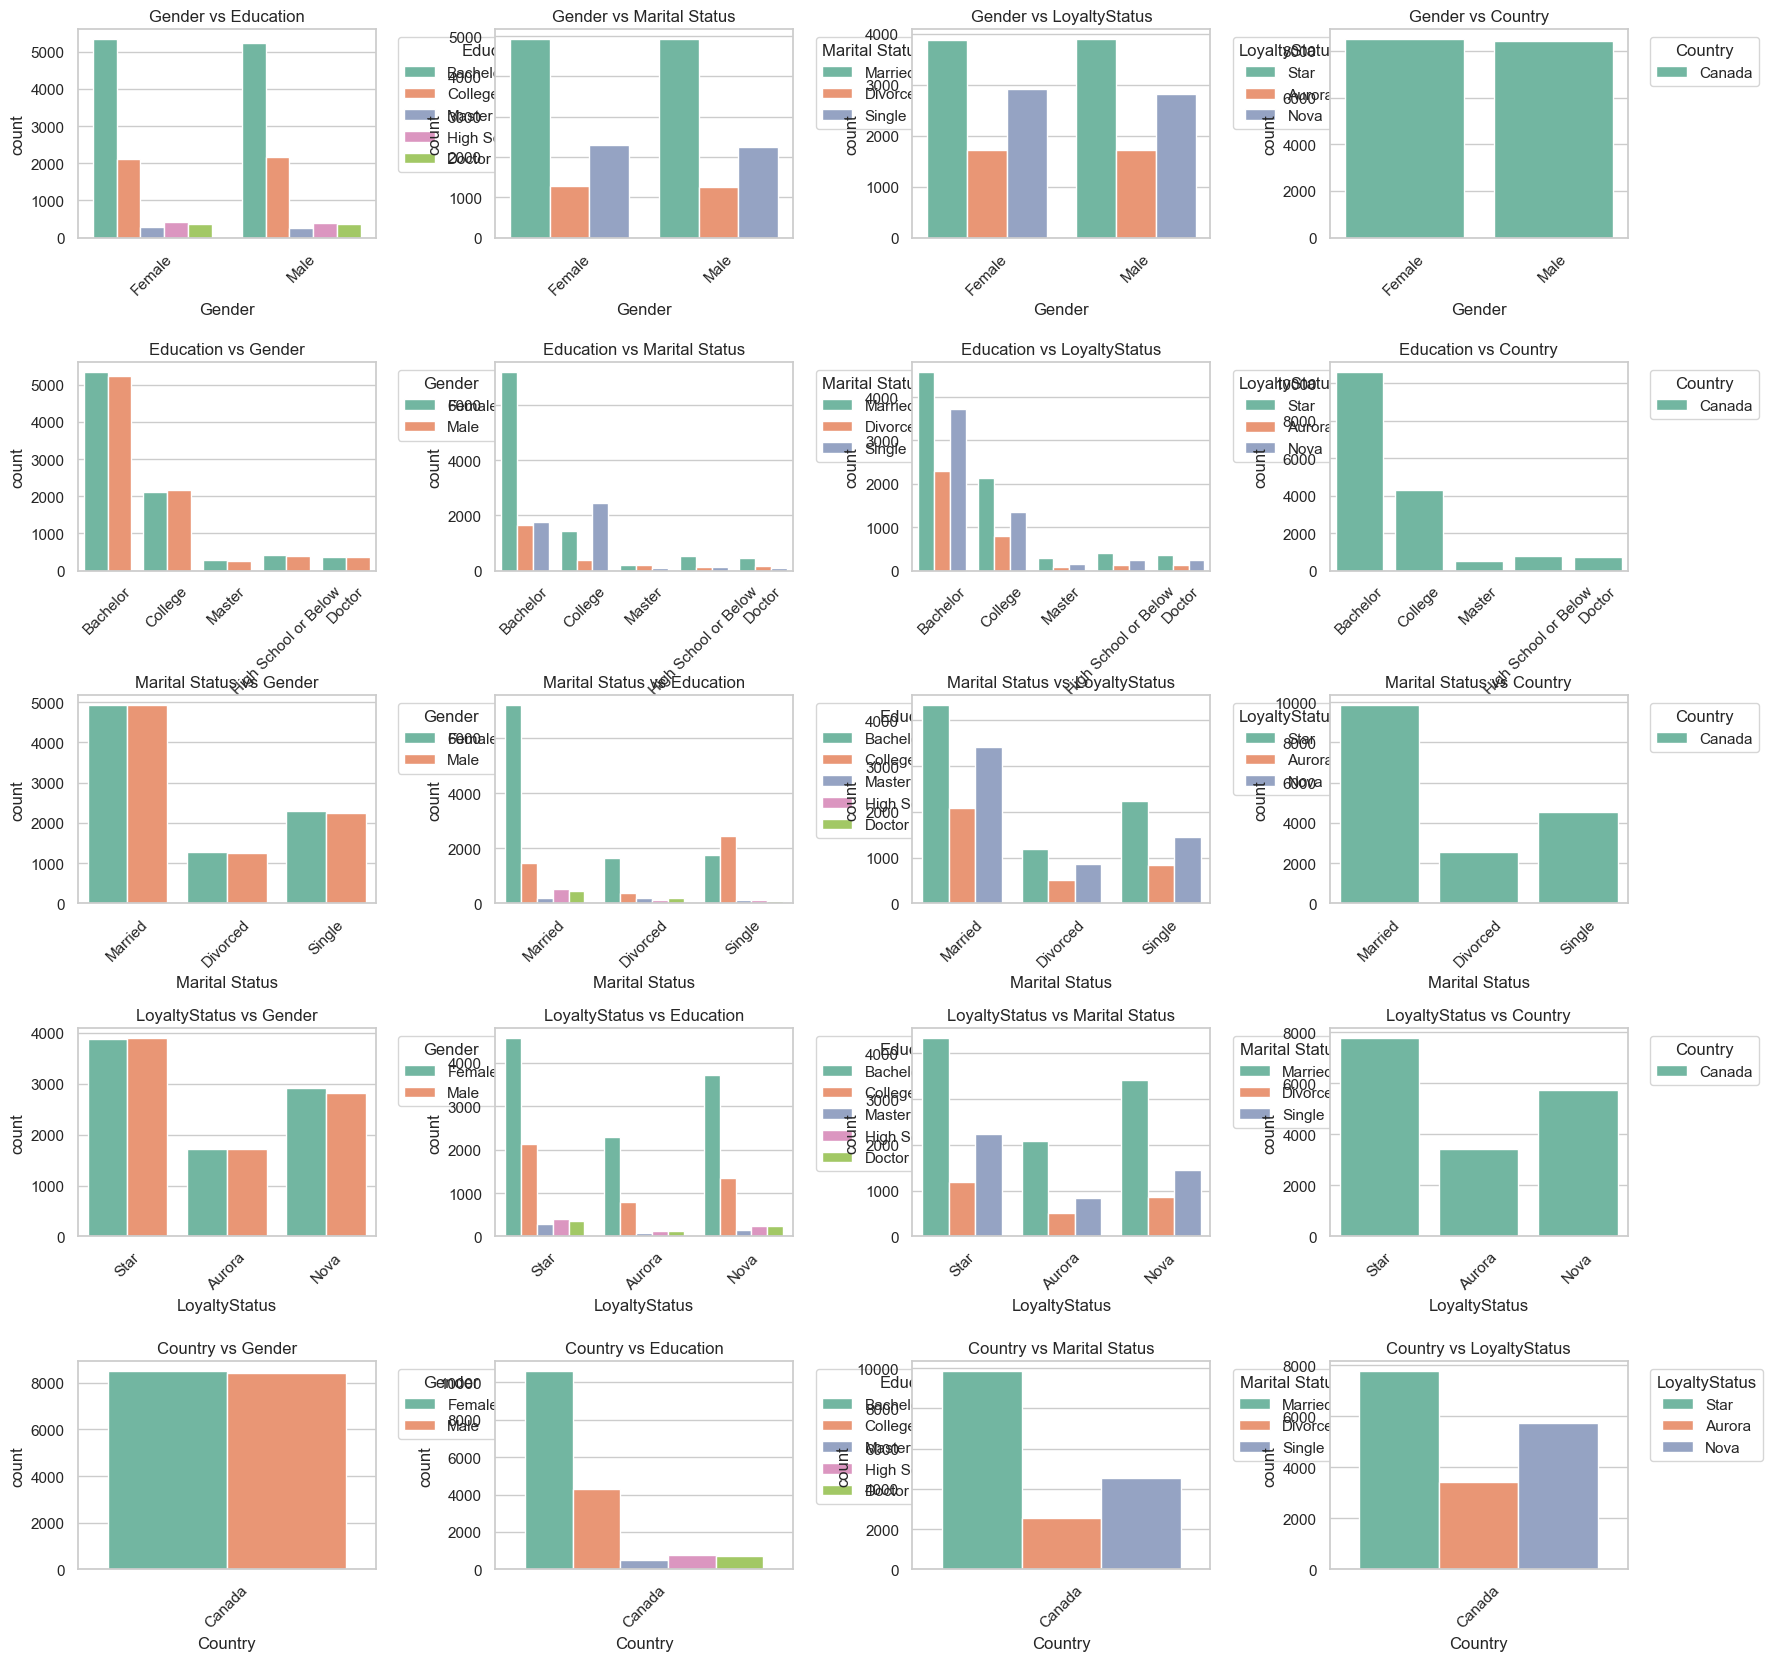

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

sns.set_style('whitegrid')

cat_cols = ['Gender', 'Education', 'Marital Status', 'LoyaltyStatus', 'Country']

# Total plots: all pairs except same variable
total_plots = len(cat_cols) * (len(cat_cols) - 1)

# Define grid size
n_cols = 4  # you can adjust
n_rows = math.ceil(total_plots / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

plot_idx = 0
for i, cat1 in enumerate(cat_cols):
    for j, cat2 in enumerate(cat_cols):
        if cat1 == cat2:
            continue
        ax = axes[plot_idx]
        sns.countplot(
            data=CustomerDB, 
            x=cat1, 
            hue=cat2, 
            palette='Set2', 
            ax=ax
        )
        ax.set_title(f'{cat1} vs {cat2}', fontsize=12)
        ax.tick_params(axis='x', rotation=45)
        ax.legend(title=cat2, bbox_to_anchor=(1.05, 1), loc='upper left')
        plot_idx += 1

# Hide any unused subplots
for k in range(plot_idx, len(axes)):
    fig.delaxes(axes[k])

# Adjust spacing
plt.subplots_adjust(hspace=0.6, wspace=0.4)
plt.show()


## FlightsDB

### Numerical Features

In [ ]:
numerical_columns_Flights = FlightsDB.select_dtypes(include=['number']).columns.tolist()

# Remove 'Loyalty#' from the list if it exists
numerical_columns_Flights = [col for col in numerical_columns_Flights if col != 'Loyalty#']

# Print unique values for each numeric column
for col in numerical_columns_Flights:
    print(f'{col}: {FlightsDB[col].unique()}')


Year: [2021 2020 2019]
Month: [12  6  5  4  3  2  1 11 10  9  8  7]
NumFlights: [ 2  0 10 16  9 12 17  6 11  7  3 13 14  8  5  4  1 15 18 20 19 21]
NumFlightsWithCompanions: [ 2  0  3  4  7  9  5  6  1  8 10 11]
DistanceKM: [ 9384.      0.  14745.  ... 11732.4 31998.6 26789.4]
PointsAccumulated: [ 938    0 1474 ... 4107   23   21]
PointsRedeemed: [   0 3213 4638 ... 5691 4598 5527]
DollarCostPointsRedeemed: [ 0.  32.  46.  40.  51.  62.  48.  50.  59.  43.  37.  41.  53.  56.
 31.  30.  63.  33.  44.  58.  60.  57.  36.  29.  42.  54.  45.  35.
 67.  39.  65.  34.  61.  66.  38.  47.  55.  68.  69.  64.  52.  49.
 71.  72.  27.  28.  70.  25.  26.  24.  23.  21.  22.  74.  73.  32.4
 36.9 27.9 21.6 26.1 31.5 33.3 22.5 40.5 28.8 37.8 24.3 20.7 29.7 30.6
 35.1 25.2 23.4 34.2 41.4 39.6 19.8 38.7 18.9 51.3 42.3 52.2 50.4 45.9
 47.7 48.6 43.2 46.8 44.1 49.5 53.1 57.6 60.3 62.1 54.9 58.5 55.8 56.7
 63.9 61.2 64.8 59.4 65.7 66.6]


## Month

In [ ]:
# Check months are between 1 and 12
invalid_months = FlightsDB[(FlightsDB['Month'] < 1) | (FlightsDB['Month'] > 12)]
print("Invalid months (should be 1-12):")
print(invalid_months[['YearMonthDate', 'Month']])


Invalid months (should be 1-12):
Empty DataFrame
Columns: [YearMonthDate, Month]
Index: []


In [ ]:
# Check numeric columns are >= 0
numeric_cols = ['NumFlights', 'NumFlightsWithCompanions', 'DistanceKM',
                'PointsAccumulated', 'PointsRedeemed', 'DollarCostPointsRedeemed']

invalid_numeric = FlightsDB[(FlightsDB[numeric_cols] < 0).any(axis=1)]

print("\nRows with negative numeric values:")
print(invalid_numeric[['YearMonthDate'] + numeric_cols])

# Summary
if invalid_months.empty and invalid_numeric.empty:
    print("\nAll months and numeric values are valid.")
else:
    print(f"\nFound {len(invalid_months)} invalid months and {len(invalid_numeric)} rows with negative numeric values.")


Rows with negative numeric values:
Empty DataFrame
Columns: [YearMonthDate, NumFlights, NumFlightsWithCompanions, DistanceKM, PointsAccumulated, PointsRedeemed, DollarCostPointsRedeemed]
Index: []

All months and numeric values are valid.


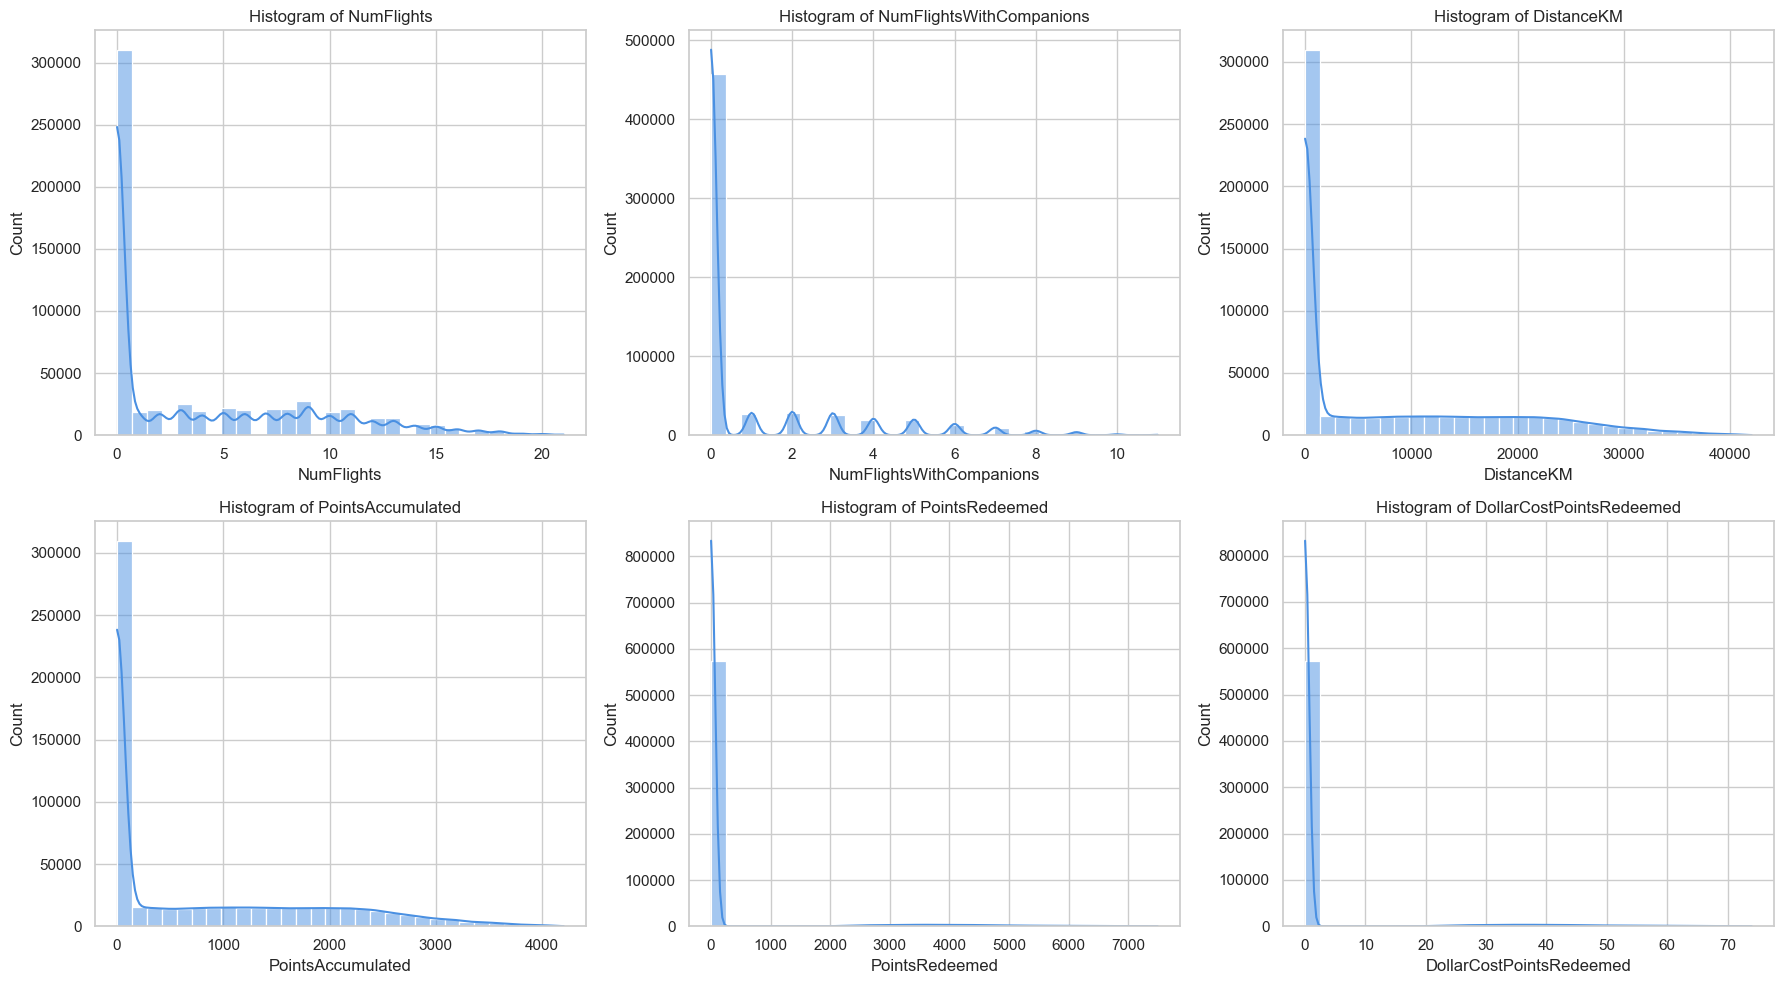

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(FlightsDB[col], bins=30, kde=True, color='#4A90E2', ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

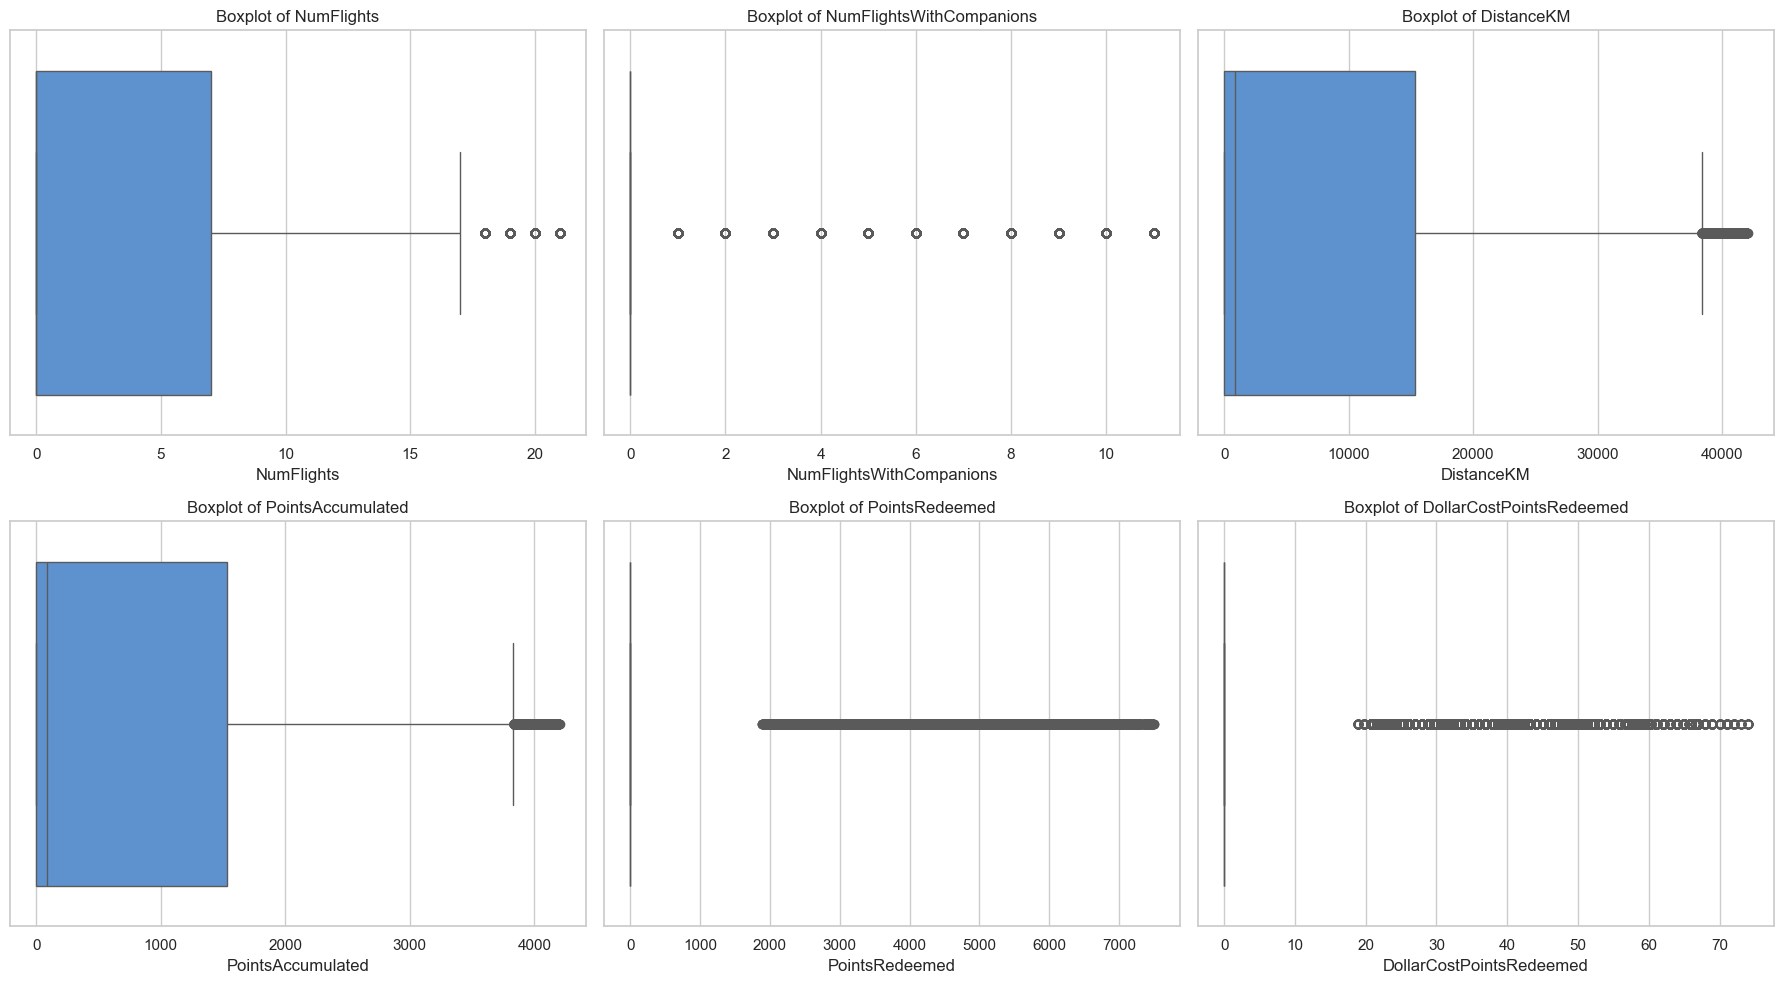

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(x=FlightsDB[col], color='#4A90E2', ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Analysing Customers Behaviour and Sazonality in FlightsDB

### Agg_Sum

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Aggregate totals per customer
FlightsDB=FlightsDB.copy()

agg_sum = FlightsDB.groupby('Loyalty#').agg({
    'NumFlights': 'sum',
    'NumFlightsWithCompanions':'sum',
    'PointsAccumulated': 'sum',
    'PointsRedeemed': 'sum',
    'DistanceKM': 'sum',
    'DollarCostPointsRedeemed': 'sum'
}).reset_index()

# Rename columns
agg_sum.rename(columns={
    'NumFlights': 'TotalFlights',
    'NumFlightsWithCompanions':'TotalFlightsWithCompanion',
    'PointsAccumulated': 'TotalPointsAccumulated',
    'PointsRedeemed': 'TotalPointsRedeemed',
    'DistanceKM': 'TotalDistanceKM',
    'DollarCostPointsRedeemed': 'TotalDollarCostPointsRedeemed'
}, inplace=True)


In [ ]:
flight_counts = agg_sum['TotalFlights'].value_counts().sort_index()

flight_percentages = (flight_counts / flight_counts.sum()) * 100

freq_table = pd.DataFrame({
    'NumFlights': flight_counts.index,
    'Count': flight_counts.values,
    'Percentage': flight_percentages.values
})

freq_table_sorted = freq_table.sort_values(by='Percentage', ascending=False)

freq_table_sorted.head()

NumFlights  Count  Percentage
0             0   1501    8.968154
187         187    117    0.699050
206         206    116    0.693075
193         193    115    0.687100
181         181    114    0.681126

In [ ]:
# Ratio of points redeemed vs points accumulated
agg_sum['PointsRedeemedRatio'] = agg_sum['TotalPointsRedeemed'] / agg_sum['TotalPointsAccumulated']

# Ratio of flights with companions vs total flights
agg_sum['FlightsWithCompanionsRatio'] = agg_sum['TotalFlightsWithCompanion'] / agg_sum['TotalFlights']

# Average distance per flight
agg_sum['AvgDistancePerFlight'] = np.where(
    agg_sum['TotalFlights'] == 0,
    np.nan,
    agg_sum['TotalDistanceKM'] / agg_sum['TotalFlights']
)

# Average points accumulated per flight
agg_sum['AvgPointsPerFlight'] = np.where(
    agg_sum['TotalFlights'] == 0,
    np.nan,
    agg_sum['TotalPointsAccumulated'] / agg_sum['TotalFlights']
)

# Average points redeemed per flight
agg_sum['AvgPointsRedeemedPerFlight'] = np.where(
    agg_sum['TotalFlights'] == 0,
    np.nan,
    agg_sum['TotalPointsRedeemed'] / agg_sum['TotalFlights']
)



- On average, a customer took 139 flights in the period. Some customers never flew, while top customers flew 529 times.
- Only 24% of flights are with companions. The top ones flew 140 times with companions.
- Customers accumulate points roughly proportional to flights.
- Average customer flies 288 km total. Maximum is over 1 million km - extremely high distance travelers.
- On avg, customers reddem 29% of points earned. Max > 1 indicates some customers redeemed more points than they earned - likely due to bonus points or adjustments.
- Most customers fly 2000km per flight on avg. Max is 42857 km indicates an outlier.


Now let's go to mean

In [ ]:
import pandas as pd

FlightsDB = FlightsDB.copy()
agg_mean = FlightsDB.groupby('Loyalty#').agg({
    'NumFlights': 'mean',                  
    'NumFlightsWithCompanions': 'mean',    
    'PointsAccumulated': 'mean',            
    'PointsRedeemed': 'mean',               
    'DollarCostPointsRedeemed': 'mean',     
    'DistanceKM': 'mean'                    
}).reset_index()


agg_mean.rename(columns={
    'NumFlights': 'AvgMonthlyFlights',
    'NumFlightsWithCompanions': 'AvgFlightsWithCompanions',
    'PointsAccumulated': 'AvgPointsAccumulated',
    'PointsRedeemed': 'AvgPointsRedeemed',
    'DollarCostPointsRedeemed': 'AvgDollarCostPointsRedeemed',
    'DistanceKM': 'AvgDistanceKM'
}, inplace=True)

max_flights = agg_mean['AvgMonthlyFlights'].max()

bins = [0, 1, 3, 5, 10, max_flights+1]
labels = ['0-1', '1-3', '3-5', '5-10', '10+']

agg_mean['FlightRange'] = pd.cut(
    agg_mean['AvgMonthlyFlights'], 
    bins=bins, 
    labels=labels, 
    right=False
)

flight_range_counts = agg_mean['FlightRange'].value_counts().sort_index()

flight_range_percent = (flight_range_counts / flight_range_counts.sum()) * 100

flight_summary = pd.DataFrame({
    'FlightRange': flight_range_counts.index,
    'NumberOfCustomers': flight_range_counts.values,
    'Percentage': flight_range_percent.values
})

print(flight_summary)



  FlightRange  NumberOfCustomers  Percentage
0         0-1               2838   16.956444
1         1-3               2519   15.050487
2         3-5               5141   30.716377
3        5-10               6239   37.276692
4         10+                  0    0.000000


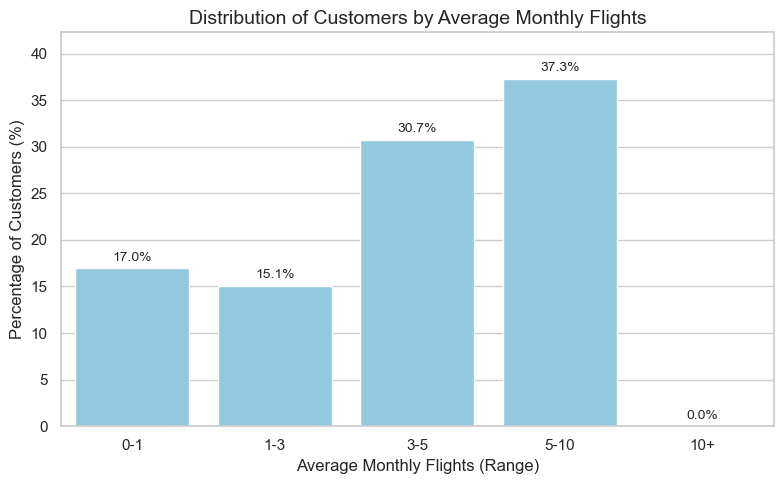

In [ ]:
sns.set(style='whitegrid')

plt.figure(figsize=(8,5))

sns.barplot(
    x='FlightRange',
    y='Percentage',
    data=flight_summary,
    color='skyblue' 
)

plt.xlabel('Average Monthly Flights (Range)', fontsize=12)
plt.ylabel('Percentage of Customers (%)', fontsize=12)
plt.title('Distribution of Customers by Average Monthly Flights', fontsize=14)
plt.ylim(0, flight_summary['Percentage'].max() + 5)  

for index, row in flight_summary.iterrows():
    plt.text(index, row['Percentage'] + 0.5, f"{row['Percentage']:.1f}%", 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [ ]:
agg_mean['AvgFlightsWithCompanions'] = pd.to_numeric(
    agg_mean['AvgFlightsWithCompanions'], errors='coerce'
).fillna(0)

max_val = agg_mean['AvgFlightsWithCompanions'].max()

bins = [0, 1, 3, 5, 10]
if max_val > 10:
    bins.append(max_val + 1) 
else:
    bins.append(11) 

labels = ['0-1', '1-3', '3-5', '5-10', '10+']

agg_mean['FlightsWithCompanionsRange'] = pd.cut(
    agg_mean['AvgFlightsWithCompanions'],
    bins=bins,
    labels=labels,
    right=False,
    include_lowest=True
)

counts = agg_mean['FlightsWithCompanionsRange'].value_counts().sort_index()

percent = (counts / counts.sum()) * 100

summary = pd.DataFrame({
    'FlightsWithCompanionsRange': counts.index,
    'NumberOfCustomers': counts.values,
    'Percentage': percent.values
})

print(summary)


  FlightsWithCompanionsRange  NumberOfCustomers  Percentage
0                        0-1               8638   51.610205
1                        1-3               8091   48.341997
2                        3-5                  8    0.047798
3                       5-10                  0    0.000000
4                        10+                  0    0.000000


In [ ]:
num_customers_with_companions = (agg_mean['AvgFlightsWithCompanions'] > 0).sum()

total_customers = agg_mean.shape[0]

percent_with_companions = (num_customers_with_companions / total_customers) * 100

print(f"{percent_with_companions:.2f}% of customers have taken at least one flight with companions.")


89.11% of customers have taken at least one flight with companions.


## New FlightsDB

In [ ]:
FlightsDB_agg = pd.merge(agg_sum, agg_mean, how='inner', on='Loyalty#')
FlightsDB_agg

Loyalty#  TotalFlights  TotalFlightsWithCompanion  \
0        100018           225                         45   
1        100102           245                         55   
2        100140           211                         51   
3        100214           108                         17   
4        100272           181                         50   
...         ...           ...                        ...   
16732    999902           261                         72   
16733    999911             0                          0   
16734    999940            84                         27   
16735    999982            22                          2   
16736    999986           181                         22   

       TotalPointsAccumulated  TotalPointsRedeemed  TotalDistanceKM  \
0                       53008                20562         530230.0   
1                       33900                18759         339114.6   
2                       43189                 4896         432030.8   
3                       36451                12907         364601.7   
4                       42949                10891         429630.5   
...                       ...                  ...              ...   
16732                   61002                10501         610159.5   
16733                       0                    0              0.0   
16734                   23855                 5620         238578.9   
16735                    5264                    0          52654.0   
16736                   34502                18049         345117.6   

       TotalDollarCostPointsRedeemed  PointsRedeemedRatio  \
0                              201.9             0.387904   
1                              186.2             0.553363   
2                               48.0             0.113362   
3                              127.3             0.354092   
4                              107.0             0.253580   
...                              ...                  ...   
16732                          103.1             0.172142   
16733                            0.0                  NaN   
16734                           56.0             0.235590   
16735                            0.0             0.000000   
16736                          177.8             0.523129   

       FlightsWithCompanionsRatio  AvgDistancePerFlight  AvgPointsPerFlight  \
0                        0.200000           2356.577778          235.591111   
1                        0.224490           1384.141224          138.367347   
2                        0.241706           2047.539336          204.687204   
3                        0.157407           3375.941667          337.509259   
4                        0.276243           2373.649171          237.287293   
...                           ...                   ...                 ...   
16732                    0.275862           2337.775862          233.724138   
16733                         NaN                   NaN                 NaN   
16734                    0.321429           2840.225000          283.988095   
16735                    0.090909           2393.363636          239.272727   
16736                    0.121547           1906.727072          190.618785   

       AvgPointsRedeemedPerFlight  AvgMonthlyFlights  \
0                       91.386667           6.250000   
1                       76.567347           6.805556   
2                       23.203791           5.861111   
3                      119.509259           3.000000   
4                       60.171271           5.027778   
...                           ...                ...   
16732                   40.233716           7.250000   
16733                         NaN           0.000000   
16734                   66.904762           2.333333   
16735                    0.000000           0.611111   
16736                   99.718232           5.027778   

       AvgFlightsWithCompanions  AvgPointsAccumulated  AvgPointsRedeemed  \
0 

In [ ]:
FlightsDB_agg.columns

Index(['Loyalty#', 'TotalFlights', 'TotalFlightsWithCompanion',
       'TotalPointsAccumulated', 'TotalPointsRedeemed', 'TotalDistanceKM',
       'TotalDollarCostPointsRedeemed', 'PointsRedeemedRatio',
       'FlightsWithCompanionsRatio', 'AvgDistancePerFlight',
       'AvgPointsPerFlight', 'AvgPointsRedeemedPerFlight', 'AvgMonthlyFlights',
       'AvgFlightsWithCompanions', 'AvgPointsAccumulated', 'AvgPointsRedeemed',
       'AvgDollarCostPointsRedeemed', 'AvgDistanceKM', 'FlightRange',
       'FlightsWithCompanionsRange'],
      dtype='object')

In [ ]:
FlightsDB_agg.describe().round(2).T

count       mean        std        min  \
Loyalty#                       16737.0  549735.88  258912.13  100018.00   
TotalFlights                   16737.0     139.13      80.36       0.00   
TotalFlightsWithCompanion      16737.0      33.89      22.65       0.00   
TotalPointsAccumulated         16737.0   28853.10   16687.04       0.00   
TotalPointsRedeemed            16737.0    8551.75    8751.40       0.00   
TotalDistanceKM                16737.0  288616.90  166916.27       0.00   
TotalDollarCostPointsRedeemed  16737.0      84.51      86.55       0.00   
PointsRedeemedRatio            15240.0       0.32       0.50       0.00   
FlightsWithCompanionsRatio     15236.0       0.25       0.12       0.00   
AvgDistancePerFlight           15236.0    2194.85    1236.87      26.68   
AvgPointsPerFlight             15236.0     219.42     123.66       2.62   
AvgPointsRedeemedPerFlight     15236.0      65.56     119.13       0.00   
AvgMonthlyFlights              16737.0       3.84       2.19       0.00   
AvgFlightsWithCompanions       16737.0       0.93       0.62       0.00   
AvgPointsAccumulated           16737.0     795.41     454.50       0.00   
AvgPointsRedeemed              16737.0     235.85     241.07       0.00   
AvgDollarCostPointsRedeemed    16737.0       2.33       2.38       0.00   
AvgDistanceKM                  16737.0    7956.48    4546.29       0.00   

                                     25%        50%        75%         max  
Loyalty#                       326603.00  550434.00  772019.00   999986.00  
TotalFlights                       70.00     159.00     199.00      529.00  
TotalFlightsWithCompanion          15.00      35.00      50.00      140.00  
TotalPointsAccumulated          14405.00   33149.00   41390.00   105942.00  
TotalPointsRedeemed                 0.00    6519.00   13607.00    57524.00  
TotalDistanceKM                144081.00  331589.40  413994.20  1059681.00  
TotalDollarCostPointsRedeemed       0.00      64.60     134.70      572.00  
PointsRedeemedRatio                 0.07       0.25       0.44       33.27  
FlightsWithCompanionsRatio          0.18       0.24       0.31        1.00  
AvgDistancePerFlight             1761.81    2072.39    2427.52    43857.70  
AvgPointsPerFlight                176.12     207.18     242.69     4385.00  
AvgPointsRedeemedPerFlight         13.94      51.61      92.42     7018.00  
AvgMonthlyFlights                   1.92       4.42       5.53        9.53  
AvgFlightsWithCompanions            0.42       0.97       1.39        3.31  
AvgPointsAccumulated              396.94     919.31    1146.58     1979.42  
AvgPointsRedeemed                   0.00     179.97     375.36     1597.89  
AvgDollarCostPointsRedeemed         0.00       1.78       3.71       15.89  
AvgDistanceKM                    3970.39    9196.01   11469.32    19798.04

In [ ]:
#Eficiência e uso de pontos
FlightsDB_agg['UnredeemedPoints'] = (
    FlightsDB_agg['TotalPointsAccumulated'] - FlightsDB_agg['TotalPointsRedeemed']
).clip(lower=0)

#Padrão de Viagem
FlightsDB_agg['KMPerRedeemedPoint'] = (
    FlightsDB_agg['TotalDistanceKM'] / FlightsDB_agg['TotalPointsRedeemed']
).replace([float('inf'), -float('inf')], 0).fillna(0)

#Indice de fidelidade, combina volume, eficiencia e frequencia
FlightsDB_agg['LoyaltyIndex'] = (
    FlightsDB_agg['AvgMonthlyFlights'] * 0.4 +
    FlightsDB_agg['AvgDistancePerFlight'] * 0.3 +
    FlightsDB_agg['PointsRedeemedRatio']*0.3
)

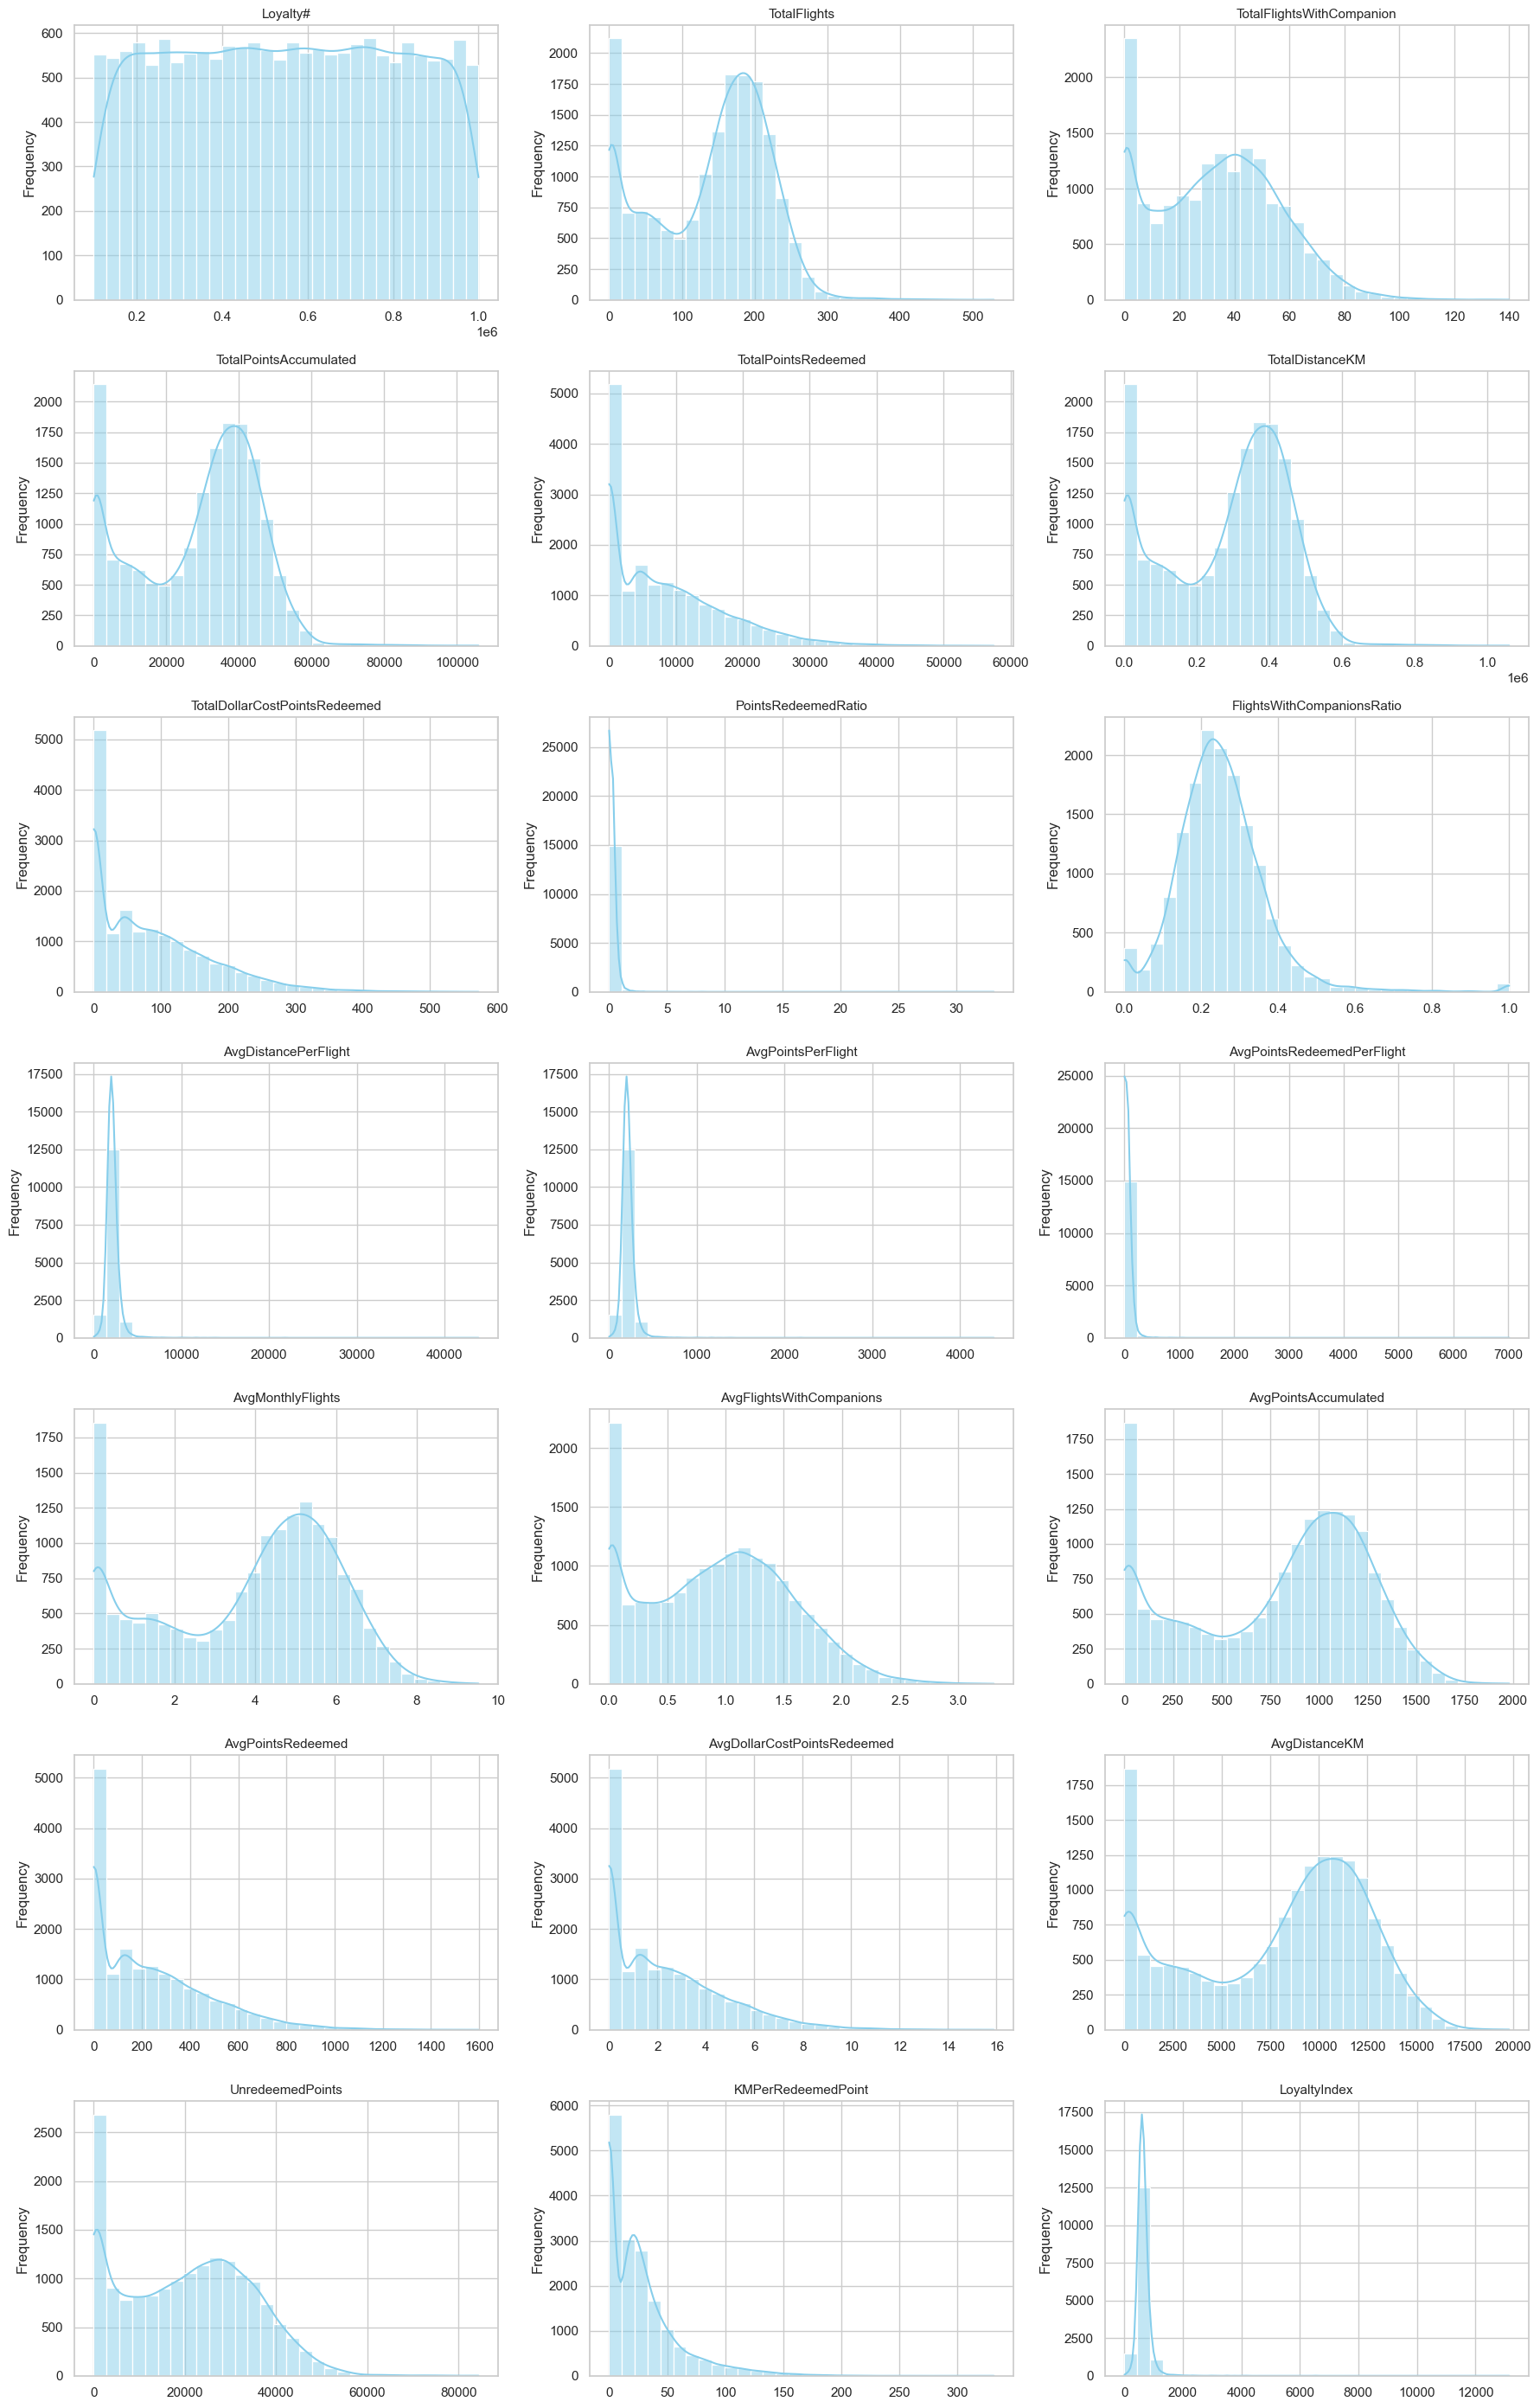

In [ ]:
import math

# Select only numeric columns
numerical_cols = FlightsDB_agg.select_dtypes(include='number').columns

# Calculate grid layout dynamically
n_metrics = len(numerical_cols)
n_cols = 3  # you can adjust this
n_rows = math.ceil(n_metrics / n_cols)

plt.figure(figsize=(18, n_rows * 4))
sns.set_style('whitegrid')

# Loop through numeric columns and plot each histogram
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(FlightsDB_agg[col], kde=True, color='skyblue', bins=30)
    plt.title(col, fontsize=11)
    plt.xlabel('')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


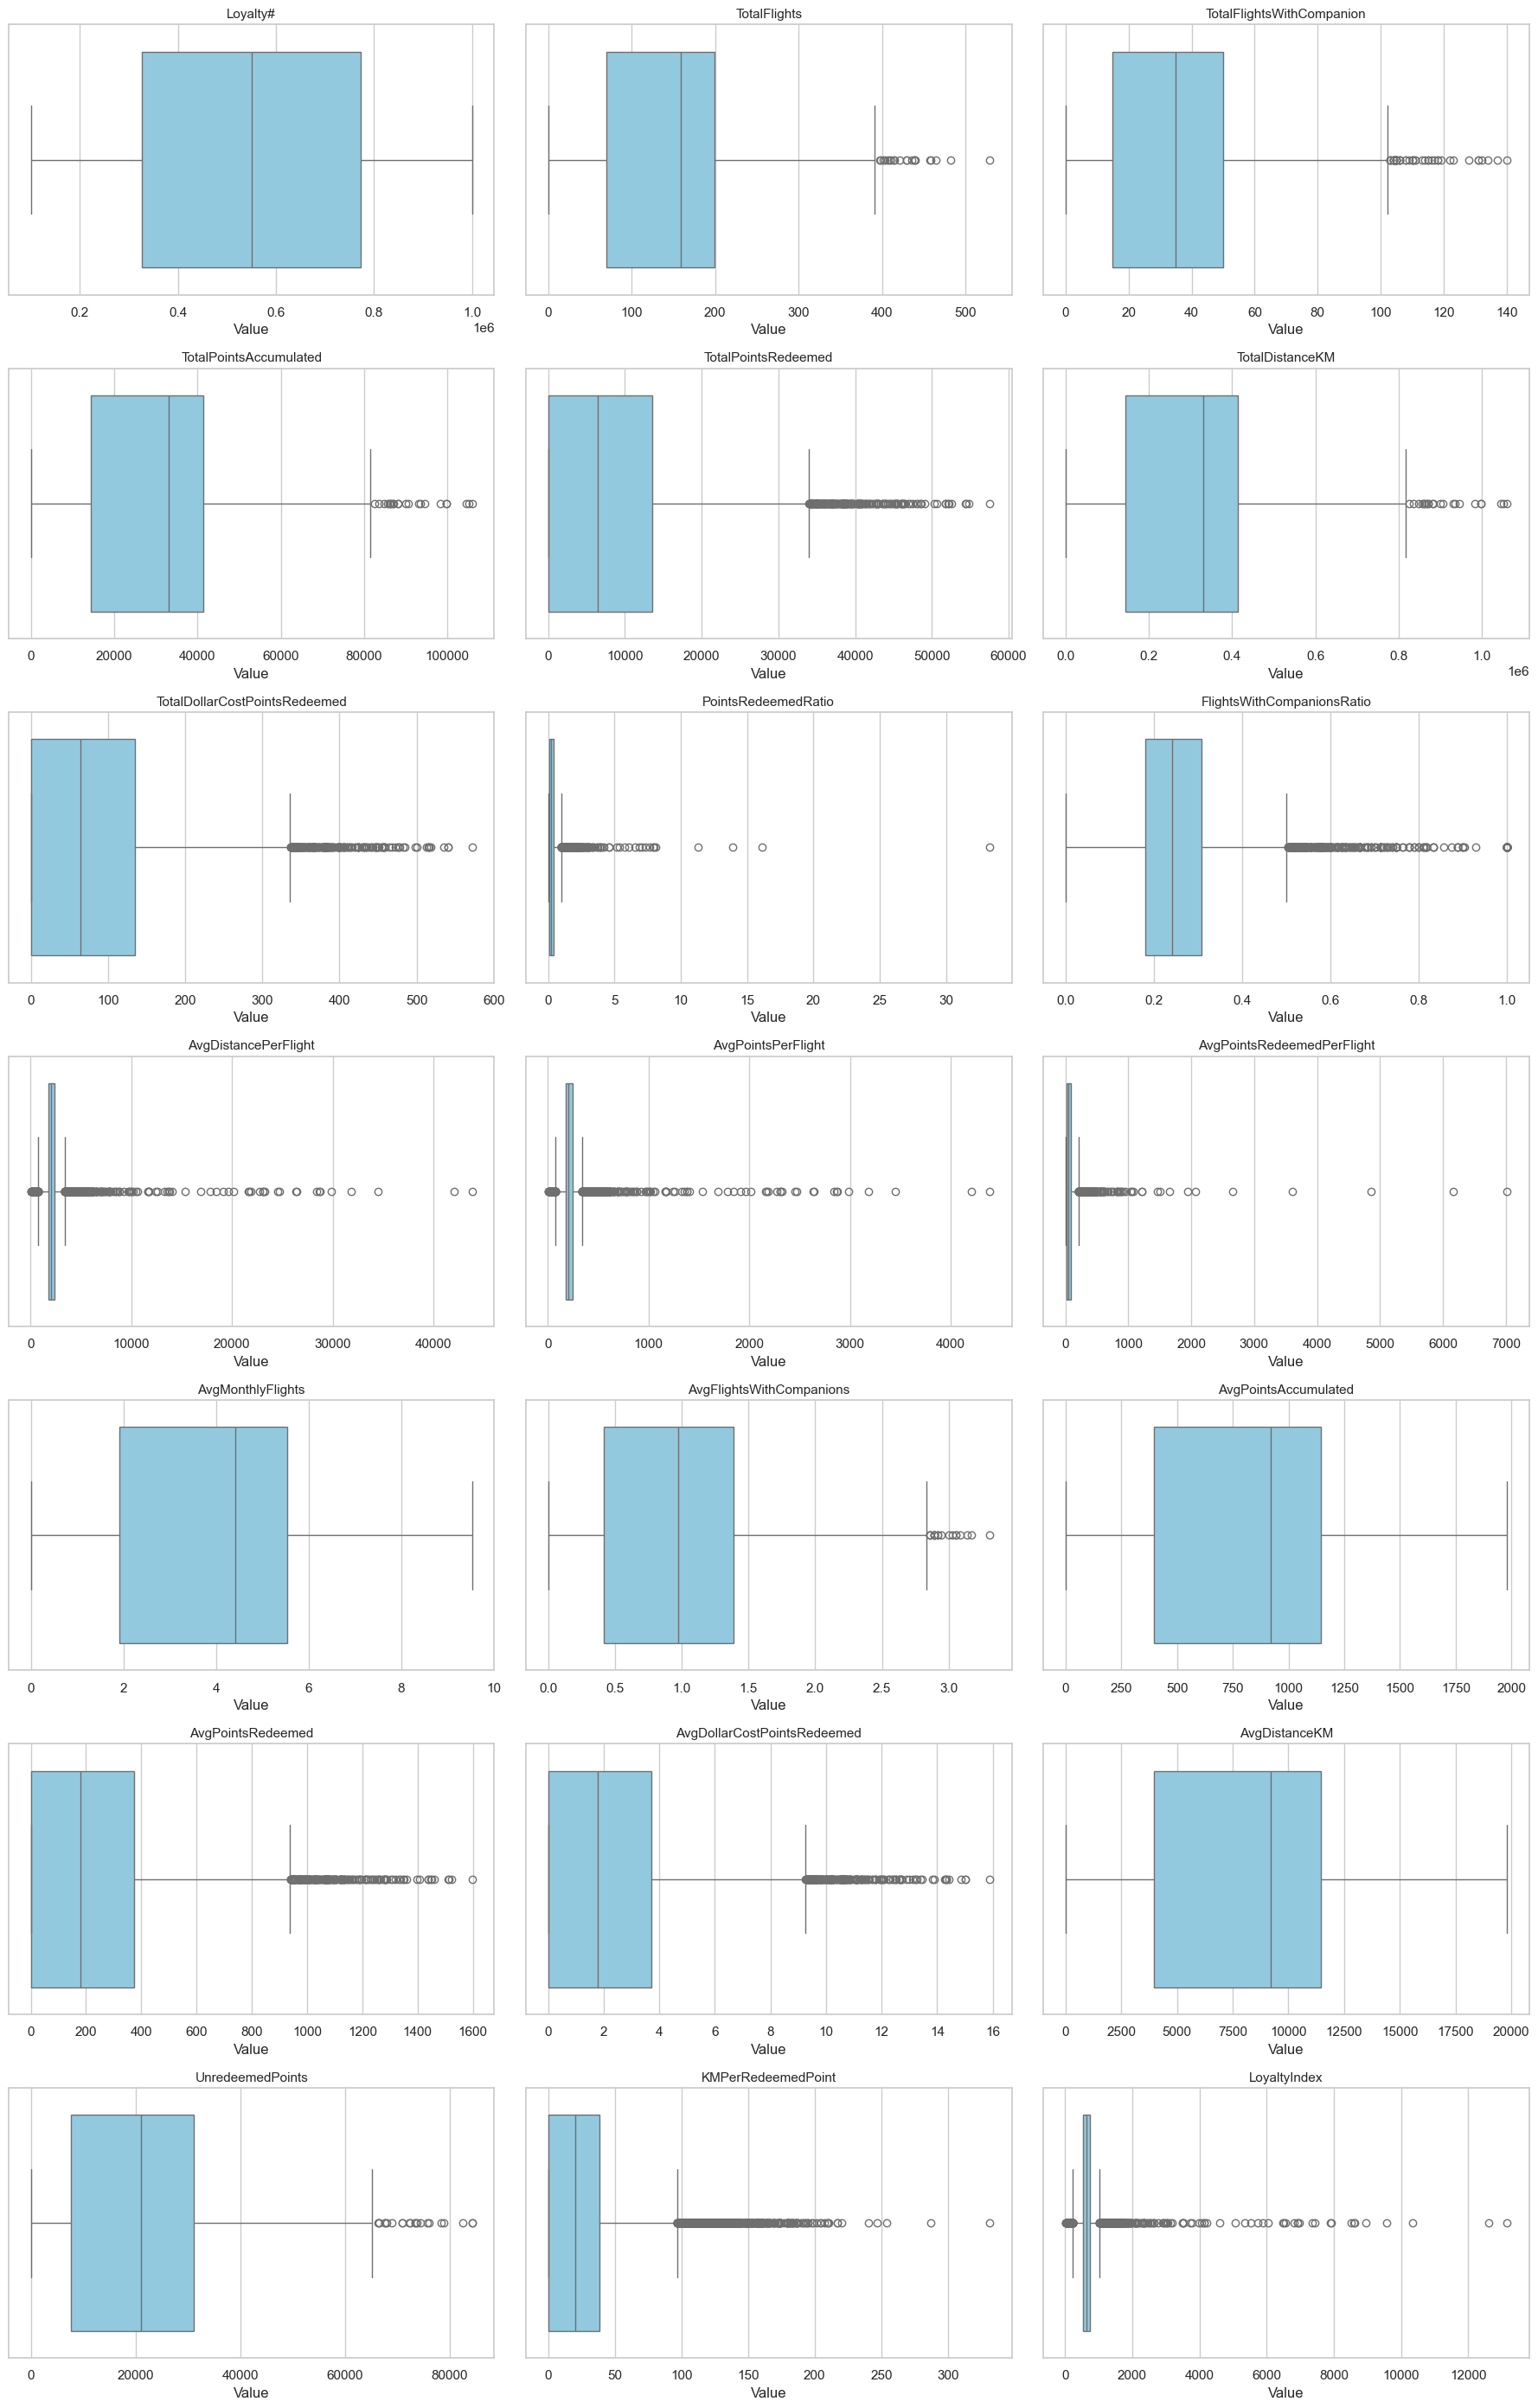

In [ ]:
sns.set_style('whitegrid')

numerical_cols = FlightsDB_agg.select_dtypes(include='number').columns
n_metrics = len(numerical_cols)
n_cols = 3
n_rows = math.ceil(n_metrics / n_cols)

plt.figure(figsize=(18, n_rows * 4))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=FlightsDB_agg, x=col, color='skyblue', orient='h')
    plt.title(col, fontsize=11)
    plt.xlabel('Value')
    plt.ylabel('')

plt.tight_layout()
plt.show()


## High Value Customer

In [ ]:
median_total_flights = FlightsDB_agg['TotalFlights'].median()
median_total_points = FlightsDB_agg['TotalPointsAccumulated'].median()
median_avg_flights = FlightsDB_agg['AvgMonthlyFlights'].median()
median_redemption_rate =  FlightsDB_agg['PointsRedeemedRatio'].median()

def customer_segment(row):
    if (row['TotalFlights'] >= median_total_flights and
    row['TotalPointsAccumulated'] >= median_total_points and
    row['AvgMonthlyFlights'] >= median_avg_flights and
    row['PointsRedeemedRatio'] >= median_redemption_rate):
        return 'VIP / Active Redeemer'
    
    elif row['TotalFlights'] >= median_total_flights and row['TotalPointsAccumulated'] >= median_total_points:
        return 'High Volume / Low Redeemer'
    
    elif row['AvgMonthlyFlights'] >= median_avg_flights or row['PointsRedeemedRatio'] >= median_redemption_rate:
        return 'Low Volume / Active Redeemer'
    
    else:
        return 'Low Volume / Low Redeemer'

FlightsDB_agg['CustomerSegment'] = FlightsDB_agg.apply(customer_segment, axis=1)

segment_counts = FlightsDB_agg['CustomerSegment'].value_counts()
print("\nCustomer Segments:")
print(segment_counts)



Customer Segments:
CustomerSegment
Low Volume / Low Redeemer       5215
Low Volume / Active Redeemer    4448
VIP / Active Redeemer           3688
High Volume / Low Redeemer      3386
Name: count, dtype: int64


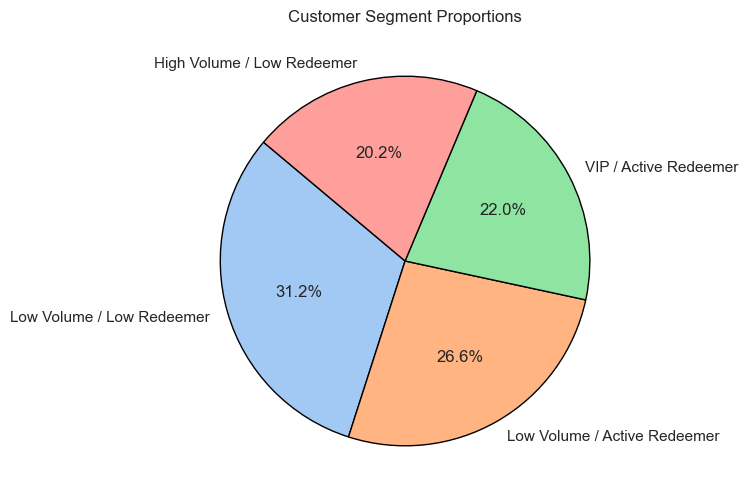

In [ ]:
plt.figure(figsize=(6,6))
FlightsDB_agg['CustomerSegment'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel'),
    startangle=140,
    wedgeprops={'edgecolor': 'black'}
)
plt.ylabel('')
plt.title('Customer Segment Proportions')
plt.show()


**VIP / Active Redeemer** → Offer exclusive rewards, priority services, and tailored promotions to reinforce loyalty and maintain high engagement.

**High Volume / Low Redeemer** → Encourage points redemption through targeted campaigns, limited-time offers, and personalized incentives to increase engagement.

**Low Volume / Active Redeemer** → Strengthen loyalty by promoting flight frequency, offering travel bundles, and providing tailored perks to motivate more bookings.

**Low Volume / Low Redeemer** → Implement low-cost engagement initiatives, such as newsletters or seasonal offers, and monitor activity to identify potential future opportunities.

## Bivariate and Multivariate Analysis

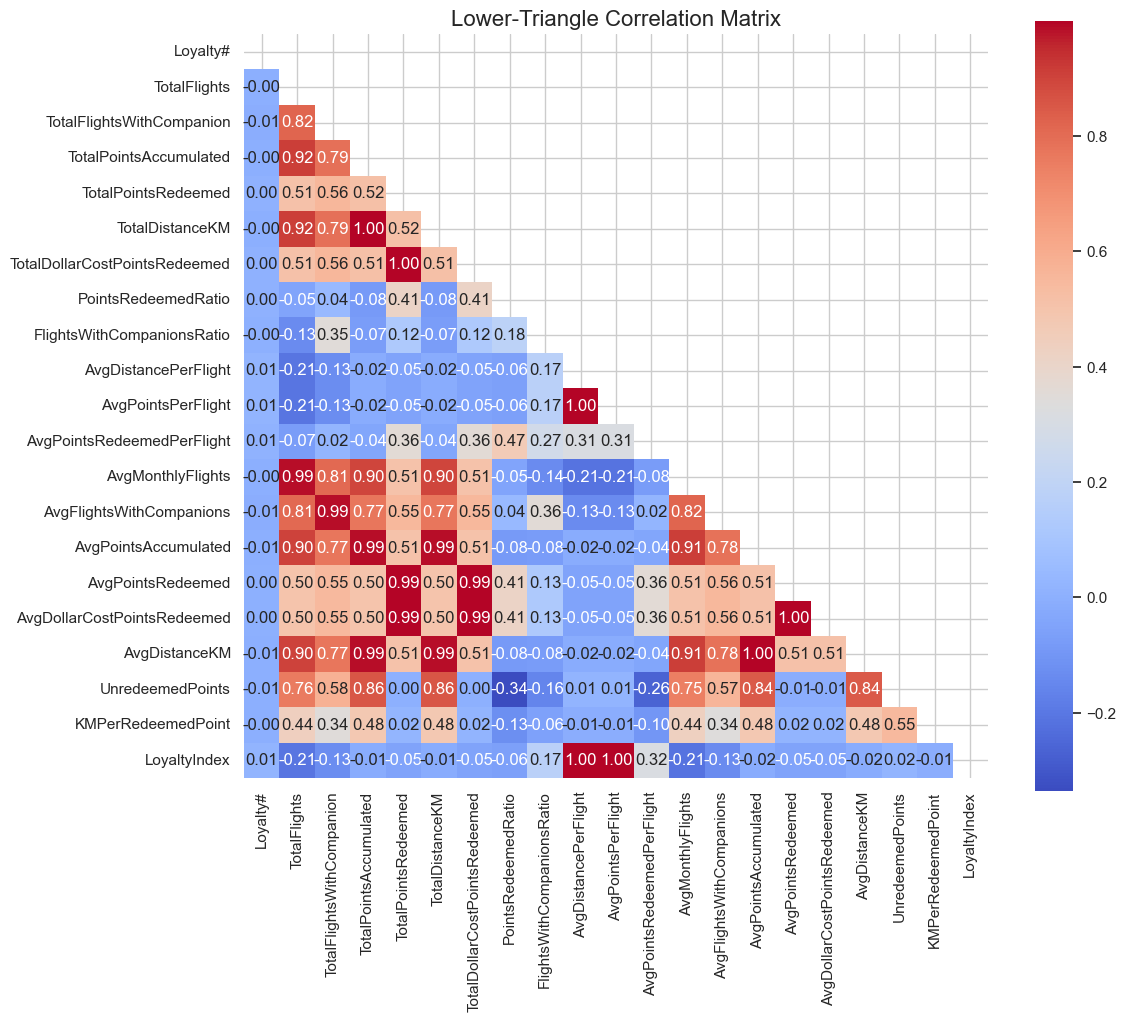

In [ ]:
# Select numeric columns
numeric_cols = FlightsDB_agg.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = FlightsDB_agg[numeric_cols].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the lower-triangle heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title('Lower-Triangle Correlation Matrix', fontsize=16)
plt.show()


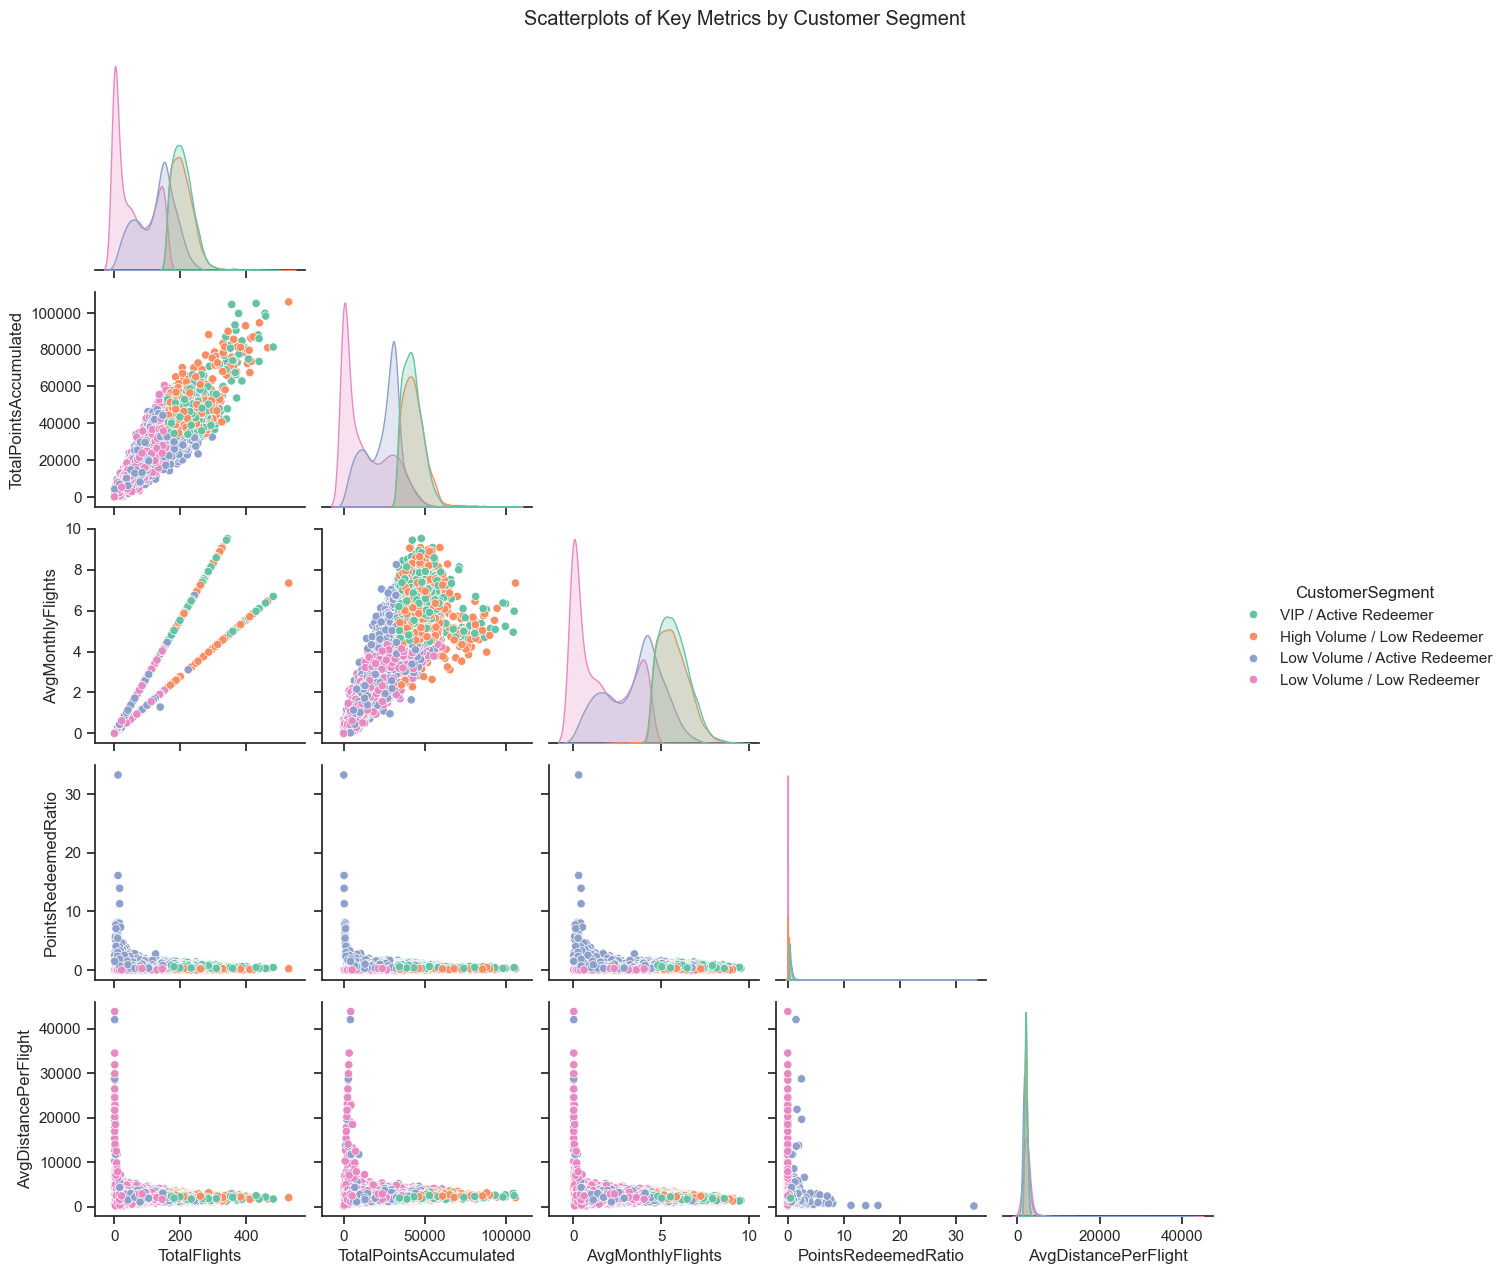

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionar variáveis relevantes
cols = ['TotalFlights', 'TotalPointsAccumulated', 'AvgMonthlyFlights', 'PointsRedeemedRatio', 'AvgDistancePerFlight', 'CustomerSegment']

# Subset do dataframe
df_plot = FlightsDB_agg[cols]

# Criar pairplot
sns.set(style="ticks", palette="Set2")
pairplot = sns.pairplot(df_plot, hue='CustomerSegment', diag_kind='kde', corner=True)
pairplot.fig.suptitle("Scatterplots of Key Metrics by Customer Segment", y=1.02)
plt.show()


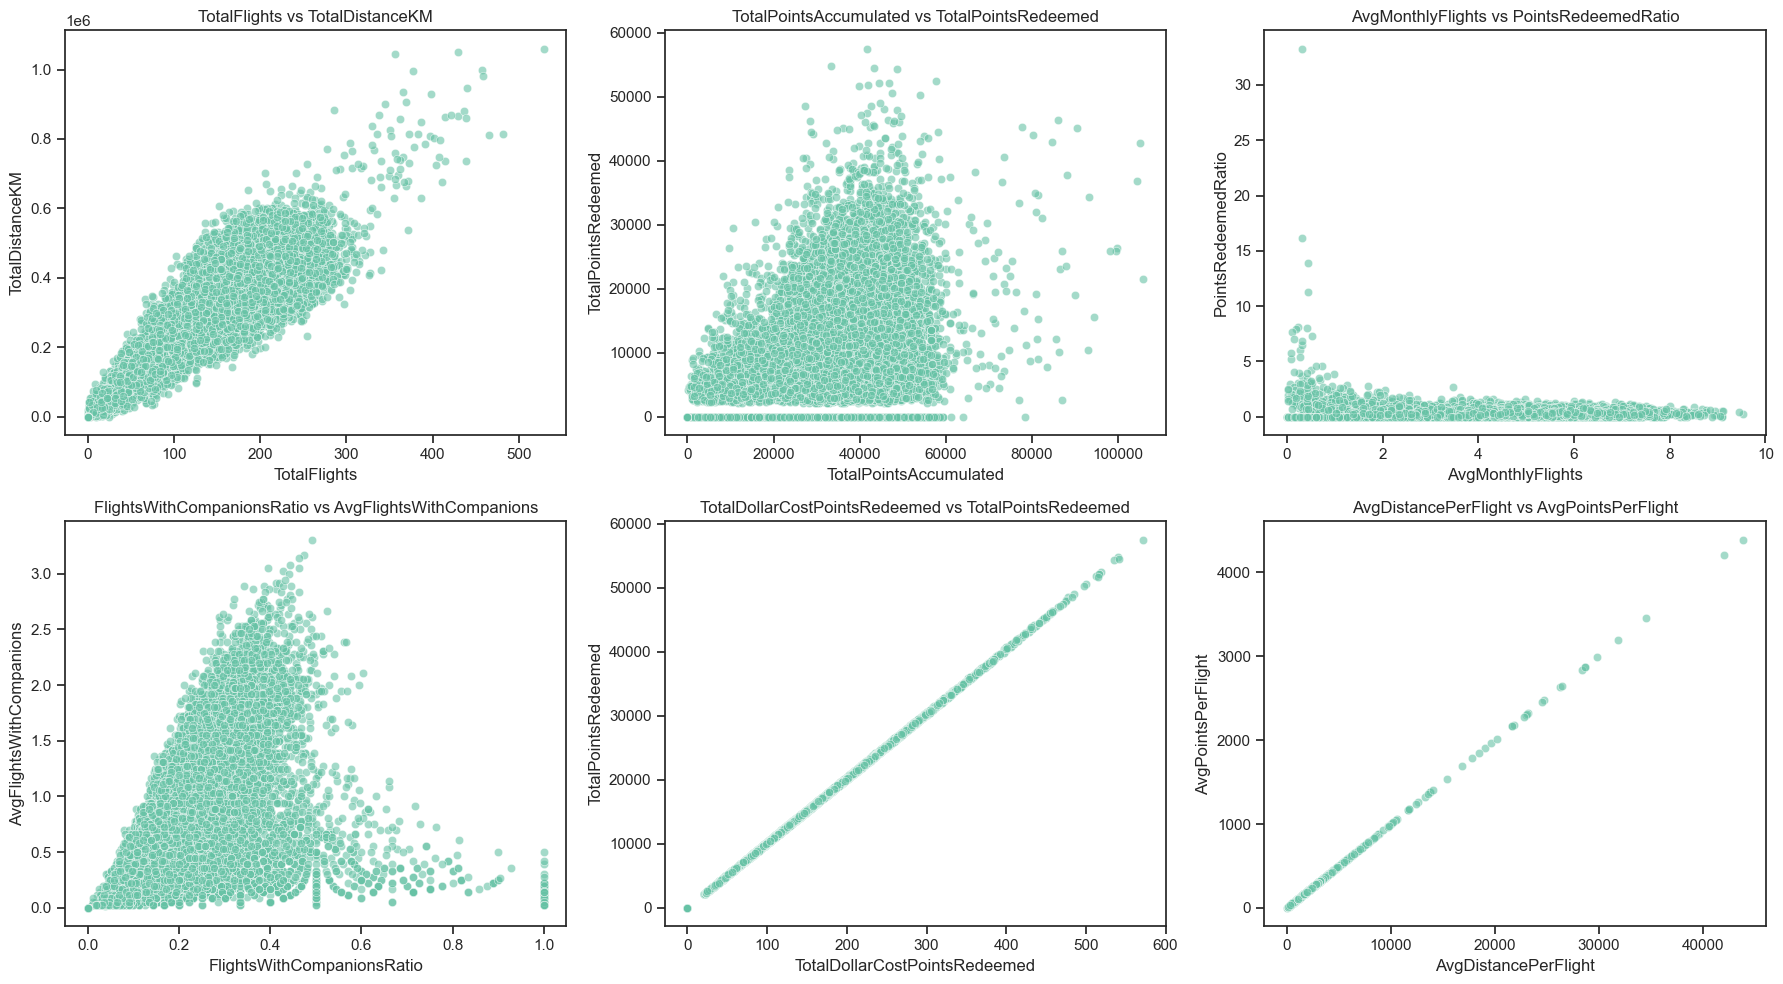

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_pairs = [
    ('TotalFlights', 'TotalDistanceKM'),
    ('TotalPointsAccumulated', 'TotalPointsRedeemed'),
    ('AvgMonthlyFlights', 'PointsRedeemedRatio'),
    ('FlightsWithCompanionsRatio', 'AvgFlightsWithCompanions'),
    ('TotalDollarCostPointsRedeemed', 'TotalPointsRedeemed'),
    ('AvgDistancePerFlight', 'AvgPointsPerFlight')
]

n_pairs = len(numeric_pairs)
n_cols = 3  
n_rows = (n_pairs + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*6, n_rows*5))
axes = axes.flatten() 

for i, (x_var, y_var) in enumerate(numeric_pairs):
    sns.scatterplot(
        x=x_var, y=y_var, data=FlightsDB_agg, ax=axes[i], alpha=0.6
    )
    axes[i].set_title(f'{x_var} vs {y_var}')

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

FlightsDB = FlightsDB.copy()
agg_mean = FlightsDB.groupby('Loyalty#').agg({
    'NumFlights': 'mean',                  
    'NumFlightsWithCompanions': 'mean',    
    'PointsAccumulated': 'mean',            
    'PointsRedeemed': 'mean',               
    'DollarCostPointsRedeemed': 'mean',     
    'DistanceKM': 'mean'                    
}).reset_index()


agg_mean.rename(columns={
    'NumFlights': 'AvgMonthlyFlights',
    'NumFlightsWithCompanions': 'AvgFlightsWithCompanions',
    'PointsAccumulated': 'AvgPointsAccumulated',
    'PointsRedeemed': 'AvgPointsRedeemed',
    'DollarCostPointsRedeemed': 'AvgDollarCostPointsRedeemed',
    'DistanceKM': 'AvgDistanceKM'
}, inplace=True)

max_flights = agg_mean['AvgMonthlyFlights'].max()

bins = [0, 1, 3, 5, 10, max_flights+1]
labels = ['0-1', '1-3', '3-5', '5-10', '10+']

agg_mean['FlightRange'] = pd.cut(
    agg_mean['AvgMonthlyFlights'], 
    bins=bins, 
    labels=labels, 
    right=False
)

flight_range_counts = agg_mean['FlightRange'].value_counts().sort_index()

flight_range_percent = (flight_range_counts / flight_range_counts.sum()) * 100

flight_summary = pd.DataFrame({
    'FlightRange': flight_range_counts.index,
    'NumberOfCustomers': flight_range_counts.values,
    'Percentage': flight_range_percent.values
})

print(flight_summary)



  FlightRange  NumberOfCustomers  Percentage
0         0-1               2838   16.956444
1         1-3               2519   15.050487
2         3-5               5141   30.716377
3        5-10               6239   37.276692
4         10+                  0    0.000000


In [ ]:
import pandas as pd

FlightsDB = FlightsDB.copy()
agg_mean = FlightsDB.groupby('Loyalty#').agg({
    'NumFlights': 'mean',                  
    'NumFlightsWithCompanions': 'mean',    
    'PointsAccumulated': 'mean',            
    'PointsRedeemed': 'mean',               
    'DollarCostPointsRedeemed': 'mean',     
    'DistanceKM': 'mean'                    
}).reset_index()


agg_mean.rename(columns={
    'NumFlights': 'AvgMonthlyFlights',
    'NumFlightsWithCompanions': 'AvgFlightsWithCompanions',
    'PointsAccumulated': 'AvgPointsAccumulated',
    'PointsRedeemed': 'AvgPointsRedeemed',
    'DollarCostPointsRedeemed': 'AvgDollarCostPointsRedeemed',
    'DistanceKM': 'AvgDistanceKM'
}, inplace=True)

max_flights = agg_mean['AvgMonthlyFlights'].max()

bins = [0, 1, 3, 5, 10, max_flights+1]
labels = ['0-1', '1-3', '3-5', '5-10', '10+']

agg_mean['FlightRange'] = pd.cut(
    agg_mean['AvgMonthlyFlights'], 
    bins=bins, 
    labels=labels, 
    right=False
)

flight_range_counts = agg_mean['FlightRange'].value_counts().sort_index()

flight_range_percent = (flight_range_counts / flight_range_counts.sum()) * 100

flight_summary = pd.DataFrame({
    'FlightRange': flight_range_counts.index,
    'NumberOfCustomers': flight_range_counts.values,
    'Percentage': flight_range_percent.values
})

print(flight_summary)



  FlightRange  NumberOfCustomers  Percentage
0         0-1               2838   16.956444
1         1-3               2519   15.050487
2         3-5               5141   30.716377
3        5-10               6239   37.276692
4         10+                  0    0.000000


## Sazonality

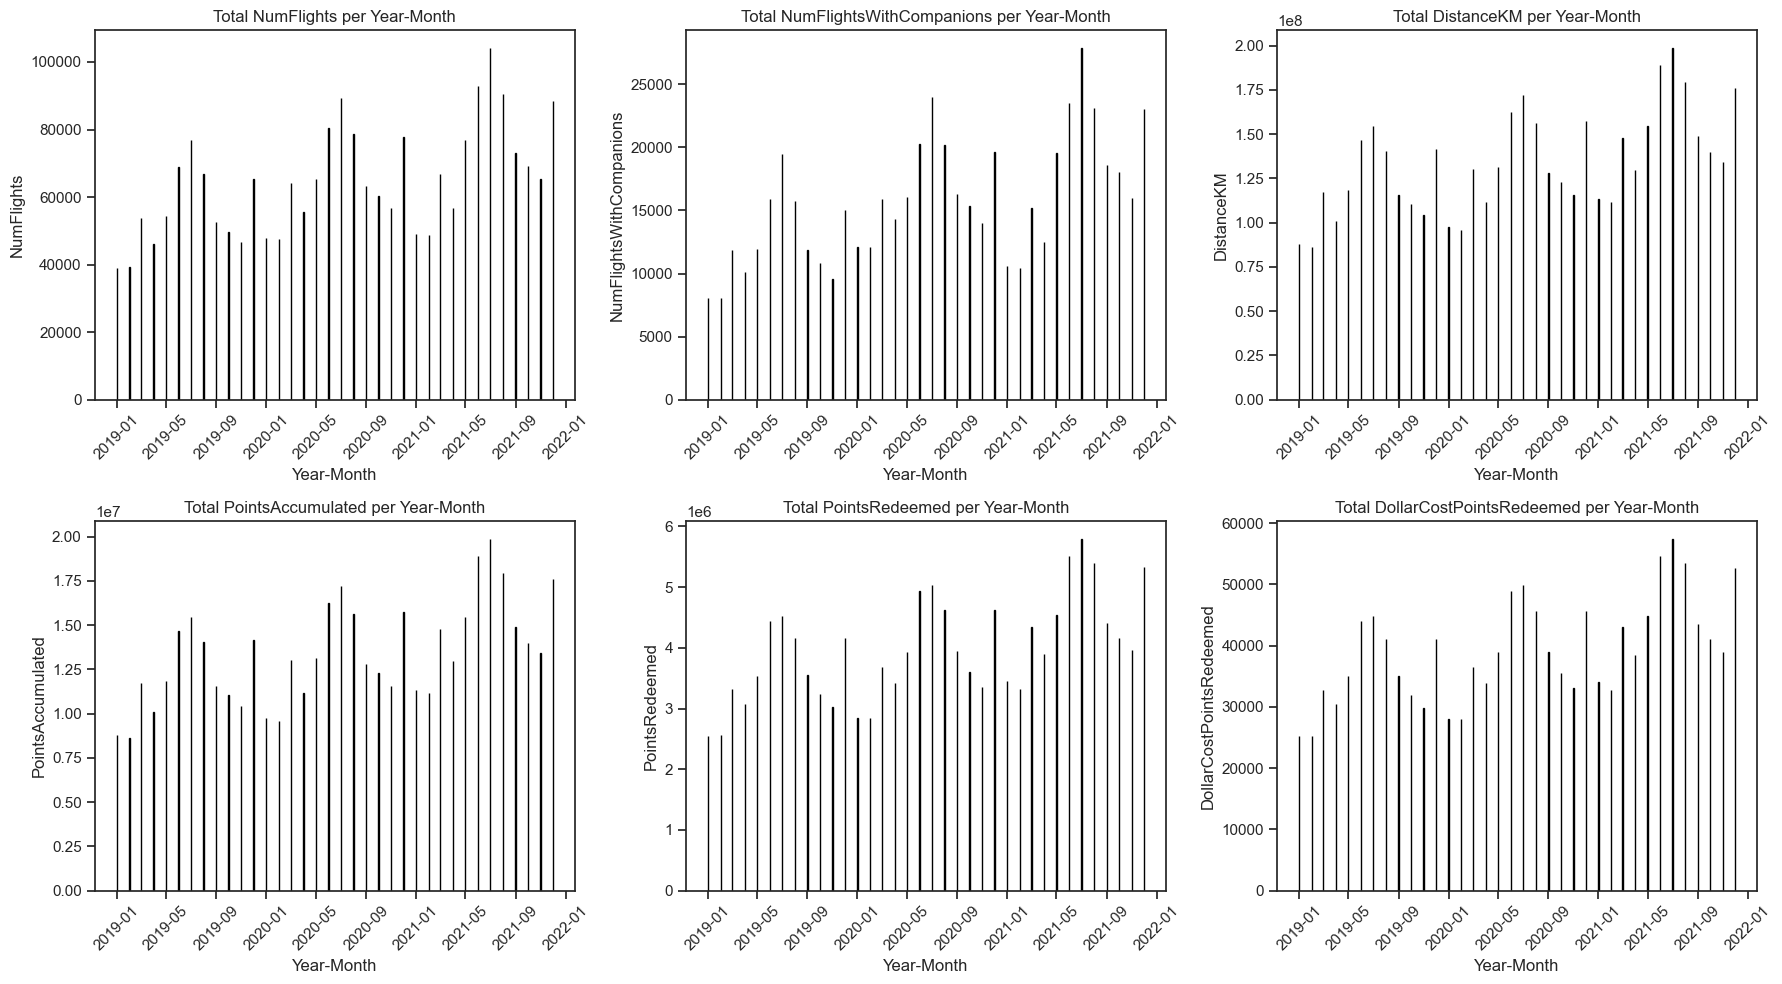

In [ ]:
FlightsDB = FlightsDB.copy()

numerical_cols = ['NumFlights', 'NumFlightsWithCompanions', 
                'DistanceKM', 'PointsAccumulated', 
                'PointsRedeemed', 'DollarCostPointsRedeemed']

per_month = FlightsDB.groupby('YearMonthDate')[numerical_cols].sum().reset_index()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18,10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].bar(per_month['YearMonthDate'], per_month[col], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Total {col} per Year-Month')
    axes[i].set_xlabel('Year-Month')
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()




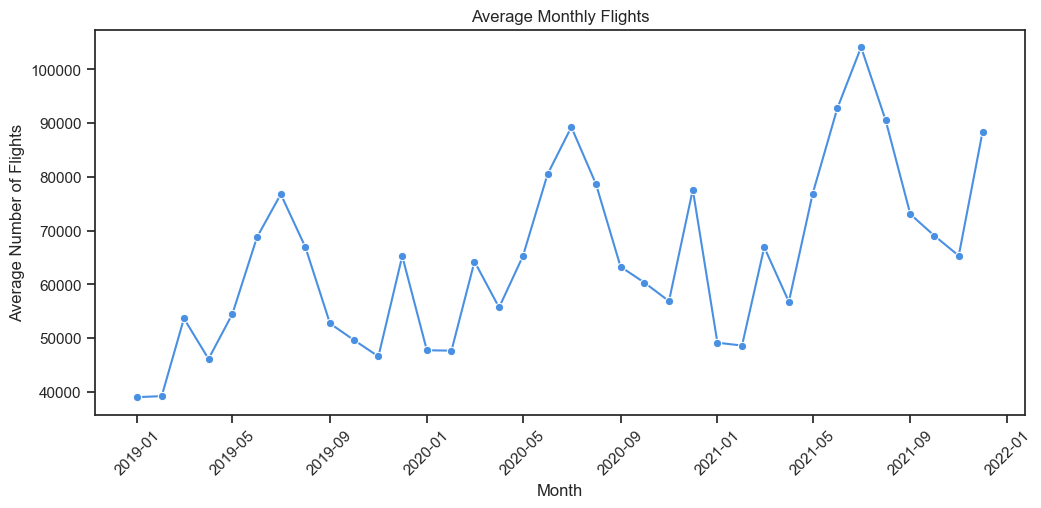

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(data=per_month, x='YearMonthDate', y='NumFlights', marker='o', color='#4A90E2')
plt.title('Average Monthly Flights')
plt.xlabel('Month')
plt.ylabel('Average Number of Flights')
plt.xticks(rotation=45)
plt.show()


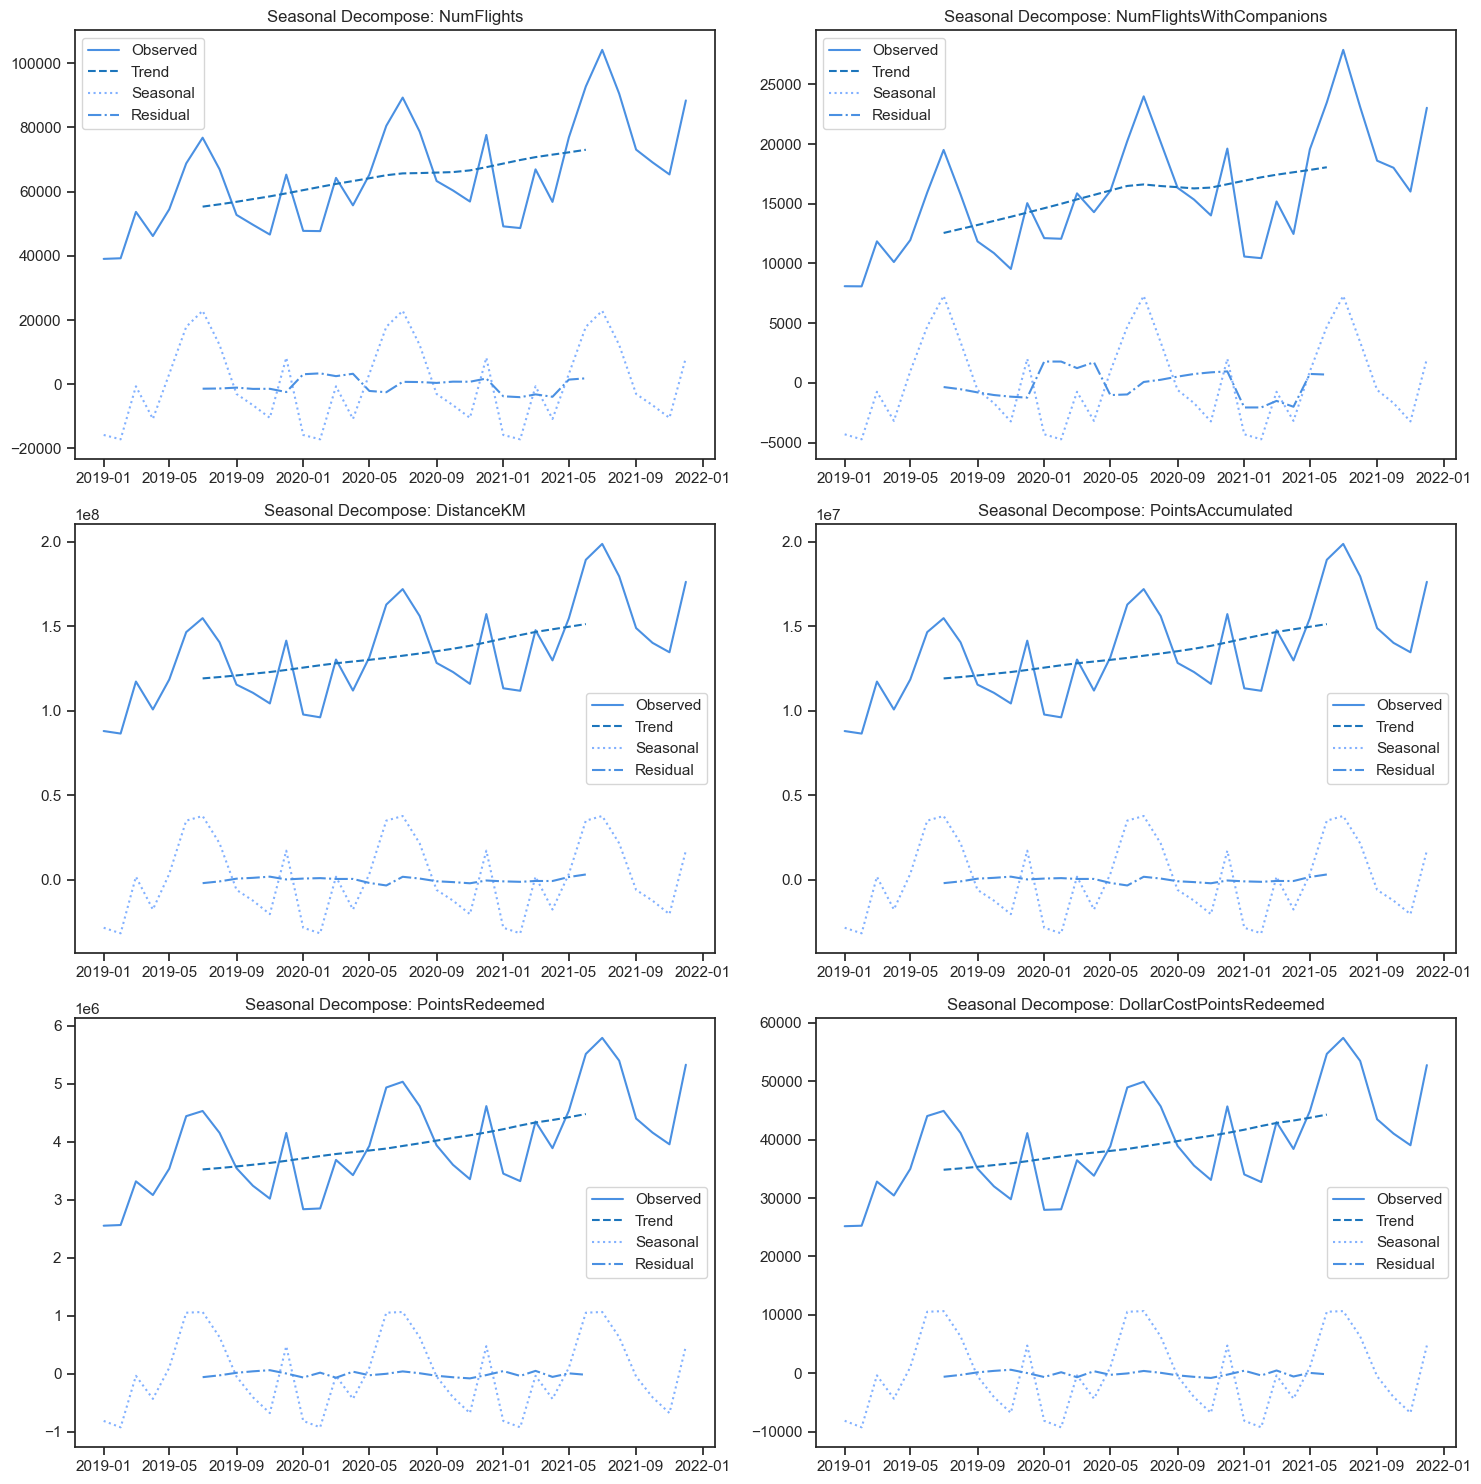

In [ ]:
n_cols = 2  
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    monthly_avg_ts = per_month.set_index('YearMonthDate')[col]
    result = seasonal_decompose(monthly_avg_ts, model='additive', period=12)
    
    
    axes[i].plot(result.observed, label='Observed', color='#4A90E2')
    axes[i].plot(result.trend, label='Trend', color='#1C75BC', linestyle='--')
    axes[i].plot(result.seasonal, label='Seasonal', color='#82B1FF', linestyle=':')
    axes[i].plot(result.resid, label='Residual', color='#4A90E2', linestyle='-.')
    
    axes[i].set_title(f'Seasonal Decompose: {col}')
    axes[i].legend()


for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Observed**: The original time series data you recorded.

**Trend**: The long-term direction or overall movement in the data.

**Seasonal**: Regular repeating patterns or cycles over time.

**Residual**: The random fluctuations or noise not explained by trend or seasonality.

## NumFlights with companions, numflights, pointsaccumulated and pointsredeemed

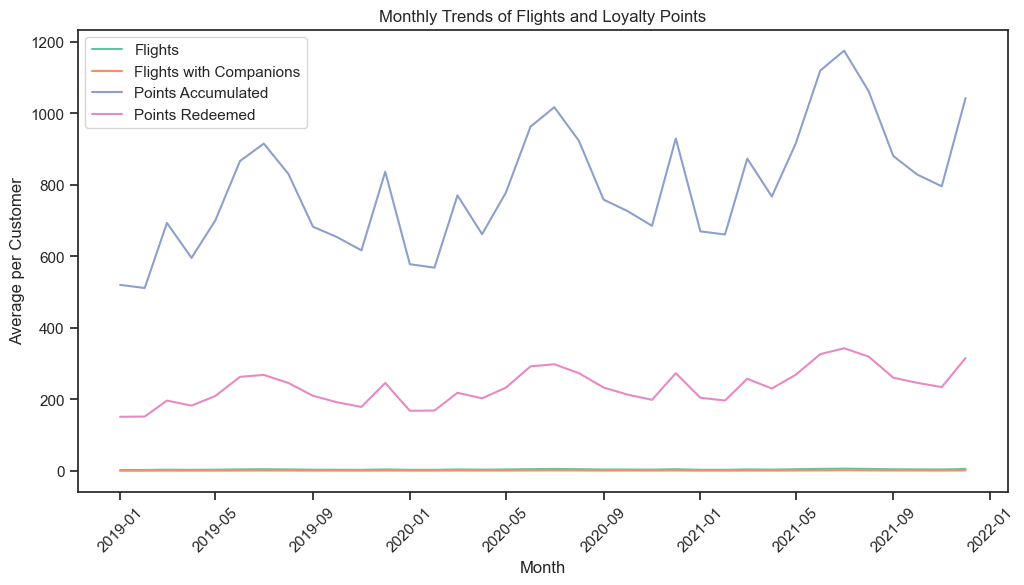

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Aggregate monthly metrics (average per customer)
monthly_agg = FlightsDB.groupby('YearMonthDate').agg({
    'NumFlights': 'mean',                  
    'NumFlightsWithCompanions': 'mean',    
    'PointsAccumulated': 'mean',            
    'PointsRedeemed': 'mean'               
}).reset_index()

plt.figure(figsize=(12,6))

sns.lineplot(data=monthly_agg, x='YearMonthDate', y='NumFlights', label='Flights')
sns.lineplot(data=monthly_agg, x='YearMonthDate', y='NumFlightsWithCompanions', label='Flights with Companions')
sns.lineplot(data=monthly_agg, x='YearMonthDate', y='PointsAccumulated', label='Points Accumulated')
sns.lineplot(data=monthly_agg, x='YearMonthDate', y='PointsRedeemed', label='Points Redeemed')

plt.xlabel('Month')
plt.ylabel('Average per Customer')
plt.title('Monthly Trends of Flights and Loyalty Points')
plt.xticks(rotation=45)
plt.legend()
plt.show()


## NumFlights, NumFlightsWithCompanions, DistanceKM

In [ ]:
outliers = ['NumFlights', 'NumFlightsWithCompanions', 'DistanceKM']

outlier_bounds = {}
outliers_data = {}

for col in outliers:
    Q1 = FlightsDB[col].quantile(0.25)
    Q3 = FlightsDB[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outlier_bounds[col] = (lower_bound, upper_bound)
    
    # Get outliers for this column
    outliers_data[col] = FlightsDB[(FlightsDB[col] < lower_bound) | (FlightsDB[col] > upper_bound)].sort_values(by=col, ascending=False)

# Print results
for col in outliers:
    lb, ub = outlier_bounds[col]
    print(f"{col} - Lower bound: {lb}, Upper bound: {ub}")
    print(f"Number of outliers in {col}: {len(outliers_data[col])}\n")


NumFlights - Lower bound: -10.5, Upper bound: 17.5
Number of outliers in NumFlights: 6919

NumFlightsWithCompanions - Lower bound: 0.0, Upper bound: 0.0
Number of outliers in NumFlightsWithCompanions: 151670

DistanceKM - Lower bound: -23007.262499999997, Upper bound: 38345.4375
Number of outliers in DistanceKM: 1972



In [ ]:
for col, df_outliers in outliers_data.items():
    print(f"Outliers for column: {col}")
    
    #See the first and last 2 rows for each outlier column
    values = pd.concat([df_outliers[col].head(2), df_outliers[col].tail(2)])
    
    print(values)
    print("\n" + "-"*50 + "\n")


Outliers for column: NumFlights
227374    21
380969    21
522517    18
522607    18
Name: NumFlights, dtype: int64

--------------------------------------------------

Outliers for column: NumFlightsWithCompanions
370778    11
207820    11
179        1
179587     1
Name: NumFlightsWithCompanions, dtype: int64

--------------------------------------------------

Outliers for column: DistanceKM
390460    42040.0
227550    42013.0
214101    38351.0
389855    38346.0
Name: DistanceKM, dtype: float64

--------------------------------------------------



For both numflights and numflightswithcompanions, we could log to minimize the distribution. it does not make sense removing the values, since it gives us information about the number of flights each customer had in each month.

## PointsAccumulated, PointsRedeemed and DollarCostPointsRedeemed

In [ ]:
outliers = ['PointsAccumulated', 'PointsRedeemed', 'DollarCostPointsRedeemed']

outlier_bounds = {}
outliers_data = {}

for col in outliers:
    Q1 = FlightsDB[col].quantile(0.25)
    Q3 = FlightsDB[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outlier_bounds[col] = (lower_bound, upper_bound)
    
    # Get outliers for this column
    outliers_data[col] = FlightsDB[(FlightsDB[col] < lower_bound) | (FlightsDB[col] > upper_bound)].sort_values(by=col, ascending=False)

# Print results
for col in outliers:
    lb, ub = outlier_bounds[col]
    print(f"{col} - Lower bound: {lb}, Upper bound: {ub}")
    print(f"Number of outliers in {col}: {len(outliers_data[col])}\n")


PointsAccumulated - Lower bound: -2299.5, Upper bound: 3832.5
Number of outliers in PointsAccumulated: 1991

PointsRedeemed - Lower bound: 0.0, Upper bound: 0.0
Number of outliers in PointsRedeemed: 35393

DollarCostPointsRedeemed - Lower bound: 0.0, Upper bound: 0.0
Number of outliers in DollarCostPointsRedeemed: 35393



In [ ]:
for col, df_outliers in outliers_data.items():
    print(f"Outliers for column: {col}")
    
    #See the first and last 2 rows for each outlier column
    values = pd.concat([df_outliers[col].head(2), df_outliers[col].tail(2)])
    
    print(values)
    print("\n" + "-"*50 + "\n")


Outliers for column: PointsAccumulated
390460    4204
227550    4201
222244    3833
360795    3833
Name: PointsAccumulated, dtype: int64

--------------------------------------------------

Outliers for column: PointsRedeemed
213042    7496
371432    7496
431868    1894
422605    1890
Name: PointsRedeemed, dtype: int64

--------------------------------------------------

Outliers for column: DollarCostPointsRedeemed
369122    74.0
369358    74.0
425032    18.9
438781    18.9
Name: DollarCostPointsRedeemed, dtype: float64

--------------------------------------------------



## Dates Features
#### YearMonthDate

In [ ]:
# Extract month, day, year as integers
FlightsDB['month'] = FlightsDB['YearMonthDate'].dt.month
FlightsDB['day'] = FlightsDB['YearMonthDate'].dt.day
FlightsDB['year'] = FlightsDB['YearMonthDate'].dt.year

# Check months are 1-12
invalid_months = FlightsDB[(FlightsDB['month'] < 1) | (FlightsDB['month'] > 12)]

# Check days are 1-31
invalid_days = FlightsDB[(FlightsDB['day'] < 1) | (FlightsDB['day'] > 31)]

# Check years are within expected range
invalid_years = FlightsDB[~FlightsDB['year'].isin([2019, 2020, 2021])]

# Print only relevant columns
print("Invalid months:\n", invalid_months[['YearMonthDate','month']])
print("Invalid days:\n", invalid_days[['YearMonthDate','day']])
print("Invalid years (should only be 2019, 2020, 2021):\n", invalid_years[['YearMonthDate','year']])

# Summary of results
if invalid_months.empty and invalid_days.empty and invalid_years.empty:
    print("All dates appear valid.")
else:
    print(f"Invalid date components detected: {len(invalid_months) + len(invalid_days) + len(invalid_years)} issues")



Invalid months:
 Empty DataFrame
Columns: [YearMonthDate, month]
Index: []
Invalid days:
 Empty DataFrame
Columns: [YearMonthDate, day]
Index: []
Invalid years (should only be 2019, 2020, 2021):
 Empty DataFrame
Columns: [YearMonthDate, year]
Index: []
All dates appear valid.


In [ ]:
FlightsDB = FlightsDB.drop(columns=['month', 'year', 'day'])

## Duplicated Rows 
### CustomerDB

In [ ]:
# Select all fully duplicate rows (all columns must match)
fully_duplicated_rows = CustomerDB[CustomerDB.duplicated(keep=False)]

# Display the fully duplicated rows
fully_duplicated_rows

Empty DataFrame
Columns: [Loyalty#, First Name, Last Name, Customer Name, Country, Province or State, City, Latitude, Longitude, Postal code, Gender, Education, Location Code, Income, Marital Status, LoyaltyStatus, EnrollmentDateOpening, CancellationDate, Customer Lifetime Value, EnrollmentType, FullName]
Index: []

[0 rows x 21 columns]

In [ ]:
# Select all columns except 'Loyalty#'
cols_except_loyalty = [c for c in CustomerDB.columns if c != 'Loyalty#']

# Find duplicated rows ignoring 'Loyalty#'
duplicates_ignore_loyalty = CustomerDB[CustomerDB.duplicated(subset=cols_except_loyalty, keep=False)]

# Optional: sort for easier inspection
duplicates_ignore_loyalty = duplicates_ignore_loyalty.sort_values(by=['First Name','Last Name','EnrollmentDateOpening'])

# Display
duplicates_ignore_loyalty


Empty DataFrame
Columns: [Loyalty#, First Name, Last Name, Customer Name, Country, Province or State, City, Latitude, Longitude, Postal code, Gender, Education, Location Code, Income, Marital Status, LoyaltyStatus, EnrollmentDateOpening, CancellationDate, Customer Lifetime Value, EnrollmentType, FullName]
Index: []

[0 rows x 21 columns]

In [ ]:
CustomerDB = CustomerDB.drop(columns=[ 'FullName'])

### FlightsDB

In [ ]:
# Find fully duplicated rows (identical across all columns)
duplicate_rows = FlightsDB[FlightsDB.duplicated(keep=False)]

# Print the number of fully duplicated rows
print(f"Number of fully duplicated rows: {duplicate_rows.shape[0]}")

# Display the first few duplicated rows
duplicate_rows.head()


Number of fully duplicated rows: 5778


Loyalty#  Year  Month YearMonthDate  NumFlights  \
450    727091  2021     12    2021-12-01           0   
535    369638  2021     12    2021-12-01           0   
762    750578  2020      6    2020-06-01           0   
941    547522  2020      6    2020-06-01           0   
952    819842  2020      6    2020-06-01           0   

     NumFlightsWithCompanions  DistanceKM  PointsAccumulated  PointsRedeemed  \
450                         0         0.0                  0               0   
535                         0         0.0                  0               0   
762                         0         0.0                  0               0   
941                         0         0.0                  0               0   
952                         0         0.0                  0               0   

     DollarCostPointsRedeemed  
450                       0.0  
535                       0.0  
762                       0.0  
941                       0.0  
952                       0.0

In [ ]:
# Remove fully duplicated rows (keeping only the first occurrence)
FlightsDB = FlightsDB.drop_duplicates(keep='first')

# Confirm the result
print(f"New number of rows after removing duplicates: {FlightsDB.shape[0]}")

New number of rows after removing duplicates: 605533


We should drop these duplicated rows in FlightsDB.

Check if there is more than 12 months for each customer in each year. We pretend to ensure that we are just dealing with one customer at a time.

In [ ]:
# Count how many unique months exist per (Loyalty#, Year)
month_counts = (
    FlightsDB.groupby(['Loyalty#', 'Year'])['Month']
    .nunique()
    .reset_index(name='MonthCount')
)

# Show only those that don't have all 12 months
incomplete = month_counts[month_counts['MonthCount'] < 12]
problem = month_counts[month_counts['MonthCount'] >12]
print(incomplete)
print(problem)

Empty DataFrame
Columns: [Loyalty#, Year, MonthCount]
Index: []
Empty DataFrame
Columns: [Loyalty#, Year, MonthCount]
Index: []


Shows that for each Loyalty#, we just have 1 customer.

## Comparing Loyalty# in CustomerDB and FlightsDB

In [ ]:
# Get unique loyalty IDs from both dataframes
loy_customer = set(CustomerDB['Loyalty#'].unique())
loy_flights = set(FlightsDB['Loyalty#'].unique())

print(f"CustomerDB has {len(loy_customer)} unique loyalty IDs.")
print(f"FlightsDB has {len(loy_flights)} unique loyalty IDs.")


CustomerDB has 16757 unique loyalty IDs.
FlightsDB has 16737 unique loyalty IDs.


In [ ]:
if loy_customer == loy_flights:
    print("✅ Both datasets have exactly the same Loyalty# IDs.")
else:
    print("❌ The sets of Loyalty# are not identical.")


❌ The sets of Loyalty# are not identical.


In [ ]:
# IDs that are in FlightsDB but not in CustomerDB
extra_in_flights = loy_flights - loy_customer

# IDs that are in CustomerDB but not in FlightsDB
extra_in_customers = loy_customer - loy_flights

print(f"Loyalty# only in FlightsDB: {len(extra_in_flights)}")
print(f"Loyalty# only in CustomerDB: {len(extra_in_customers)}")

# Optionally, see a few examples
print("\nExamples only in FlightsDB:", list(extra_in_flights)[:10])
print("Examples only in CustomerDB:", list(extra_in_customers)[:10])


Loyalty# only in FlightsDB: 0
Loyalty# only in CustomerDB: 20

Examples only in FlightsDB: []
Examples only in CustomerDB: [np.int64(100011), np.int64(100012), np.int64(100013), np.int64(100014), np.int64(100015), np.int64(100016), np.int64(100017), np.int64(999987), np.int64(999988), np.int64(999989)]


In [ ]:
summary = pd.DataFrame({
    'Only_in_CustomerDB': [len(extra_in_customers)],
    'Only_in_FlightsDB': [len(extra_in_flights)],
    'In_Both': [len(loy_customer & loy_flights)]
})

print(summary)


   Only_in_CustomerDB  Only_in_FlightsDB  In_Both
0                  20                  0    16737


These are the 20 customers with missing values in Income and CLV 

# Preparing CustomerDB for merge

In [ ]:
CustomerDB = CustomerDB.copy()


CustomerDB = CustomerDB.sort_values(['Loyalty#', 'EnrollmentDateOpening'], ascending=[True, True])

CustomerDB_final = CustomerDB.drop_duplicates(subset='Loyalty#', keep='first')


# Preparing FlightsDB for merge

In [ ]:
FlightsDB.head()

Loyalty#  Year  Month YearMonthDate  NumFlights  NumFlightsWithCompanions  \
0    413052  2021     12    2021-12-01           2                         2   
1    464105  2021     12    2021-12-01           0                         0   
2    681785  2021     12    2021-12-01          10                         3   
3    185013  2021     12    2021-12-01          16                         4   
4    216596  2021     12    2021-12-01           9                         0   

   DistanceKM  PointsAccumulated  PointsRedeemed  DollarCostPointsRedeemed  
0      9384.0                938               0                       0.0  
1         0.0                  0               0                       0.0  
2     14745.0               1474               0                       0.0  
3     26311.0               2631            3213                      32.0  
4     19275.0               1927               0                       0.0

Let's do the mean and the sum per year to have a unique Loyalty#.

In [ ]:
FlightsDB= FlightsDB.copy()
id_col = 'Loyalty#'

cols = [
    'NumFlights', 
    'NumFlightsWithCompanions', 
    'DistanceKM', 
    'PointsAccumulated', 
    'PointsRedeemed', 
    'DollarCostPointsRedeemed'
]


FlightsDB_agg = FlightsDB.groupby([id_col, 'Year'])[cols].agg(['sum', 'mean']).reset_index()

FlightsDB_agg.columns = [id_col, 'Year'] + [f'{col}_{agg}' for col, agg in FlightsDB_agg.columns[2:]]

FlightsDB_wide = FlightsDB_agg.pivot(index=id_col, columns='Year')

FlightsDB_wide.columns = [f'{col}_{year}' for col, year in FlightsDB_wide.columns]

FlightsDB_final1 = FlightsDB_wide.reset_index()


In [ ]:
FlightsDB = FlightsDB.copy()

monthly_stats = FlightsDB.groupby(['Loyalty#', 'Year']).agg(
    months_active=('NumFlights', lambda x: (x > 0).sum()),   # meses com pelo menos 1 voo
    max_monthly_points=('PointsRedeemed', 'max'),            # máximo de pontos resgatados em um mês
    std_monthly_flights=('NumFlights', 'std')               # variabilidade do número de voos
).reset_index()

monthly_stats_wide = monthly_stats.pivot(index='Loyalty#', columns='Year')

monthly_stats_wide.columns = [f'{col}_{year}' for col, year in monthly_stats_wide.columns]

monthly_stats_wide = monthly_stats_wide.reset_index()

In [ ]:
FlightsDB_final = pd.merge(
    FlightsDB_final1, 
    monthly_stats_wide, 
    on='Loyalty#',        
    how='outer'           
)

In [ ]:
FlightsDB_final.head()

Loyalty#  NumFlights_sum_2019  NumFlights_sum_2020  NumFlights_sum_2021  \
0    100018                   68                   81                   76   
1    100102                   72                   83                   90   
2    100140                   59                   72                   80   
3    100214                   29                   37                   42   
4    100272                   54                   66                   61   

   NumFlights_mean_2019  NumFlights_mean_2020  NumFlights_mean_2021  \
0              5.666667              6.750000              6.333333   
1              6.000000              6.916667              7.500000   
2              4.916667              6.000000              6.666667   
3              2.416667              3.083333              3.500000   
4              4.500000              5.500000              5.083333   

   NumFlightsWithCompanions_sum_2019  NumFlightsWithCompanions_sum_2020  \
0                                 10                                 16   
1                                 13                                 18   
2                                 13                                 18   
3                                  0                                  3   
4                                 14                                 19   

   NumFlightsWithCompanions_sum_2021  ...  DollarCostPointsRedeemed_mean_2021  \
0                                 19  ...                            2.416667   
1                                 24  ...                            0.000000   
2                                 20  ...                            4.000000   
3                                 14  ...                            0.000000   
4                                 17  ...                            4.166667   

   months_active_2019  months_active_2020  months_active_2021  \
0                  11                  11                   9   
1                   8                   8                   9   
2                   9                  10                   8   
3                   5                   7                   7   
4                   6                   8                   9   

   max_monthly_points_2019  max_monthly_points_2020  max_monthly_points_2021  \
0                     5205                     5784                     2984   
1                     5166                     5741                        0   
2                        0                        0                     4896   
3                     3294                     3661                        0   
4                     2750                     3056                     5085   

   std_monthly_flights_2019  std_monthly_flights_2020  \
0                  4.030189                  4.433857   
1                  4.935953                  5.680242   
2                  4.420167                  5.027199   
3                  3.604501                  4.100074   
4                  5.664884                  6.431457   

   std_monthly_flights_2021  
0                  5.662209  
1                  5.231026  
2                  5.710172  
3                  4.582576  
4                  5.282188  

[5 rows x 46 columns]

In [ ]:
has_duplicates = FlightsDB_final['Loyalty#'].duplicated().any()
if has_duplicates:
    print("There are duplicated Loyalty# in the final dataset.")

In [ ]:
num_cols = FlightsDB_final.columns.tolist()

all_zero_rows = FlightsDB_final[(FlightsDB_final[num_cols] == 0).all(axis=1)]

print(all_zero_rows)
print("Rows number:", all_zero_rows.shape[0])


Empty DataFrame
Columns: [Loyalty#, NumFlights_sum_2019, NumFlights_sum_2020, NumFlights_sum_2021, NumFlights_mean_2019, NumFlights_mean_2020, NumFlights_mean_2021, NumFlightsWithCompanions_sum_2019, NumFlightsWithCompanions_sum_2020, NumFlightsWithCompanions_sum_2021, NumFlightsWithCompanions_mean_2019, NumFlightsWithCompanions_mean_2020, NumFlightsWithCompanions_mean_2021, DistanceKM_sum_2019, DistanceKM_sum_2020, DistanceKM_sum_2021, DistanceKM_mean_2019, DistanceKM_mean_2020, DistanceKM_mean_2021, PointsAccumulated_sum_2019, PointsAccumulated_sum_2020, PointsAccumulated_sum_2021, PointsAccumulated_mean_2019, PointsAccumulated_mean_2020, PointsAccumulated_mean_2021, PointsRedeemed_sum_2019, PointsRedeemed_sum_2020, PointsRedeemed_sum_2021, PointsRedeemed_mean_2019, PointsRedeemed_mean_2020, PointsRedeemed_mean_2021, DollarCostPointsRedeemed_sum_2019, DollarCostPointsRedeemed_sum_2020, DollarCostPointsRedeemed_sum_2021, DollarCostPointsRedeemed_mean_2019, DollarCostPointsRedeemed_mea

# FINAL DATASET

what I did is wrong.
what merges we can do:
- inner
- left
- right

In [ ]:
finalDB = FlightsDB_final.merge(CustomerDB_final, on='Loyalty#', how='left')

In [ ]:
finalDB.shape

(16737, 65)

In [ ]:
finalDB.head(10)

Loyalty#  NumFlights_sum_2019  NumFlights_sum_2020  NumFlights_sum_2021  \
0    100018                   68                   81                   76   
1    100102                   72                   83                   90   
2    100140                   59                   72                   80   
3    100214                   29                   37                   42   
4    100272                   54                   66                   61   
5    100301                   91                  104                   41   
6    100364                   60                   71                   40   
7    100380                   48                   59                   57   
8    100428                   35                   43                   78   
9    100504                   38                   44                   23   

   NumFlights_mean_2019  NumFlights_mean_2020  NumFlights_mean_2021  \
0              5.666667              6.750000              6.333333   
1              6.000000              6.916667              7.500000   
2              4.916667              6.000000              6.666667   
3              2.416667              3.083333              3.500000   
4              4.500000              5.500000              5.083333   
5              7.583333              8.666667              3.416667   
6              5.000000              5.916667              3.333333   
7              4.000000              4.916667              4.750000   
8              2.916667              3.583333              6.500000   
9              3.166667              3.666667              1.916667   

   NumFlightsWithCompanions_sum_2019  NumFlightsWithCompanions_sum_2020  \
0                                 10                                 16   
1                                 13                                 18   
2                                 13                                 18   
3                                  0                                  3   
4                                 14                                 19   
5                                 22                                 26   
6                                 15                                 18   
7                                 17                                 23   
8                                  6                                  8   
9                                  3                                  4   

   NumFlightsWithCompanions_sum_2021  ...  Gender  Education  Location Code  \
0                                 19  ...  Female   Bachelor          Rural   
1                                 24  ...    Male    College          Urban   
2                                 20  ...  Female    College       Suburban   
3                                 14  ...    Male   Bachelor       Suburban   
4                                 17  ...  Female   Bachelor       Suburban   
5                                 20  ...    Male   Bachelor          Urban   
6                                 10  ...    Male   Bachelor          Urban   
7                                 20  ...  Female   Bachelor          Urban   
8                                 14  ...    Male   Bachelor       Suburban   
9                                  2  ...  Female   Bachelor          Rural   

    Income  Marital Status  LoyaltyStatus  EnrollmentDateOpening  \
0  82877.0         Married         Aurora             2019-08-09   
1      0.0          Single           Nova             2016-03-09   
2      0.0        Divorced           Nova             2019-07-30   
3  42837.0         Married           Star             2018-08-06   
4  80979.0        Divorced           Star             2017-01-09   
5  52499.0        Divorced           Nova             2016-09-17   
6  61417.0         Married           Nova             2018-05-05   
7  51641.0          Single           Star             2015-10-29   
8  43145.0         Married         Aurora             

In [ ]:
new_features_list = []

## Redemption Rate

In [ ]:
DB_clean['Redemption Rate'] = DB_clean['PointsRedeemed'] / DB_clean['PointsAccumulated']

DB_clean['Redemption Rate'].replace([np.inf, -np.inf], np.nan, inplace=True)

new_features_list.append('Redemption Rate')

NameError: name 'DB_clean' is not defined

## Renroll

In [ ]:
DB_clean['Renroll'] = np.where(DB_clean['CancellationDate'] < DB_clean['EnrollmentDateOpening'], 1, 0)
new_features_list.append('Renroll')

## Has canceled

In [ ]:
def compute_final_canceled(group):
    # Sort by EnrollmentDateOpening
    group = group.sort_values('EnrollmentDateOpening')
    
    # Check if there is any active period after a cancellation
    # Iterate over the records from first to last
    canceled = 1  # assume canceled initially
    for i, row in group.iterrows():
        if pd.isna(row['CancellationDate']):
            canceled = 0  # still active
            break
        # check if there is a subsequent period with EnrollmentDate > CancellationDate
        later_periods = group[group['EnrollmentDateOpening'] > row['CancellationDate']]
        if not later_periods.empty:
            canceled = 0
            break
    return pd.Series({'Has Canceled': canceled})



In [ ]:
new_features_list.append('Has Canceled')
new_features_list

['Redemption Rate', 'Renroll', 'Has Canceled']

## Active Days

In [ ]:
import pandas as pd
import numpy as np

today = pd.Timestamp('today')

# Make sure Renroll exists per customer
# 1 = customer re-enrolled at least once, 0 = no re-enrollment
# Example: DB['Renroll'] already calculated per customer

# Merge Renroll flag to DB if needed
# DB = DB.merge(DB_reenroll, on='Loyalty#', how='left')

# Function to compute ActiveDays considering re-enrollment
def compute_active_days(row):
    if row['Renroll'] == 1:
        # Sum days before cancellation + days after re-enrollment
        days_before_cancel = 0
        if pd.notna(row['CancellationDate']):
            days_before_cancel = (row['CancellationDate'] - row['EnrollmentDateOpening']).days
        days_after_enroll = (today - row['EnrollmentDateOpening']).days
        return max(days_before_cancel, 0) + max(days_after_enroll, 0)
    else:
        # Normal calculation
        if pd.notna(row['CancellationDate']):
            return max((row['CancellationDate'] - row['EnrollmentDateOpening']).days, 0)
        else:
            return max((today - row['EnrollmentDateOpening']).days, 0)

# Convert to years if needed
DB_clean['ActiveYears'] = DB_clean['ActiveDays'] / 365

# Add to feature list if not already
if 'ActiveDays' not in new_features_list:
    new_features_list.append('ActiveDays')

KeyError: 'ActiveDays'

## Net Points

In [ ]:
DB_clean['Net Points'] = DB_clean['PointsAccumulated']-DB_clean['PointsRedeemed']
new_features_list.append('Net Points')

Before going to preprocessing, let's drop some columns we will not need

In [ ]:
#drop columns that are not necessary